-Identify earliest point of divergence for all movies, all movies except coax-bill, coax-bill and rand


Rekha Varrier - 2021

In [1]:
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [2]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
plt.rcParams['savefig.facecolor']='white'
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'



In [3]:
# get the right red/blue shades
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [4]:
# vid names as saved in behavioral data

vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical", 
            "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]


In [5]:
#loading shen atlas labels

pd.set_option('display.max_colwidth', None) # so columns are not snipped

# loading the Shen atlas labels
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))

shen268_lbl.head()

# to print an ROI: eval(shen268[str(insert ROI val between 1-268)][0])['name']

1  \
0  {'coords': [14.083200000000005, 56.6944, -16.684799999999996], 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}   

                                                                                                                                            2  \
0  {'coords': [9.599999999999994, 17.61882352941177, -19.53411764705882], 'name': '60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex'}   

                                                                                                                                          3  \
0  {'coords': [5.270633397312864, 35.03262955854126, -17.5278310940499], 'name': '58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex'}   

                                                                                                                                        4  \
0  {'coords': [15.647840531561457, 34.18604651162792, -22.544850498338867], 'name': '54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex'}   

                                                                                                                                                                                                            5  \
0  {'coords': [8.283887468030684, 46.05882352941177, -1.6700767263427139], 'name': '47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole'}   

                                                                                                        6  \
0  {'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole'}   

                                                                                                         7  \
0  {'coords': [30.41914191419142, 54.79537953795381, -3.3267326732673297], 'name': '100.00% Frontal_Pole'}   

                                                                                                         8  \
0  {'coords': [44.469325153374236, 46.095092024539866, -4.917177914110425], 'name': '99.85% Frontal_Pole'}   

                                                                                                         9  \
0  {'coords': [28.814814814814817, 51.163163163163176, 18.73473473473473], 'name': '100.00% Frontal_Pole'}   

                                                                                                                                                     10  \
0  {'coords': [8.521081081081078, 53.28, 23.885405405405407], 'name': '48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus'}   

   ...  \
0  ...   

                                                                                                                                                                                                                              259  \
0  {'coords': [-10.399527186761233, 10.877068557919614, -8.056737588652481], 'name': '20.66% Subcallosal_Cortex; 19.95% Left_Putamen; 19.83% Left_Accumbens; 14.40% Left_Caudate; 13.81% no_label; 5.67% Frontal_Orbital_Cortex'}   

                                                                                                                                                            260  \
0  {'coords': [-14.491582491582491, -3.54882154882155, 20.909090909090907], 'name': '55.03% Left_Caudate; 29.53% Left_Lateral_Ventrical; 11.07% Left_Thalamus'}   

                                                                                                        261  \
0  {'coords': [-24.77079107505071, 5.537525354969574, -0.07302231237322587], 'name': '96.96% Left_Putamen'}   

                                                                                                                                             262  \
0  {'coords': [-9.427230046948353, -25.539906103286384, -1.3755868544600958], 'name': '72.56% Left_Thalamus; 21.40% Brain-Stem; 5.58% no_label'}   

                                                                 

In [6]:
# load responses (nsubs * nmovies, values 0 for "no", 1 for "yes", "9" for unsure )
responses = np.load(os.path.join(data_file_loc,'responses.npy'))
responses[0,:]

array([nan,  0.,  1., nan, nan,  1.,  1.,  0.,  1.,  9.])

In [7]:
# save responses as texts with "Social", "Nonsocial" and "Neither" (so only for social v. non social comparisons) - useful for LMEs
responses_txt = []
for m in range(10):
    temp_txt = []
    temp = responses[:,m]
    for t in temp:
        if ~np.isnan(t):
            if int(t) == 1:
                temp_txt.append('Social')
            elif int(t) == 0:
                temp_txt.append('Nonsocial')
            else:
                temp_txt.append('Neither')
                
        else:
            temp_txt.append('Neither')

    responses_txt.append(temp_txt) # list of 10, each item has 1048 elements

In [8]:
tr0_ind = 3 # ind at which tr=0 starts
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)
print(vid_start_rel_tr)
l_task = 28

def remove_pretrial_TRs(tcs,vid_start_rel_tr,pretrial_TRs):

    tcs1 = np.empty((tcs.shape[0],tcs.shape[1],28+pretrial_TRs,tcs.shape[3]))
    tcs1[:] = np.nan

    for vid_no in range(10):
        tr0 = vid_start_rel_tr[vid_no]
        tcs1[:,:,:,vid_no] = tcs[:,:,tr0-pretrial_TRs:tr0+28,vid_no] # 31 timepts
    return tcs1

[7 14 14 14 14 7 14 14 14 14]


## PAN-MOVIES ANALYSIS (ALL EXCEPT COAX-BILL)

# Compute and plottimepts of divergences within and between movies

In [9]:
#select subs who responded "social" to the yes movie and nonsocial to the no movie

print('\nrun-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_run_norm','timecourse-all-movies_zscorenorm.npy') # load fmri data
tcs_run_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
print('before:',tcs_run_z.shape)
tcs_run_z = remove_pretrial_TRs(tcs_run_z,vid_start_rel_tr,tr0_ind)
print('after:',tcs_run_z.shape)


run-wise norm data.
before: (1048, 268, 56, 10)
after: (1048, 268, 31, 10)


In [10]:
# first of all, best to remove subjects with < 10 responses for power in general (and to keep consistent with beh results on all movies)
count_resp = np.zeros((responses.shape[0],))
for i in range(responses.shape[0]):
    count_resp[i] = len(np.where(~np.isnan(responses[i,:]))[0]) # nr. of responses per sub
#subs_10resp = np.where(count_resp == 10)[0]
subs_10resp = count_resp == 10
nsubs = len(np.where(subs_10resp)[0])
len(np.where(subs_10resp)[0])

814

In [11]:
# for all movies social v. non-social, we need an LME to compare between social and nonsocial groups
#install lme functions
from pymer4.models import Lmer
#from pymer4.models import Lm
import time
from multiprocessing import Pool
from joblib import cpu_count

In [12]:
# preparing for the lme by defining the long 1Darray
responses_txt_minus_coaxbill_col=[] # store responses as a long 1D array (list)
subID_minus_coaxbill = []
movie_minus_coaxbill = []
for m in np.arange(2,10):
    responses_txt_minus_coaxbill_col.extend(list(np.array(responses_txt[m])[subs_10resp]))
    subID_minus_coaxbill.extend(np.where(subs_10resp)[0])
    movie_minus_coaxbill.extend(np.repeat(m,nsubs))
len(responses_txt_minus_coaxbill_col),len(subID_minus_coaxbill),len(movie_minus_coaxbill)

(6512, 6512, 6512)

In [13]:
# in theory we can combine htis and the later code snippet with AUC - but it's nice to have this funtction like this so we can visualize all sig nodes!! (same for rand and coax-bill too)
def lme_across_time_nocoaxbill(tcs_run_z_node):
    # takes a nodes' timecourse (input dims: subjects * timepts * movies) and performs and LME on the Social vs. Non-social responses across all movies
    # returns a list of [reg coefft, pvalue] - each list elemnet has a length of 31 (i.e., same as tcs_runs_z.shapep[2])
    # in the output, timepts at which the LME did not converge are assigned an np.nan, others have respective values
    # 
    coef_soc_nonsoc, pval_soc_nonsoc = [np.empty((31)) for _ in range(2)]
    coef_soc_nonsoc[:], pval_soc_nonsoc[:] = [np.nan]*2   

    rows = []
    mmin,mmax = 2,10
    for m in np.arange(mmin,mmax):
        rows.append(np.arange((m-mmin)*nsubs,((m-mmin)+1)*nsubs))

    bold = np.empty((nsubs*(mmax-mmin),))
    for timept in np.arange(tr0_ind,tcs_run_z.shape[2]):
        
        bold[:] = np.nan
        for m in np.arange(mmin,mmax):
            bold[rows[m-mmin]] = tcs_run_z_node[subs_10resp, timept, m]
        if timept == tr0_ind:
            df = pd.DataFrame({'BOLD':bold,'response':responses_txt_minus_coaxbill_col,'subID':subID_minus_coaxbill,'movie':movie_minus_coaxbill})      
        else:
            df.loc[:,'BOLD'] = bold
        df1 = df.loc[df['response']!= 'Neither',:] # yes v no, all movies, remove all other resposnes
        
        try:
            model = Lmer('BOLD ~  response +(1|subID)', data=df1) # ff: mean response, rf:subjID
            model.fit(factors={"response":["Nonsocial","Social"]},summary = False, verbose = False, no_warnings=True)
            if len(model.warnings) == 0: # model did converge or had a boundary fit (only warnings i've seen in this case) -> save coefs
                coef_soc_nonsoc[timept], pval_soc_nonsoc[timept] = model.coefs['Estimate'][1],  model.coefs['P-val'][1]
            
            else: # don't save coefs if there were warnings, but print the warning
                print(model.warnings,'timept:', timept)
        except:
            coef_soc_nonsoc[timept], pval_soc_nonsoc[timept] = [np.nan]*2
            
    return coef_soc_nonsoc,pval_soc_nonsoc

# testing above fn.
# tcs_node_list = [tcs_run_z[:,n,:,:] for n in range(268)] # 15 secs per timept so that'll be 15*28 ~= 450s for all?
# lme_across_time_nocoaxbill(tcs_node_list[0])

In [14]:
# Yes v No minus coaxbill

load = 1

if load: # load LME coefs
    coef_pval_soc_nonsoc_nocoaxbill = np.load(os.path.join(data_file_loc,'coefs_pvals_alltimepts_allmovies_exceptcoaxbill.npy'))
    print('Loaded..')
    
else: # do an LME and save results(takes time!)
    if __name__ == '__main__':
        pool = Pool(processes=cpu_count()) # helps to parallelize processing

    tcs_node_list = [tcs_run_z[:,n,:,:] for n in range(268)] # 15 secs per timept so that'll be 15*28 ~= 450s for all?
    coef_pval_soc_nonsoc_nocoaxbill = pool.map(lme_across_time_nocoaxbill,tcs_node_list) 
    np.save(os.path.join(data_file_loc,'coefs_pvals_alltimepts_allmovies_exceptcoaxbill.npy'), coef_pval_soc_nonsoc_nocoaxbill)

    print('LME done.')


Loaded..


Text(0.5, 1.0, 'ALL MOVIES except COAX-BILL, diverging timepts')

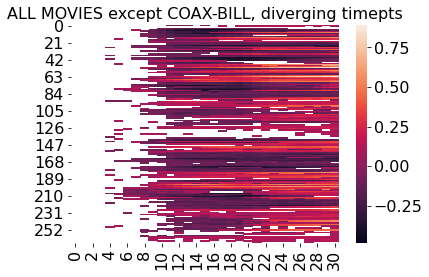

In [15]:
# organize into a 2D array, change non-sig (p<.05unc.) values to nan
coefs_all_nocoaxbill =  np.empty((268,31))
coefs_all_nocoaxbill[:] = np.nan
for n in range(268):
    coef_,pval_ = coef_pval_soc_nonsoc_nocoaxbill[n]
    coefs_all_nocoaxbill[n,pval_<.05] = coef_[pval_<.05]

sns.heatmap(coefs_all_nocoaxbill)
plt.title('ALL MOVIES except COAX-BILL, diverging timepts')

In [16]:
# collapse across movies and runs (for timecourse plots)
other_movies = [2,3,4,5,6,7,8,9] #mmin,mmax = 2,10

tcs_run_resh_yes_nocoaxbill = []
tcs_run_resh_no_nocoaxbill = []
subs_resh_yes_nocoaxbill = []
subs_resh_no_nocoaxbill = []
for m in other_movies:
    tcs_run_resh_yes_nocoaxbill.append(tcs_run_z[responses[:,m]==1,:,:,m])# subsm * 268 * 31
    tcs_run_resh_no_nocoaxbill.append(tcs_run_z[responses[:,m]==0,:,:,m])# subsm * 268 * 31
    subs_resh_yes_nocoaxbill += list(np.where(responses[:,m]==1)[0])# subsm * 268 * 31, keep track of subject seq
    subs_resh_no_nocoaxbill  += list(np.where(responses[:,m]==0)[0])# subsm * 268 * 31
tcs_run_resh_yes_nocoaxbill = np.concatenate(tcs_run_resh_yes_nocoaxbill,axis=0)
tcs_run_resh_no_nocoaxbill  = np.concatenate(tcs_run_resh_no_nocoaxbill,axis=0)
print('Across all movies except coax-bill: \nyes:'+ str(tcs_run_resh_yes_nocoaxbill.shape) + ',\nno:' + str(tcs_run_resh_no_nocoaxbill.shape))

Across all movies except coax-bill: 
yes:(3908, 268, 31),
no:(3376, 268, 31)


In [17]:
load

1

In [18]:
# get earliest pt of divergenceALL MOVIES - v1. only criterion is the two consistent pt at the earliest div pt

if load == 0:
    earliest_pt_all_nocoaxbill,    sign_earliest_pt_all_nocoaxbill = [np.empty((268,)) for _ in range(2)]
    earliest_pt_all_nocoaxbill[:], sign_earliest_pt_all_nocoaxbill[:] = [np.nan] * 2

    nodes = np.arange(0,268)# np.arange(10)
            
    for n in nodes:
        sig_timepts_nocoaxbill =  np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]
        if n==0:
            print(sig_timepts_nocoaxbill)
        
        for t in sig_timepts_nocoaxbill:
            if (t < 30) and ((t+1) in sig_timepts_nocoaxbill):
                earliest_pt_all_nocoaxbill[n]      = t #subtract by 3 after this step!!
                sign_earliest_pt_all_nocoaxbill[n] = np.sign(coefs_all_nocoaxbill[n,t])
                break

In [19]:
# end diff excl coax-bill

if load == 0:
    end_diff_all_nocoaxbill, sign_end_diff_all_nocoaxbill = [np.empty((268,)) for _ in range(2)]
    end_diff_all_nocoaxbill[:], sign_end_diff_all_nocoaxbill[:] = [np.nan]*2

    nodes = np.arange(0,268)# np.arange(10)

    #sub_ind = subs_resh_yes+subs_resh_no
            
    for n in nodes:
        if n%50 ==0:
            print('node:',n)
        
        sig_timepts =  np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]

        if len(sig_timepts) > 2: # no pt doing this if there aren't at least 2 sig pts
            tcn1 =[]
            tcn2 = []
            subs1_ind = []
            subs2_ind = []
            for m in other_movies: #np.arange(mmin,mmax):
                subs1 = (subs_10resp) & (responses[:,m]==1)
                subs2 = (subs_10resp) & (responses[:,m]==0) 
                tcn1.extend(np.nanmean(tcs_run_z[subs1,n,-2:,m],axis=1)) # average across the last 2 timepts and append (dims: nsubs * nmovies)
                tcn2.extend(np.nanmean(tcs_run_z[subs2,n,-2:,m],axis=1)) #np.nanmean(tcs_run_resh_no[:, n,-2:],axis=1)
                subs1_ind.extend(np.where(subs1)[0])
                subs2_ind.extend(np.where(subs2)[0])
            
            #tcn = tcn1 + tcn2
            responses_1d = ['Social'] * len(tcn1) + ['Nonsocial'] * len(tcn2)
            sub_ind =  subs1_ind + subs2_ind

            df= pd.DataFrame({'end_t':np.concatenate((tcn1,tcn2)),'response':responses_1d,'subID':sub_ind})
            model = Lmer('end_t ~  response +(1|subID)', data=df) # ff: mean response, rf:subjID
            model.fit(factors={"response":["Nonsocial","Social"]},summary = False, verbose = False, no_warnings=True)

            if len(model.warnings) == 0: # model did converge -> save coefs
                coef_end,pval_end = model.coefs['Estimate'][1],model.coefs['P-val'][1]
                if pval_end < .05:
                    end_diff_all_nocoaxbill[n], sign_end_diff_all_nocoaxbill[n] = 1, np.sign(coef_end)
    print('Done.')

In [20]:
load = 1

if load: # load LME coefs
    [earliest_pt_all_nocoaxbill,sign_earliest_pt_all_nocoaxbill] = np.load(os.path.join(data_file_loc,'earliest_pt_div_allmovies_nocoaxbill.npy'))
    [end_diff_all_nocoaxbill,sign_end_diff_all_nocoaxbill] = np.load(os.path.join(data_file_loc,'end_pt_div_allmovies_nocoaxbill.npy'))
else:
    np.save(os.path.join(data_file_loc,'earliest_pt_div_allmovies_nocoaxbill.npy'), [earliest_pt_all_nocoaxbill,sign_earliest_pt_all_nocoaxbill])
    np.save(os.path.join(data_file_loc,'end_pt_div_allmovies_nocoaxbill.npy'), [end_diff_all_nocoaxbill,sign_end_diff_all_nocoaxbill])

In [21]:
# plot timecourses with all NODES and  timepts of difference, and highlighting the initial and end pts. with and without coaxbill
plot_all =0 
if plot_all:
    ncols = 6
    nrows= int(np.ceil(268/ncols))
    #fig, axes = plt.subplots(67,4, figsize=(15,150))
    xwidth,yheight = 30,150# .75*nrows*xwidth/ncols
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
    fig.set_figwidth(xwidth)
    fig.set_figheight(yheight)

    x_ticks = np.round(np.linspace(0,30,4),2)  
    ymin,ymax = -.6,2
    lbls = [str(i-tr0_ind) for i in x_ticks]
        
    for n in range(268):
        movieTC_yes = tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
        movieTC_no  = tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
        ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,ls ='--', linewidth=2,label ='"Social"')
        ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,ls = '--', linewidth=2,label ='"Non-social"')
        sig = np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]
        ax[r,c].plot(sig,np.repeat(-.6,len(sig)),mec = 'grey',ls = 'None',marker = 'o',mfc='w',label ="p<.05unc.(all-CB)")
        ax[r,c].plot(earliest_pt_all_nocoaxbill[n],-.4,color = 'k',ls = 'None',marker = 'v',mfc='w',mec='k',markersize=8,label ="earliest p<.05unc.\n(all-CB)") # earliest_pt still in the 3-31 range
        if end_diff_all_nocoaxbill[n] == 1:
            ax[r,c].plot([29,30],[-.8,-.8],color = 'k',ls = 'None',marker = '^',mfc='w',mec='k',markersize=8,label ='end-pts. p<.05unc.\n(all-CB)') # earliest_pt still in the 3-31 range
        ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
        ax[r,c].hlines(0,0,31,color='grey')
        ax[r,c].set_title(f'Node {n+1}')
        if n == 5:
            ax[r,c].legend(bbox_to_anchor=[1.05,1],ncol=2)
        #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
        ax[r,c].set_xticks(x_ticks)
        ax[r,c].set_xticklabels(lbls)
    ax[r,c+1].axis('off')
    ax[r,c+2].axis('off')
    plt.tight_layout()
    #plt.savefig(os.path.join(fig_save_loc,'all_movies_timecourses.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

# COAX-BILL

In [22]:
#### 3. DIFFERENT MOVIES ANALYSIS
#select subs who responded "social" to the yes movie and nonsocial to the no movie
print('\ntrial-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_trial_norm','timecourse-all-movies_zscorenorm.npy')
tcs_trial_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
print('before:',tcs_trial_z.shape)
tcs_trial_z = remove_pretrial_TRs(tcs_trial_z,vid_start_rel_tr,tr0_ind)
print('after:',tcs_trial_z.shape)

movie_ind_yes = 0 # CHANGE MOVIE IND HERE - SOCIAL
movie_ind_no = 1 # CHANGE MOVIE IND HERE - NONSOCIAL
print('"social" movie: ' + str(vidnames[movie_ind_yes]))
print('"nonsocial" movie: ' + str(vidnames[movie_ind_no]))



trial-wise norm data.
before: (1048, 268, 56, 10)
after: (1048, 268, 31, 10)
"social" movie: COAXING-B
"nonsocial" movie: BILLIARD-A


In [23]:
movie_ind_yes,movie_ind_no = 0,1
subs = np.where((responses[:,movie_ind_yes] == 1)&(responses[:,movie_ind_no] == 0))[0] 
subs.shape

(870,)

In [65]:
tcs_trial_z.shape

(1048, 268, 31, 10)

In [70]:
#if load ==0:
def paired_ttest_across_time(tcs_trial_z_node):
    # perform an unpaired t-test at each node and timept for a selected movie (rand here)
    meandiff_soc_nonsoc, pval_soc_nonsoc = [np.empty((31)) for _ in range(2)]
    meandiff_soc_nonsoc[:], pval_soc_nonsoc[:] = [np.nan]*2   
    
    myes,mno = 0,1
    subs = (responses[:,myes]==1) & (responses[:,mno]==0)

    for timept in np.arange(tr0_ind,tcs_run_z.shape[2]):
        y1,y2 = tcs_trial_z_node[subs,timept,myes],tcs_trial_z_node[subs,timept,mno]
        try:
            _,pval_soc_nonsoc[timept] = stats.ttest_rel(y1,y2,nan_policy='omit')
            meandiff_soc_nonsoc[timept] = np.nanmean(y1-y2)      
        except:
            pval_soc_nonsoc[timept] = np.nan
            meandiff_soc_nonsoc[timept] = np.nan     
    return pval_soc_nonsoc,meandiff_soc_nonsoc

'''val_soc_nonsoc, meandiff_soc_nonsoc = [np.empty((268,31)) for _ in range(2)]
pval_soc_nonsoc[:],meandiff_soc_nonsoc[:] = [np.nan]*2
for n in range(268): 
    tcs_trial_z_node = tcs_trial_z[:,n,:,:]
    p,md = paired_ttest_across_time(tcs_trial_z_node)
    pval_soc_nonsoc[n,:],meandiff_soc_nonsoc[n,:] = p,md
'''

'val_soc_nonsoc, meandiff_soc_nonsoc = [np.empty((268,31)) for _ in range(2)]\npval_soc_nonsoc[:],meandiff_soc_nonsoc[:] = [np.nan]*2\nfor n in range(268): \n    tcs_trial_z_node = tcs_trial_z[:,n,:,:]\n    p,md = paired_ttest_across_time(tcs_trial_z_node)\n    pval_soc_nonsoc[n,:],meandiff_soc_nonsoc[n,:] = p,md\n'

<AxesSubplot:>

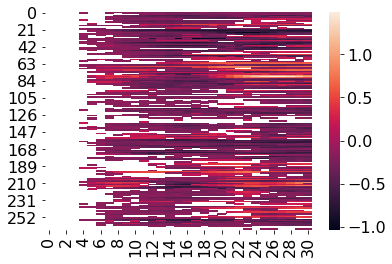

In [71]:
#if load == 0:
if __name__ == '__main__':
    pool = Pool(processes=cpu_count()) # helps to parallelize processing

tcs_node_list = [tcs_trial_z[:,n,:,:] for n in range(268)] # 15 secs per timept so that'll be 15*28 ~= 450s for all?
pval_meandiff_soc_nonsoc_coaxbill= pool.map(paired_ttest_across_time,tcs_node_list) 
#coef_soc_nonsoc, pval_soc_nonsoc = model.coefs['P-val'][1]
np.save(os.path.join(data_file_loc,'coefs_pvals_alltimepts_COAXBILL.npy'), pval_meandiff_soc_nonsoc_coaxbill)

meanDiff_coaxbill =  np.empty((268,31))
meanDiff_coaxbill[:] = np.nan
for n in range(268):
    pval_, meanDiff_ = pval_meandiff_soc_nonsoc_coaxbill[n]
    meanDiff_coaxbill[n,pval_<.05] = meanDiff_[pval_<.05]
    
sns.heatmap(meanDiff_coaxbill)

In [26]:
# get earliest pt of divergence COAX-BILL
# only timept criterion, not the end diff criterion

if load == 0:
    earliest_pt_coaxbill,sign_earliest_pt_coaxbill = [np.empty((268,)) for _ in range(2)]
    earliest_pt_coaxbill[:], sign_earliest_pt_coaxbill[:] = [np.nan]*2

    nodes = np.arange(0,268)# np.arange(10)           
    for n in nodes:
        sig_timepts =  np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]
        for t in sig_timepts:
            if t < 30:
                if (t+1) in sig_timepts: #(pval_auc<.05) and ( ( ((t-1) in sig_timepts) or ((t+1) in sig_timepts) ) and (np.sign(meandiff_auc) == np.sign(meanDiff_rand[n,t])):# and (t_array[0][i+1] - t_array[0][i] == 1):
                    earliest_pt_coaxbill[n]      = t #subtract by 3 in brainmaps!!
                    sign_earliest_pt_coaxbill[n] = np.sign(meanDiff_coaxbill[n,t])
                    break


In [27]:
# get a variable storing whether nodes show a difference in the end

if load ==0:
    end_diff_coaxbill,sign_end_diff_coaxbill= [np.empty((268,)) for _ in range(2)]
    end_diff_coaxbill[:],sign_end_diff_coaxbill[:] = [np.nan]*2

    subs = (responses[:,movie_ind_yes]==1)  & (responses[:,movie_ind_no]==0)

    nodes = np.arange(0,268)# np.arange(10)    
    for n in nodes:
        sig_timepts =  np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]

        if len(sig_timepts) > 2: # no pt doing this if there aren't at least 2 sig pts
            
            tcn1 = np.nanmean(tcs_trial_z[subs,n,-2:,movie_ind_yes],axis=1)# subs * t:end (if it's the onset of a divergence, the auc later should be different between the groups)
            tcn2 = np.nanmean(tcs_trial_z[subs,n,-2:,movie_ind_no],axis=1)

            _,pval_end = stats.ttest_rel(tcn1,tcn2,nan_policy='omit')
            meandiff_end = np.nanmean(tcn1 - tcn2) 
            
            if pval_end < .05:
                end_diff_coaxbill[n],sign_end_diff_coaxbill[n] = 1,np.sign(meandiff_end)


In [28]:
load = 1

if load: # load LME coefs
    [earliest_pt_coaxbill,sign_earliest_pt_coaxbill]= np.load(os.path.join(data_file_loc,'earliest_pt_div_coaxbill.npy'))
    [end_diff_coaxbill,sign_end_diff_coaxbill]= np.load(os.path.join(data_file_loc,'end_pt_div_coaxbill.npy'))
else:
    np.save(os.path.join(data_file_loc,'earliest_pt_div_coaxbill.npy'), [earliest_pt_coaxbill,sign_earliest_pt_coaxbill])
    np.save(os.path.join(data_file_loc,'end_pt_div_coaxbill.npy'), [end_diff_coaxbill,sign_end_diff_coaxbill])

In [29]:
#  coax-bill
# plot timecourses with all timepts of divergences

if plot_all:
    ncols,nrows = 6,int(np.ceil(268/ncols))
    xwidth,yheight = 20,100# .75*nrows*xwidth/ncols
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
    fig.set_figwidth(xwidth)
    fig.set_figheight(yheight)

    x_ticks = np.round(np.linspace(0,30,4),2)  
    ymin,ymax = -.5,2
    lbls = [str(i-tr0_ind) for i in x_ticks]
    movie_ind = 4
    for n in range(268):
        movieTC_yes = tcs_trial_z[subs,n,:,myes] # nsubs * ntimepts
        movieTC_no  = tcs_trial_z[subs,n,:,mno] # nsubs * ntimepts
        r = int(np.floor(n/ncols))
        c = int(np.floor(n%ncols))
        ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
        ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
        ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
        ax[r,c].hlines(0,0,31,color='grey')
        sig = np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]
        ax[r,c].plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
        ax[r,c].plot(earliest_pt_coaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
        if end_diff_coaxbill[n] == 1:
            ax[r,c].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
        ax[r,c].set_title(f'Node {n+1}')
        if n == 5:
            ax[r,c].legend(bbox_to_anchor=[1.05,1])
        #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
        ax[r,c].set_xticks(x_ticks)
        ax[r,c].set_xticklabels(lbls)
    ax[r,c+1].axis('off')
    ax[r,c+2].axis('off')
    plt.tight_layout()



In [33]:
earliest_pt_all_corrected_nocoaxbill = earliest_pt_all_nocoaxbill - tr0_ind
earliest_pt_coaxbill_corrected = earliest_pt_coaxbill - tr0_ind

In [39]:
fig_save_loc = os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig5_timecourse/')

# plot brainmaps

In [59]:
#import plotting functions

from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
#from nilearn.plotting import plot_glass_brain,plot_stat_map,plot_surf,view_img_on_surf,plot_img
from nilearn.plotting import plot_surf_roi, plot_img, plot_surf_contours
from nilearn import datasets,surface
import nibabel as nib

#import nilearn
#nilearn.__version__ # .7.0 in py37 env

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)

fsaverage = datasets.fetch_surf_fsaverage()

shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
#shen268_lbl

lbl = [str.upper(x[0:4]) for x in vidnames]
lbl

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


['COAX',
 'BILL',
 'DRIF',
 'FISH',
 'RAND',
 'SCAR',
 'SEDU',
 'STAR',
 'SURP',
 'TENN']

In [31]:
# for comparison with the other main figure if needed
nodes_coaxbill_rand_all = np.load(os.path.join(data_file_loc,'nodes_coaxbill_rand_all.npy')) # sig nodes hihglighted in the first S>NS GLM
len(np.where(nodes_coaxbill_rand_all)[0])

74

In [56]:
def color_rois(values):
    """
    This function assumes you are passing a vector "values" with the same length as the number of nodes in the atlas.
    """
    shen268 = nib.load(os.path.join(data_file_loc,"shen_2mm_268_parcellation.nii.gz"))
    shen268_data = shen268.get_fdata()
    img = np.zeros(shen268_data.shape)
    #print(shen268_data.shape)
    for roi in range(len(values)):
        itemindex = np.where(shen268_data==roi+1) # find voxels in this node (add 1 to account for zero-indexing)
        #print(len(itemindex[0]))
        img[itemindex] = values[roi] # color them by the desired value 

    affine = shen268.affine
    img_nii = nib.Nifti1Image(img, affine)
    
    return img_nii


In [57]:
#coords = [10*int(i) for i in np.linspace(-4,7,6)]
coords = [-40,-25,-10,0,10,25,40]

In [35]:
TR=.72
time_units = 'sec' # 'sec','TR'
log_scale = 1
cmap ='viridis'
# present all results in seconds

# All movies

In [61]:
nodes = np.zeros((268,))
nodes[end_diff_all_nocoaxbill==1] = np.log(earliest_pt_all_corrected_nocoaxbill[end_diff_all_nocoaxbill==1]*TR) #print(min(nodes),max(nodes))
bg_img = datasets.load_mni152_template()

scale_type: log
saving fig, log scale
scale_type: linear


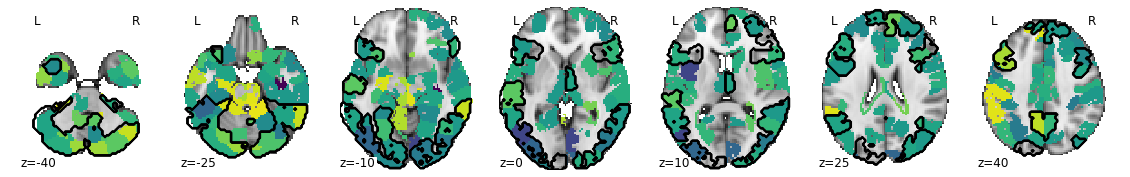

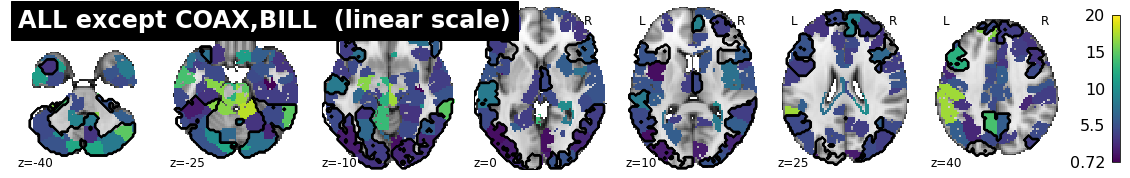

In [276]:
#plot earliest divergence point unsigned - ALL EXCEPT COAX-BILL
def axplot_allexceptCOAXBILL(ax,scale_type = 'log'):
    # print axis plot of all except coaxbill in seconds
    # input: ax= axis to plot into, scale_type = 'log' or 'linear'
    txt = '  Timepoint (sec)\n  of earliest\n  divergence\n  (p<.05 unc.)'
    #for log_scale in range(2): # print log_scale and non-logscale
    print('scale_type:',scale_type)

    #fig=plt.figure(i+1,figsize=((7,3)))
    nodes = np.zeros((268,))
    
    if scale_type == 'log':
        vmax = np.log(20)
        vmin = np.log(.72)
        nodes[end_diff_all_nocoaxbill==1] = np.log(earliest_pt_all_corrected_nocoaxbill[end_diff_all_nocoaxbill==1] * TR)
    elif scale_type == 'linear':
        vmax = 20
        vmin = .72
        nodes[end_diff_all_nocoaxbill==1] = earliest_pt_all_corrected_nocoaxbill[end_diff_all_nocoaxbill==1] * TR
    else:
        raise Exception('correct scale_type!')
    nodes[np.isnan(nodes)] = 0 # nan value would have been if there are nodes with end differences but no earliest timept divergence - doing this just to make all non-data values 0.
    
    tklabels = [.72,5,10,15,20]
    if scale_type == 'log':
        tks = np.log(tklabels)
    elif scale_type == 'linear':
        tks = tklabels
    #print(tks)
    img = roi_to_brain(pd.Series(nodes), mask_x)
    if scale_type == 'log':
        ax_plot = plot_img(img.to_nifti(), display_mode = 'z',cut_coords =coords,cmap = cmap, vmin = vmin,vmax = vmax,bg_img = bg_img,colorbar= False,threshold = .01,axes=ax)
    elif scale_type == 'linear':
        ax_plot = plot_img(img.to_nifti(), display_mode = 'z',cut_coords =coords,cmap = cmap, vmin = vmin,vmax = vmax,bg_img = bg_img,colorbar= True,threshold = .01,axes=ax)
        ax_plot.title("ALL except COAX,BILL  (linear scale)",fontsize=24,bgcolor='k',color='w',fontweight='bold')

    ax_plot.add_contours(color_rois((nodes_coaxbill_rand_all)),linewidths=1, colors=['k'],linestyles='solid')
    
    #ax_plot._cbar.set_ticks(tks)
    #ax_plot._cbar.set_ticklabels(tklabels)
    #ax_plot._colorbar_ax.text(0.95,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
    #plt.savefig(os.path.join(fig_save_loc,'all_except_coaxbill/earliestpt_unsigned_endsig_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

    if scale_type == 'log':
        print('saving fig, log scale')
        plt.savefig(os.path.join(fig_save_loc,'all_except_coaxbill/earliestpt_unsigned_endsig_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

coords = [-40,-25,-10,0,10,25,40]
for i,scale_type in enumerate(['log','linear']):
    #scale_type = 'log' # or 'linear
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,3))
    axplot_allexceptCOAXBILL(ax,scale_type)

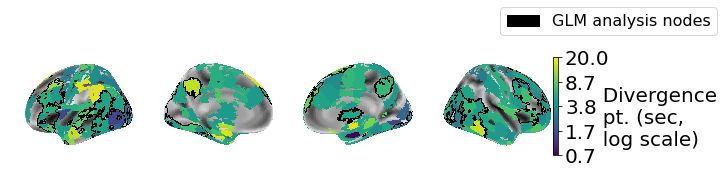

In [360]:
# ALL EXCEPT COAX-BILL, surface p[ot


def surfplotL_allexceptCOAXBILL(ax1,ax2,scale_type='log'):

    nodes = np.zeros((268,))
    if scale_type == 'log':
        nodes[end_diff_all_nocoaxbill==1] = np.log(earliest_pt_all_corrected_nocoaxbill[end_diff_all_nocoaxbill==1] * TR)
        vmin,vmax = np.log(.72),np.log(20)
    elif scale_type == 'linear':
        nodes[end_diff_all_nocoaxbill==1] = earliest_pt_all_corrected_nocoaxbill[end_diff_all_nocoaxbill==1] * TR
        vmin,vmax = .72,20
    else:
        raise Exception('correct scale_type!')
    
    
    texture = surface.vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    #texture = surface.vol_to_surf(color_rois(log_nodes_all_nocoaxbill), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, vmax = vmax,vmin=vmin, axes=ax1,
                                threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cbar = False)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, vmax = vmax,vmin=vmin, axes=ax2,
                                threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cbar = False,view='medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
   
    #title_txt = '(b) ALL EXCEPT COAX-BILL'
    #surf_plot1.axes[0].set_title(title_txt,fontsize=24,color='k')
    # add contour
    texture = surface.vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_left, texture, figure=surf_plot1, legend=False, axes=ax1,levels=[1],colors=['k'])#,levels = [texture],  labels=['Fig 3 nodes'])
    plot_surf_contours(fsaverage.infl_left, texture, figure=surf_plot2, legend=False, axes=ax2,levels=[1],colors=['k'])#,levels = [texture],  labels=['Fig 3 nodes'])
    #plt.savefig(os.path.join(fig_save_loc,'all_except_coaxbill/surfplot_LH.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

def surfplotR_allexceptCOAXBILL(ax1,ax2,subplot_num=2,scale_type='log'):
    # right
    nodes = np.zeros((268,))
    if scale_type == 'log':
        nodes[end_diff_all_nocoaxbill==1] = np.log(earliest_pt_all_corrected_nocoaxbill[end_diff_all_nocoaxbill==1] * TR)
        vmin,vmax = np.log(.72),np.log(20)
    elif scale_type == 'linear':
        nodes[end_diff_all_nocoaxbill==1] = earliest_pt_all_corrected_nocoaxbill[end_diff_all_nocoaxbill==1] * TR
        vmin,vmax =.72,20
    else:
        raise Exception('correct scale_type!')

    texture = surface.vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    surf_plot=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False, vmax = vmax,vmin=vmin,
                                threshold=.01, bg_map=fsaverage.sulc_right,symmetric_cbar = False,axes = ax1,view='medial')
    surf_plot2=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True, vmax = vmax,vmin=vmin,
                                threshold=.01, bg_map=fsaverage.sulc_right,symmetric_cbar = False,axes = ax2)
    
    tks = surf_plot2.axes[subplot_num].get_yticks()
    #tklabels = [.72,5,10,15,20]
    if scale_type == 'log':
        #tks = np.log(tklabels)
        tklabels = [np.round(i,1) for i in np.exp(tks)]
    elif scale_type == 'linear':
        #tks = tklabels
        tklabels = [np.round(i,1) for i in tks]
    surf_plot2.axes[subplot_num].set_yticklabels(tklabels,fontsize=20)
    #surf_plot2.axes[0].set_title("Right hem.",fontsize=24,color='k',fontweight='bold')
    #surf_plot.axes[1].title("COAX-BILL",fontsize=24,bgcolor='k',color='w',fontweight='bold')
    surf_plot2.axes[subplot_num].text(25,2,s='  Divergence\n  pt. (sec,\n  log scale)',fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})

    # add contour
    texture = surface.vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_right, texture, figure=surf_plot1, legend=False, axes=ax1,levels=[1],colors=['k'])#,levels = [nodes_coaxbill_rand_all], , labels=['Fig 3 nodes'])
    plot_surf_contours(fsaverage.infl_right, texture, figure=surf_plot2, legend=True, axes=ax2,levels=[1],colors=['k'],labels=['GLM analysis nodes'])#,levels = [nodes_coaxbill_rand_all], , labels=['Fig 3 nodes'])

    #plt.savefig(os.path.join(fig_save_loc,'all_except_coaxbill/surfplot_RH.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
    

fig,ax = plt.subplots(nrows=1, ncols= 4,figsize=(10,3),subplot_kw={'projection': '3d'})
surfplotL_allexceptCOAXBILL(ax[0],ax[1],scale_type='log')
subplot_num = 4
surfplotR_allexceptCOAXBILL(ax[2],ax[3],subplot_num,scale_type='log')
#plt.tight_layout()
plt.subplots_adjust(wspace=0.001)
plt.savefig(os.path.join(fig_save_loc,'all_except_coaxbill/surfplot_both_hem.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


In [341]:
ax[3].axes

<Axes3DSubplot:>

- The log plot (lower fig) appears to have a higher resolution to see earlier changes (e.g. z=0 slice),but the upper plot is a better visualization of the whole range of values.

## COAX-BILL

saving fig 1


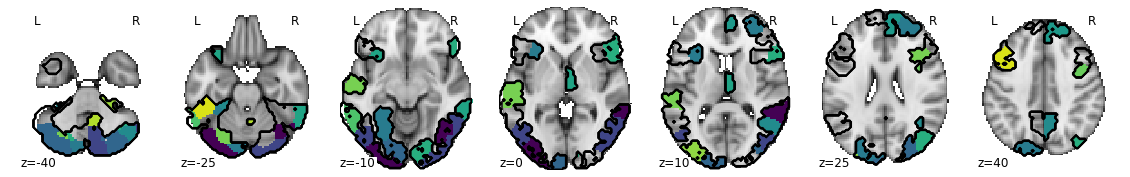

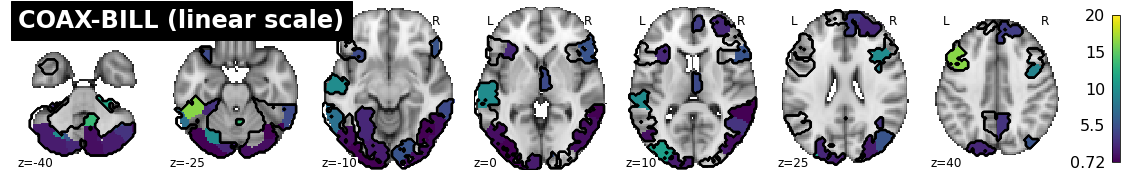

In [295]:
#plot earliest divergence point unsigned - ALL EXCEPT COAX-BILL
txt = '  Timepoint (sec)\n  of earliest\n  divergence\n  (p<.05 unc.)'

def axplot_COAXBILL(ax,scale_type = 'log'):

    #for log_scale in [0,1]:
    #fig=plt.figure(i+1,figsize=((10,3)))
    
    nodes = np.zeros((268,))
    nodes_ind = (end_diff_coaxbill==1) & nodes_coaxbill_rand_all
    
    if scale_type == 'log':
        vmax = np.log(20)
        vmin = np.log(.72)
        nodes[nodes_ind] = np.log(earliest_pt_coaxbill_corrected[nodes_ind] * TR)
    elif scale_type == 'linear':
        vmax = 20
        vmin = .72
        nodes[nodes_ind] = earliest_pt_coaxbill_corrected[nodes_ind] * TR
    else:
        raise Exception('correct scale_type!')
    nodes[np.isnan(nodes)] = 0 # nan value would have been if there are nodes with end differences but no earliest timept divergence - doing this just to make all non-data values 0.

    tks = surf_plot2.axes[subplot_num].get_yticks()
    #tklabels = [.72,5,10,15,20]
    if scale_type == 'log':
        #tks = np.log(tklabels)
        tklabels = [np.round(i,1) for i in np.exp(tks)]
    elif scale_type == 'linear':
        #tks = tklabels
        tklabels = [np.round(i,1) for i in tks]
    
    img = roi_to_brain(pd.Series(nodes), mask_x)
    if scale_type == 'log':
        ax_plot = plot_img(img.to_nifti(), display_mode = 'z',cut_coords =coords,cmap = cmap, vmin = vmin,vmax = vmax,bg_img = bg_img,colorbar= False,threshold = .01,axes=ax)
    elif scale_type == 'linear':
        ax_plot = plot_img(img.to_nifti(), display_mode = 'z',cut_coords =coords,cmap = cmap, vmin = vmin,vmax = vmax,bg_img = bg_img,colorbar= True,threshold = .01,axes=ax)
        ax_plot.title("COAX-BILL (linear scale)",fontsize=24,bgcolor='k',color='w',fontweight='bold')

    ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
    #ax_plot._cbar.set_ticks(tks)
    #ax_plot._cbar.set_ticklabels(tklabels)
    #ax_plot._colorbar_ax.text(0.95,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
    #plt.savefig(os.path.join(fig_save_loc,'all_except_coaxbill/earliestpt_unsigned_endsig_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


coords = [-40,-25,-10,0,10,25,40]
for i,scale_type in enumerate(['log','linear']):
    #scale_type = 'log' # or 'linear
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,3))
    axplot_COAXBILL(ax,scale_type)
    
    if scale_type == 'log':
        print('saving fig', log_scale)
        plt.savefig(os.path.join(fig_save_loc,'coaxbill/earliestpt_unsigned_endsig_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

In [ ]:
texture = surface.vol_to_surf(color_rois(log_nodes_coaxbill), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
#fig,_ = plt.subplots(subplot_kw={'projection': '3d'})
#fig = plt.figure(1)
#ax = fig.add_subplot(121)
surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, vmax = vmax,vmin=vmin,
                            threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cbar = False, ax = ax)
tks = surf_plot.axes[1].get_yticks()
tklabels = [np.round(i,1) for i in np.exp(tks)]
#surf_plot1.axes[1].set_yticklabels(tklabels,fontsize=20)
#surf_plot1.axes[1].text(20,2,s='  Divergence\n  time (sec,\n  log scale)',fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot1.axes[0].set_title("(a) COAX-BILL: ",fontsize=24,color='k',fontweight='bold')
texture = surface.vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_left, texture, figure=surf_plot1, legend=True)#,levels = [texture], colors=['k'], labels=['Fig 3 nodes'])

#ax = fig.add_subplot(122)
#figure,ax = plt.subplots(subplot_kw={'projection': '3d'})
texture = surface.vol_to_surf(color_rois(log_nodes_coaxbill), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot2=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True, vmax = vmax,vmin=vmin,
                            threshold=.01, bg_map=fsaverage.sulc_right,symmetric_cbar = False,ax = ax)
#tks = np.log(tklabels)
tks = surf_plot2.axes[1].get_yticks()
tklabels = [np.round(i,1) for i in np.exp(tks)]
surf_plot2.axes[1].set_yticklabels(tklabels,fontsize=20)
#surf_plot2.axes[0].set_title("Right hem.",fontsize=24,color='k',fontweight='bold')
#surf_plot.axes[1].title("COAX-BILL",fontsize=24,bgcolor='k',color='w',fontweight='bold')
surf_plot.axes[1].text(10.5,3,'Time (s,\n log scale)',fontdict = {'verticalalignment':'top','rotation':270})
#ax_plot._colorbar_ax.text(0.9,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
surf_plot2.axes[1].text(20,2,s='  Divergence\n  time (sec,\n  log scale)',fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
texture = surface.vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_left, texture, figure=surf_plot2, legend=True)#,levels = [texture], colors=['k'], labels=['Fig 3 nodes'])
plt.savefig(os.path.join(fig_save_loc,'coaxbill/surfplot_RH.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


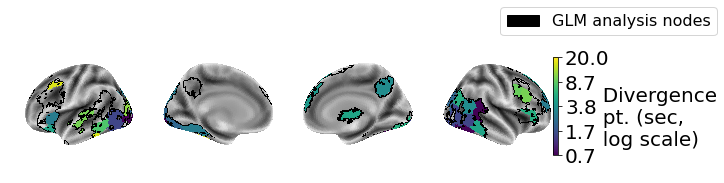

In [361]:
# COAX-BILL, surface p[ot

def surfplotL_COAXBILL(ax1,ax2,scale_type='log'):
    
    nodes = np.zeros((268,))
    nodes_ind = (end_diff_coaxbill==1) & nodes_coaxbill_rand_all
    if scale_type == 'log':
        nodes[nodes_ind] = np.log(earliest_pt_coaxbill_corrected[nodes_ind]*TR)
        #nodes[end_diff_all_nocoaxbill==1] = np.log(earliest_pt_all_corrected_nocoaxbill[end_diff_all_nocoaxbill==1] * TR)
        vmin,vmax = np.log(.72),np.log(20)
    
    elif scale_type == 'linear':
        nodes[nodes_ind] = earliest_pt_coaxbill_corrected[nodes_ind]*TR
        vmin,vmax = .72,20
    
    else:
        raise Exception('correct scale_type!')
    
    texture = surface.vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    #texture = surface.vol_to_surf(color_rois(log_nodes_all_nocoaxbill), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, vmax = vmax,vmin=vmin, axes=ax1,
                                threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cbar = False)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, vmax = vmax,vmin=vmin, axes=ax2,
                                threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cbar = False,view='medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
   
    #title_txt = '(a) COAX-BILL'
    #surf_plot1.axes[0].set_title(title_txt,fontsize=20,color='k')
    # add contour
    texture = surface.vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_left, texture, figure=surf_plot1, legend=False, axes=ax1,levels=[1],colors=['k'])#,levels = [texture],  labels=['Fig 3 nodes'])
    plot_surf_contours(fsaverage.infl_left, texture, figure=surf_plot2, legend=False, axes=ax2,levels=[1],colors=['k'])#,levels = [texture],  labels=['Fig 3 nodes'])
    #plt.savefig(os.path.join(fig_save_loc,'coaxbill/surfplot_LH.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

def surfplotR_COAXBILL(ax1,ax2,subplot_num=2,scale_type='log'):
    # right

    nodes = np.zeros((268,))
    nodes_ind = (end_diff_coaxbill==1) & nodes_coaxbill_rand_all
    if scale_type == 'log':
        nodes[nodes_ind] = np.log(earliest_pt_coaxbill_corrected[nodes_ind]*TR)
        #nodes[end_diff_all_nocoaxbill==1] = np.log(earliest_pt_all_corrected_nocoaxbill[end_diff_all_nocoaxbill==1] * TR)
        vmin,vmax = np.log(.72),np.log(20)
    elif scale_type == 'linear':
        nodes[nodes_ind] = earliest_pt_coaxbill_corrected[nodes_ind]*TR
        vmin,vmax = .72,20
    else:
        raise Exception('correct scale_type!')
    
    texture = surface.vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    surf_plot1=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False, vmax = vmax,vmin=vmin,
                                threshold=.01, bg_map=fsaverage.sulc_right,symmetric_cbar = False,axes = ax1, view='medial')
    surf_plot2=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True, vmax = vmax,vmin=vmin,
                                threshold=.01, bg_map=fsaverage.sulc_right,symmetric_cbar = False,axes = ax2)
    tks = surf_plot2.axes[subplot_num].get_yticks()
    #tklabels = [.72,5,10,15,20]
    if scale_type == 'log':
        #tks = np.log(tklabels)
        tklabels = [np.round(i,1) for i in np.exp(tks)]
    elif scale_type == 'linear':
        #tks = tklabels
        tklabels = [np.round(i,1) for i in tks]
    
    surf_plot2.axes[subplot_num].set_yticklabels(tklabels,fontsize=20)
    surf_plot2.axes[subplot_num].text(25,2,s='  Divergence\n  pt. (sec,\n  log scale)',fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})

    # add contour
    texture = surface.vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_right, texture, figure=surf_plot1, legend=False, axes=ax1,levels=[1],colors=['k'])#,levels = [nodes_coaxbill_rand_all], , labels=['Fig 3 nodes'])
    plot_surf_contours(fsaverage.infl_right, texture, figure=surf_plot2, legend=True, axes=ax2,levels=[1],colors=['k'],labels=['GLM analysis nodes'])#,levels = [nodes_coaxbill_rand_all], , labels=['Fig 3 nodes'])

    #return surf_plot2

fig,ax = plt.subplots(nrows=1, ncols= 4,figsize=(10,3),subplot_kw={'projection': '3d'})
surfplotL_COAXBILL(ax[0],ax[1],scale_type='log')
subplot_num = 4
surfplotR_COAXBILL(ax[2],ax[3],subplot_num,scale_type='log')
plt.subplots_adjust(wspace=0.001)
plt.savefig(os.path.join(fig_save_loc,'coaxbill/surfplot_both_hem.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

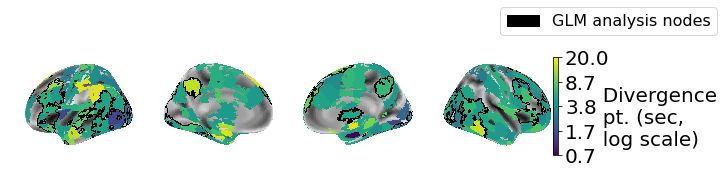

In [353]:
fig,ax = plt.subplots(nrows=1, ncols= 4,figsize=(10,3),subplot_kw={'projection': '3d'})
surfplotL_allexceptCOAXBILL(ax[0],ax[1],scale_type='log')
subplot_num = 4
surfplotR_allexceptCOAXBILL(ax[2],ax[3],subplot_num,scale_type='log')
#plt.tight_layout()
plt.subplots_adjust(wspace=0.001)


saving fig 1
scale_type: log
saving fig, log scale


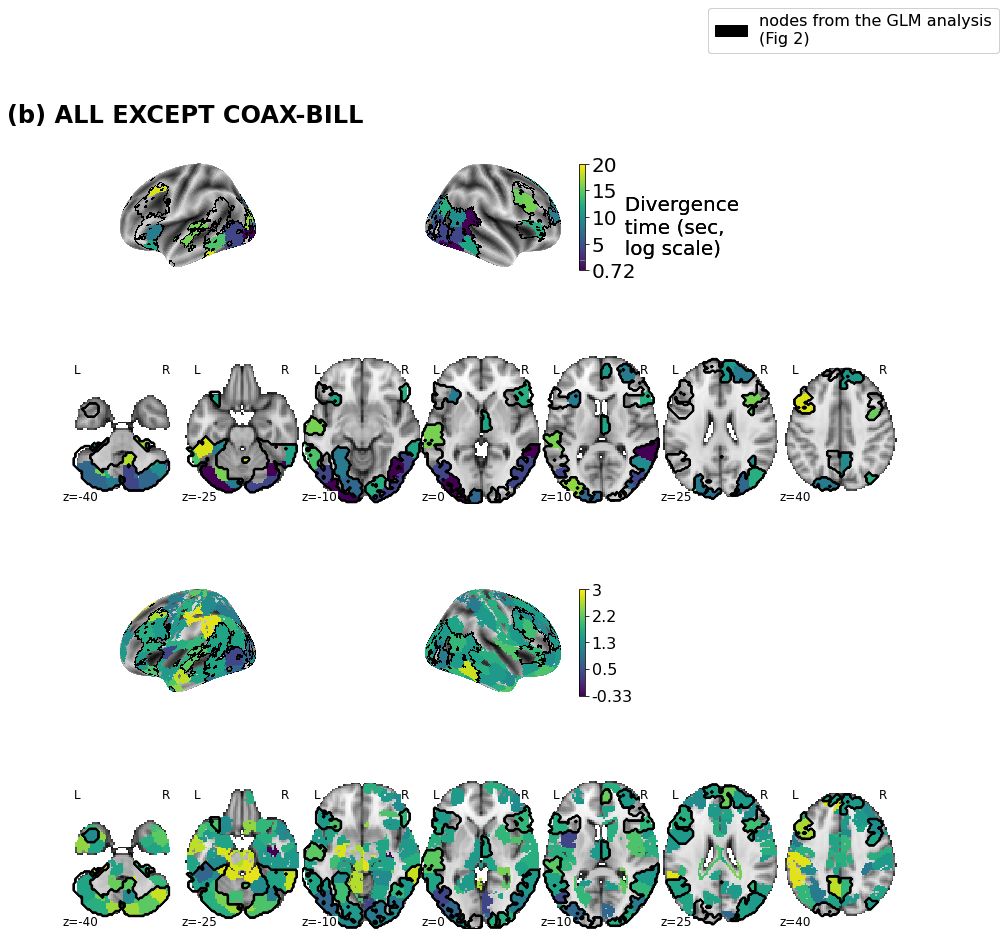

In [241]:
'''#fig,ax = plt.subplots(nrows=4, ncols= 2,figsize=(10,20),subplot_kw={'projection': '3d'})
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(431,projection='3d')
surfplotL_COAXBILL(ax,scale_type='log')
ax = fig.add_subplot(432,projection = '3d')
surfplotR_COAXBILL(ax,subplot_num,scale_type='log')
ax = fig.add_subplot(412)
axplot_COAXBILL(ax,scale_type='log')

ax = fig.add_subplot(437,projection='3d')
surfplotL_allexceptCOAXBILL(ax,scale_type='log')
ax = fig.add_subplot(438,projection = '3d')
surfplotR_allexceptCOAXBILL(ax,subplot_num,scale_type='log')
ax = fig.add_subplot(414)
axplot_allexceptCOAXBILL(ax,scale_type='log')

#plt.tight_layout()
'''backup
# doesn't look too good!

# Plotting timecourses

In [113]:
# selecting nodes with MNI coordinates' centres within 5 pts of slices -10 and 0 which show the ventral visual pathway, and also don't have 'frontal' in their description
nodes_ind = (end_diff_coaxbill==1) & nodes_coaxbill_rand_all
zslices =[-10,0] 
near_thr = 10
print('Node(1-268), MNI coordinates, Node label')
for n in np.where(nodes_ind)[0]:
    coords = eval(shen268_lbl[str(n+1)][0])['coords']
    if ((abs(coords[2] -  zslices[0]) < near_thr) | (abs(coords[2]-zslices[1]) < near_thr)) & ('Frontal' not in eval(shen268_lbl[str(n+1)][0])['name']): 
        print(n+1,earliest_pt_coaxbill_corrected[n], [np.round(i) for i in eval(shen268_lbl[str(n+1)][0])['coords']], eval(shen268_lbl[str(n+1)][0])['name'])

Node(1-268), MNI coordinates, Node label
65 1.0 [59.0, -44.0, 9.0] 51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_posterior_division; 12.90% Angular_Gyrus; 6.04% Superior_Temporal_Gyrus_posterior_division
66 1.0 [47.0, -60.0, -15.0] 35.14% Inferior_Temporal_Gyrus_temporooccipital_part; 29.73% Lateral_Occipital_Cortex_inferior_division; 27.48% Temporal_Occipital_Fusiform_Cortex; 7.66% Occipital_Fusiform_Gyrus
67 1.0 [37.0, -69.0, -17.0] 54.07% Occipital_Fusiform_Gyrus; 28.60% Lateral_Occipital_Cortex_inferior_division; 14.90% Temporal_Occipital_Fusiform_Cortex
69 2.0 [55.0, -56.0, -5.0] 48.69% Middle_Temporal_Gyrus_temporooccipital_part; 29.07% Lateral_Occipital_Cortex_inferior_division; 22.09% Inferior_Temporal_Gyrus_temporooccipital_part
70 7.0 [61.0, -43.0, -18.0] 54.11% Inferior_Temporal_Gyrus_temporooccipital_part; 17.25% Middle_Temporal_Gyrus_temporooccipital_part; 14.99% Middle_Temporal_Gyrus_posterior_division; 13.55% Inferior_Temporal_Gyrus_poste

In [54]:
node_tcs_minus10_0 = {'right': [64,65,66,68,69,73,75,80,127], 'left': [190,196,197,198,205,206,208,209,211,212,213]} #  node indices (0-267) when near_thr = 10
# Manually selecting node indices based on the description above (e.g. removing subcortical nodes)
#node_tcs_minus10 = {'right': [65,68,69,75,80], 'left': [196,197,198,205,206,209,212,213]} # node indices (0-267) when near_thr = 5


In [55]:
left_nodes_ind = node_tcs_minus10_0['left']
MNIy = [eval(shen268_lbl[str(n+1)][0])['coords'][1] for n in left_nodes_ind]
MNIz = [eval(shen268_lbl[str(n+1)][0])['coords'][2] for n in left_nodes_ind]
ROIname = [eval(shen268_lbl[str(n+1)][0])['name'] for n in left_nodes_ind]
df_minus10_0_left = pd.DataFrame({'Nodes':left_nodes_ind, 'Earliest_pt_corr': earliest_pt_coaxbill_corrected[left_nodes_ind], 'MNIy': MNIy, 'MNIz': MNIz,'name':ROIname})
df_minus10_0_left = df_minus10_0_left.sort_values(by=['Earliest_pt_corr', 'MNIy'])
df_minus10_0_left = df_minus10_0_left.reset_index()
print(df_minus10_0_left.shape)
df_minus10_0_left.head()

# same as above, left-aligned
'''df_minus10_0_disp = pd.DataFrame({'Nodes':left_nodes_ind, 'Earliest_pt': earliest_pt_coaxbill[left_nodes_ind], 'MNIy': MNIy, 'MNIz': MNIz,'name':ROIname})
df_minus10_0_disp['Nodes'] = [i+1 for i in df_minus10_0_disp['Nodes']]
df_minus10_0_disp = df_minus10_0_disp.sort_values(by=['Earliest_pt', 'MNIy'])
df_minus10_0_disp = df_minus10_0_disp.reset_index()
print(df_minus10_0_disp.shape)
df_minus10_0_disp.head()
df_minus10_0_disp = df_minus10_0_disp.style.set_properties(**{'text-align': 'left'})
df_minus10_0_disp'''


(11, 6)


"df_minus10_0_disp = pd.DataFrame({'Nodes':left_nodes_ind, 'Earliest_pt': earliest_pt_coaxbill[left_nodes_ind], 'MNIy': MNIy, 'MNIz': MNIz,'name':ROIname})\ndf_minus10_0_disp['Nodes'] = [i+1 for i in df_minus10_0_disp['Nodes']]\ndf_minus10_0_disp = df_minus10_0_disp.sort_values(by=['Earliest_pt', 'MNIy'])\ndf_minus10_0_disp = df_minus10_0_disp.reset_index()\nprint(df_minus10_0_disp.shape)\ndf_minus10_0_disp.head()\ndf_minus10_0_disp = df_minus10_0_disp.style.set_properties(**{'text-align': 'left'})\ndf_minus10_0_disp"

In [56]:
right_nodes_ind = node_tcs_minus10_0['right']
MNIy = [eval(shen268_lbl[str(n+1)][0])['coords'][1] for n in right_nodes_ind]
MNIz = [eval(shen268_lbl[str(n+1)][0])['coords'][2] for n in right_nodes_ind]
ROIname = [eval(shen268_lbl[str(n+1)][0])['name'] for n in right_nodes_ind]
df_minus10_0_right = pd.DataFrame({'Nodes':right_nodes_ind, 'Earliest_pt_corr': earliest_pt_coaxbill_corrected[right_nodes_ind], 'MNIy': MNIy, 'MNIz': MNIz,'name':ROIname})
df_minus10_0_right = df_minus10_0_right.sort_values(by=['Earliest_pt_corr', 'MNIy'])
df_minus10_0_right = df_minus10_0_right.reset_index()
print(df_minus10_0_right.shape)
df_minus10_0_right
df_minus10_0_right.head()



(9, 6)


index  Nodes  Earliest_pt_corr       MNIy       MNIz  \
0      2     66               1.0 -69.279029 -17.441941   
1      1     65               1.0 -59.801802 -14.716216   
2      0     64               1.0 -43.727367   8.616025   
3      7     80               2.0 -91.904468 -10.795069   
4      5     73               2.0 -74.239130   2.606280   

                                                                                                                                                                                 name  
0                                                       54.07% Occipital_Fusiform_Gyrus; 28.60% Lateral_Occipital_Cortex_inferior_division; 14.90% Temporal_Occipital_Fusiform_Cortex  
1  35.14% Inferior_Temporal_Gyrus_temporooccipital_part; 29.73% Lateral_Occipital_Cortex_inferior_division; 27.48% Temporal_Occipital_Fusiform_Cortex; 7.66% Occipital_Fusiform_Gyrus  
2           51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_posterior_division; 12.90% Angular_Gyrus; 6.04% Superior_Temporal_Gyrus_posterior_division  
3                                                                            55.16% Occipital_Pole; 38.06% Lateral_Occipital_Cortex_inferior_division; 6.78% Occipital_Fusiform_Gyrus  
4                                                                                                                                   95.78% Lateral_Occipital_Cortex_inferior_division

In [135]:
# Plot and save ROIs - surface plots
'''for row in df_minus10_0.iterrows(): #for i,n in enumerate(df['Nodes']):
    #ax = figure.add_subplot(1,2,i+1)
    i = row[0]
    n = int(row[1]['Nodes'])
    nodes = np.zeros((268,))
    nodes[n] = 1
    texture = surface.vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    out = os.path.join(fig_save_loc,f'ROIs/surf/nodes_minus10_0/{i}_node_ind{n}.png')
    surf_plot=plot_surf_roi(fsaverage.infl_left, texture, hemi='left', colorbar=False, output_file = out,
                                threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cbar = False)#,figure = figure)
                                #,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    #plt.savefig(os.path.join(fig_save_loc,f'ROIs/surf/nodes_minus10_0/{i}_node_ind{n}.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
    #plt.savefig(os.path.join(fig_save_loc,f'ROIs/surf/nodes_minus10/{i}_node_ind{n}.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')'''

'for row in df_minus10.iterrows(): #for i,n in enumerate(df[\'Nodes\']):\n    #ax = figure.add_subplot(1,2,i+1)\n    i = row[0]\n    n = int(row[1][\'Nodes\'])\n    nodes = np.zeros((268,))\n    nodes[n] = 1\n    texture = surface.vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation=\'nearest\',radius =1, n_samples=1)\n    out = os.path.join(fig_save_loc,f\'ROIs/surf/nodes_minus10/{i}_node_ind{n}.png\')\n    surf_plot=plot_surf_roi(fsaverage.infl_left, texture, output_file = out, hemi=\'left\', colorbar=False,\n                                threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cbar = False)#,figure = figure)\n                                #,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":\'ball\'})\n    #plt.savefig(os.path.join(fig_save_loc,f\'ROIs/surf/nodes_minus10/{i}_node_ind{n}.png\'),dpi=300,bbox_inches=\'tight\',facecolor=\'white\', edgecolor=\'none\')'

In [208]:
help(plot_slice)

Help on function plot_slice in module __main__:

plot_slice(fig, ax, row, hem)
    # Plot and save ROIs - axial plots



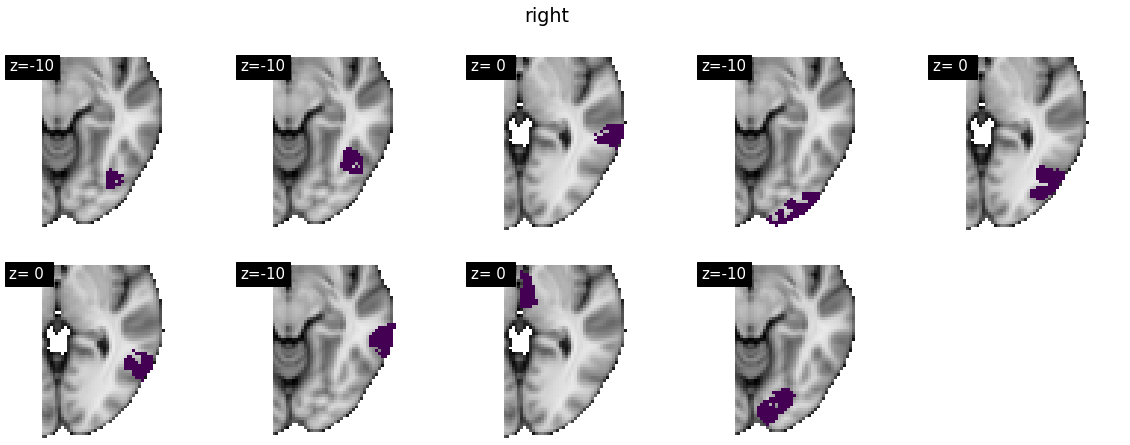

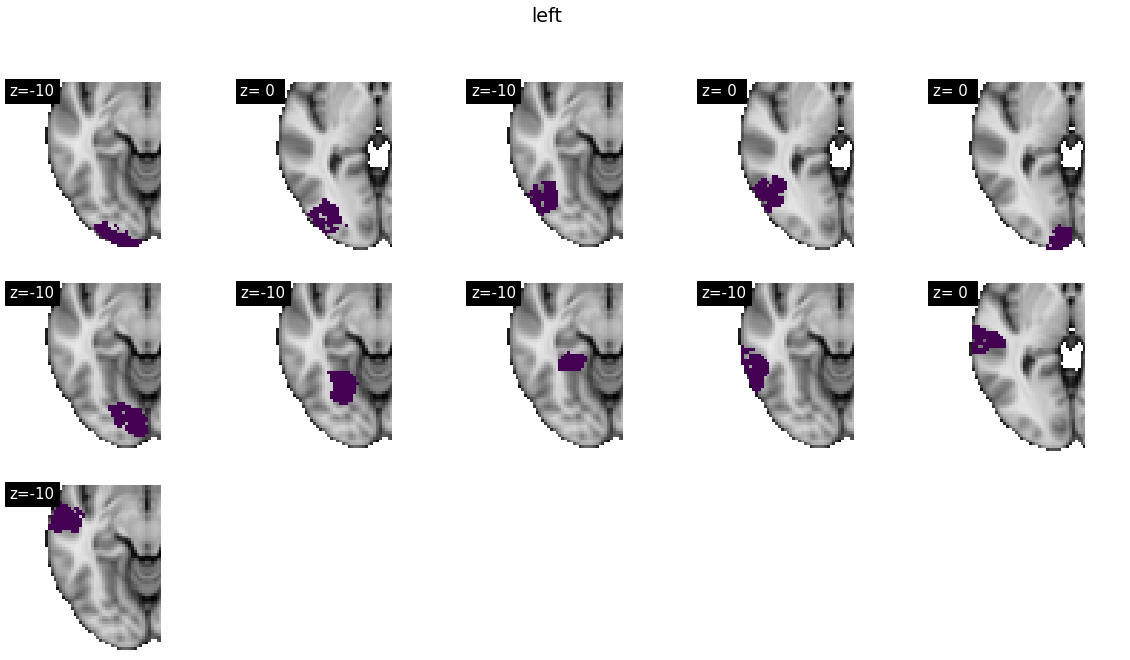

In [62]:
# Plot and save ROIs - axial plots
def plot_slice(fig,ax,row,hem):
    zslices = [-10,0]
    #for row in df_minus10_0_right.iterrows(): #for i,n in enumerate(df['Nodes']):
    #print('row:',row[0])
    n = int(row[1]['Nodes'])
    nodes = np.zeros((268,))
    nodes[n] = 1
    img = roi_to_brain(pd.Series(nodes), mask_x)
    zsl = row[1]['MNIz']
    if np.abs(zsl-zslices[0]) < np.abs(zsl-zslices[1]):
        zsl = zslices[0]
    else:
        zsl = zslices[1]
    out = os.path.join(fig_save_loc,f'ROIs/axial/nodes_minus10_0_right/{i}_node_ind{n}.png')
    #out = os.path.join(fig_save_loc,f'ROIs/axial/nodes_minus10_right/{i}_node_ind{n}.png')
    if zsl == 0:
        title_txt = 'z= ' + str(zsl) + ' '
    elif zsl == -10:
        title_txt = 'z=' + str(zsl)
    ax_plot = plot_img(img.to_nifti(), annotate=False, title=title_txt,display_mode = 'z',cut_coords =[zsl],bg_img = bg_img,colorbar= False, threshold = .1,axes=ax,figure=fig)
    ymin,ymax = plt.ylim()
    xmin,xmax = plt.xlim()
    #print(ymin,ymax)
    #print(xmin,xmax)
    
    if hem == 'left':
        plt.ylim(ymin,10)
        plt.xlim(xmin,10)
    elif hem == 'right':
        plt.ylim(ymin,10)
        plt.xlim(-10,xmax)

ncols =5
nrows = int(np.ceil(df_minus10_0_right.shape[0]/ncols))
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,7))
plt.suptitle('right')
for row in df_minus10_0_right.iterrows(): #for i,n in enumerate(df['Nodes']):
    r,c = int(np.floor(row[0]/5)),row[0]%5
    #print(r,c)
    plot_slice(fig,ax[r,c],row,'right')
    #fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3,3))
    #plot_slice(fig,ax,row)
for i in range(int(nrows*ncols-df_minus10_0_right.shape[0])):
    ax[r,c+1+i].axis('off')
#plt.savefig(os.path.join(fig_save_loc,f'ROIs/axial/nodes_minus10_0/all_ROIs.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


nrows = int(np.ceil(df_minus10_0_left.shape[0]/ncols))
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,10.5))
plt.suptitle('left')
for row in df_minus10_0_left.iterrows(): #for i,n in enumerate(df['Nodes']):
    r,c = int(np.floor(row[0]/5)),row[0]%5
    #print(r,c)
    plot_slice(fig, ax[r,c], row, 'left')
    #fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3,3))
    #plot_slice(fig,ax,row)
for i in range(int(nrows*ncols-df_minus10_0_left.shape[0])):
    ax[r,c+1+i].axis('off')
#plt.savefig(os.path.join(fig_save_loc,f'ROIs/axial/nodes_minus10_0/all_ROIs.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


In [187]:
# Plot and save ROIs - axial plots single figure (useful to combine on Illustrator/Inkscape)
# LEFT HEM
'''zslices = [-10,0]
fig = plt.figure(1,figsize = (3,30))
nrows = df_minus10_0.shape[0]
for row in df_minus10_0.iterrows(): #for i,n in enumerate(df['Nodes']):
    print('row:',row[0])
    #if i>2:
    #    break
    ax = fig.add_subplot(nrows,1,i+1)
    n = int(row[1]['Nodes'])
    nodes = np.zeros((268,))
    nodes[n] = np.log(earliest_pt_coaxbill_corrected[n]*TR)

    img = roi_to_brain(pd.Series(nodes), mask_x)
    zsl = row[1]['MNIz']
    if np.abs(zsl-zslices[0]) < np.abs(zsl-zslices[1]):
        zsl = zslices[0]
    else:
        zsl = zslices[1]
    ax_plot = plot_img(img.to_nifti(), display_mode = 'z',cut_coords =[zsl],cmap = 'viridis',bg_img = bg_img,colorbar= False, threshold = .1,vmin = np.log(.72),vmax=np.log(20),axes =ax,figure=fig,annotate=False) # cmap = 'plasma'
    ax_plot.add_contours(color_rois((nodes)),linewidths=1, colors=['k'],linestyles='solid')
    #ax_plot = crop_img(ax_plot)
    ax_plot.title(f'z={zsl}',bgcolor='w',color='k')
    ymin,ymax = plt.ylim()
    #print(ymin,ymax)
    plt.ylim(ymin,10)
    #print(xmin,xmax)
    xmin,xmax = plt.xlim()
    plt.xlim(xmin,10)

plt.savefig(os.path.join(fig_save_loc,f'ROIs/axial/nodes_minus10_0/all_ROIs.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
plt.clf()

# RIGHT HEM
fig = plt.figure(1,figsize = (3,30))
nrows = df_minus10_0_right.shape[0]
for row in df_minus10_0_right.iterrows(): #for i,n in enumerate(df['Nodes']):
    i = row[0]
    print(i)
    #if i>2:
    #    break
    ax = fig.add_subplot(nrows,1,i+1)
    n = int(row[1]['Nodes'])
    nodes = np.zeros((268,))
    nodes[n] = np.log(earliest_pt_coaxbill_corrected[n]*TR)

    img = roi_to_brain(pd.Series(nodes), mask_x)
    zsl = row[1]['MNIz']
    if np.abs(zsl-zslices[0]) < np.abs(zsl-zslices[1]):
        zsl = zslices[0]
    else:
        zsl = zslices[1]
    ax_plot = plot_img(img.to_nifti(), display_mode = 'z',cut_coords =[zsl],cmap = 'viridis',bg_img = bg_img,colorbar= False, threshold = .1,vmin = np.log(.72),vmax=np.log(20),axes =ax,figure=fig,annotate=False) # cmap = 'plasma'
    ax_plot.add_contours(color_rois((nodes)),linewidths=1, colors=['k'],linestyles='solid')
    #ax_plot = crop_img(ax_plot)
    ax_plot.title(f'z={zsl}',bgcolor='w',color='k')
    ymin,ymax = plt.ylim()
    #print(ymin,ymax)
    plt.ylim(ymin,10)
    #print(xmin,xmax)
    xmin,xmax = plt.xlim()
    plt.xlim(-10,xmax)  #plt.xlim(xmin,10)

plt.savefig(os.path.join(fig_save_loc,f'ROIs/axial/nodes_minus10_0_right/all_ROIs.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
plt.clf()'''

"zslices = [-10,0]\nfig = plt.figure(1,figsize = (3,30))\nnrows = df_minus10_0.shape[0]\nfor row in df_minus10_0.iterrows(): #for i,n in enumerate(df['Nodes']):\n    print('row:',row[0])\n    #if i>2:\n    #    break\n    ax = fig.add_subplot(nrows,1,i+1)\n    n = int(row[1]['Nodes'])\n    nodes = np.zeros((268,))\n    nodes[n] = np.log(earliest_pt_coaxbill_corrected[n]*TR)\n\n    img = roi_to_brain(pd.Series(nodes), mask_x)\n    zsl = row[1]['MNIz']\n    if np.abs(zsl-zslices[0]) < np.abs(zsl-zslices[1]):\n        zsl = zslices[0]\n    else:\n        zsl = zslices[1]\n    ax_plot = plot_img(img.to_nifti(), display_mode = 'z',cut_coords =[zsl],cmap = 'viridis',bg_img = bg_img,colorbar= False, threshold = .1,vmin = np.log(.72),vmax=np.log(20),axes =ax,figure=fig,annotate=False) # cmap = 'plasma'\n    ax_plot.add_contours(color_rois((nodes)),linewidths=1, colors=['k'],linestyles='solid')\n    #ax_plot = crop_img(ax_plot)\n    ax_plot.title(f'z={zsl}',bgcolor='w',color='k')\n    ymin,ymax

In [74]:
def turn_axes_off(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)

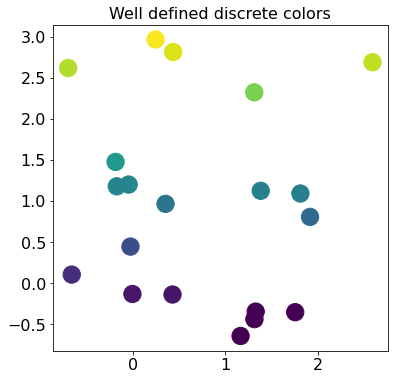

In [75]:
from matplotlib.patches import ConnectionPatch
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

class MplColorHelper:

  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)


# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

# define the data between 0 and 20
NUM_VALS = 20
x = np.random.uniform(-.72, np.log(20), size=NUM_VALS)
y = np.random.uniform(0-.72, np.log(20), size=NUM_VALS)

# define the color chart between 2 and 10 using the 'autumn_r' colormap, so
#   y <= 2  is yellow
#   y >= 10 is red
#   2 < y < 10 is between from yellow to red, according to its value
#COL = MplColorHelper('viridis', 2, 10)
COL = MplColorHelper('viridis', np.log(.72),np.log(20))

scat = ax.scatter(x,y,s=300, c=COL.get_rgb(y))
ax.set_title('Well defined discrete colors')
plt.show()

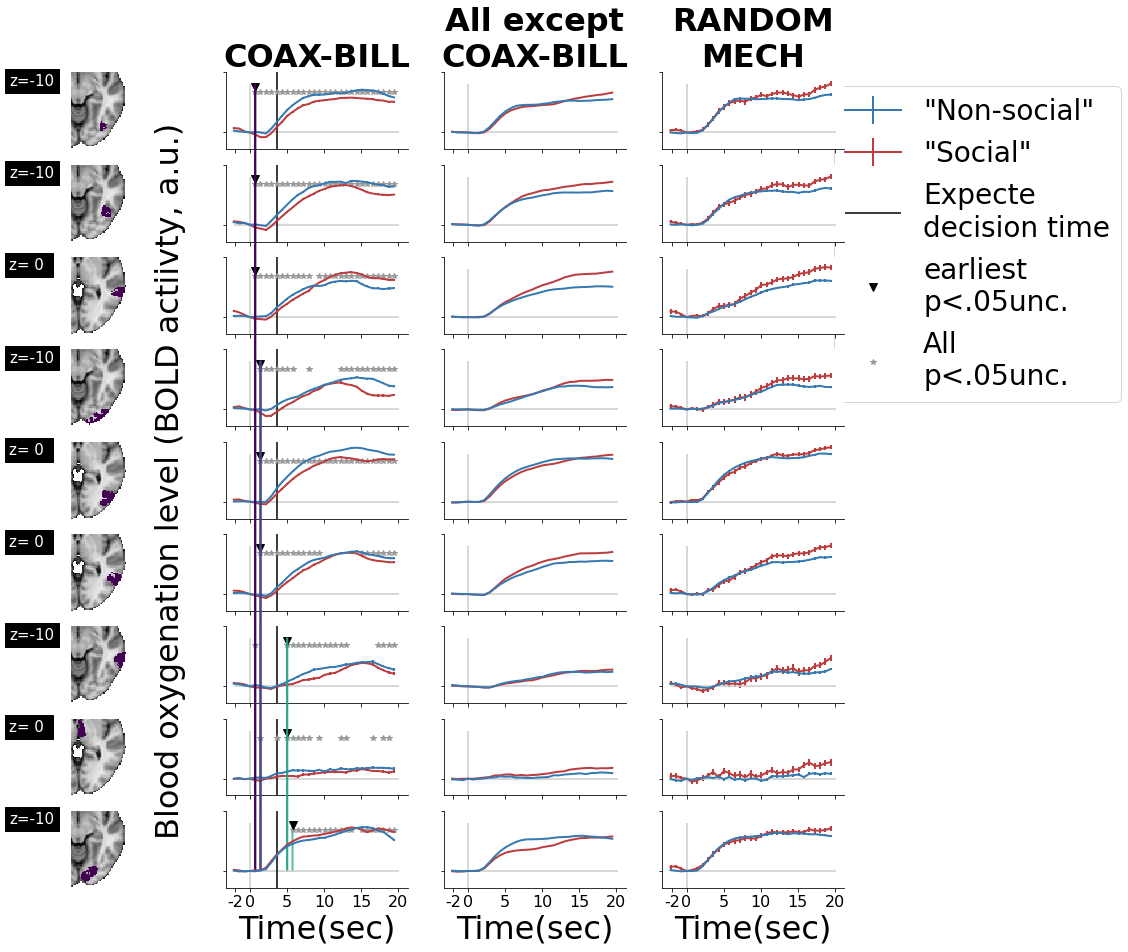

In [80]:
# RIGHT HEM
coaxbill_col = 1
[ymin,ymax] = [-.7,2.5]
xlbls = [-2,0,5,10,15,20]
x_ticks = [(i/TR)+tr0_ind for i in xlbls]
xlbls = [str(i) for i in xlbls]
nrows = df_minus10_0_right.shape[0]
line_loc = []
fig, ax = plt.subplots(nrows, ncols = 4, sharex=True, sharey=True, figsize = (15,15)) # figsize = (20,15))
#plt.suptitle('Left hemisphere', fontweight='bold')    
for row in df_minus10_0_right.iterrows(): #for i,n in enumerate(df['Nodes']):
     #fig, ax = plt.figure(i+1,figsize=(10,5))   
     r = row[0] #print(r)
     n = int(row[1]['Nodes'])

     ax1 = ax[r,0]
     plot_slice(fig,ax1,row,'right')
     
     ax1 = ax[r,1]
     movieTC_yes = tcs_trial_z[subs,n,:,0] # nsubs * ntimepts
     movieTC_no  = tcs_trial_z[subs,n,:,1] # nsubs * ntimepts
     sig = np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]   # for the grey asterisks
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     ax1.vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax1.hlines(0,0,31,color=[.8,.8,.8])
     ax1.set_ylim(ymin,ymax)
     ax1.vlines(tr0_ind+5,ymin,ymax,color = 'k',label = 'Expecte\ndecision time')
     ax1.set_yticks([0,2.5])
     #ax[r,0].axvspan(tr0_ind,tr0_ind+5,color='g',)
     #plt.title(f'Node {n+1},COAX"Social"-\nBILL"Non-social"')
     if r==0:
          ax1.set_title(f'COAX-BILL',fontweight = 'bold',fontsize=32)
     ax1.plot(sig,np.repeat(1.7,len(sig)),color = [.6,.6,.6],ls = 'None',marker = '*',label ="All\np<.05unc.")
     ax1.plot(earliest_pt_coaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest\np<.05unc.")
     line_loc.append(earliest_pt_coaxbill[n])
     #if end_diff_coaxbill[n] == 1:
     #    ax[r,0].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
     ax1.set_xticks(x_ticks)
     ax1.set_xticklabels(xlbls)
     if r == np.floor(df_minus10_0_right.shape[0]/2):
          ax1.set_ylabel('Blood oxygenation level (BOLD actiivty, a.u.)\n ',fontsize = 32)
     if r == nrows-1:
          ax1.set_xlabel('Time(sec)',fontsize=32)
     turn_axes_off(ax1)
     #sig = np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]    
     if r == 0:
          ax1.legend()
          handles, labels = ax1.get_legend_handles_labels()
          order = [4,3,2,1,0]
          ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=1, bbox_to_anchor=[5,1],fontsize=28)#=[1,3])

     

     movieTC_yes = tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
     movieTC_no  = tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
          
     ax1 = ax[r,2]
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     ax1.vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax1.hlines(0,0,31,color=[.8,.8,.8])
     if r==0:
          ax1.set_title(f'All except\nCOAX-BILL',fontweight = 'bold',fontsize = 32)
     ax1.set_xticks(x_ticks)
     ax1.set_xticklabels(xlbls)
     ax1.set_ylim(ymin,ymax)
     
     #plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
     #plt.plot(earliest_pt_all_nocoaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
     #if end_diff_rand[n] == 1:
     #    plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
     if r == nrows-1:
          ax1.set_xlabel('Time(sec)',fontsize=32)
     turn_axes_off(ax1)

     movie_ind = 4
     movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
     movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
     #sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    

     ax1 =  ax[r,3]
     ax1.set_ylim(ymin,ymax)
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     if r==0:
          ax1.set_title(f'RANDOM\nMECH',fontweight = 'bold',fontsize = 32)
     ax1.vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax1.hlines(0,0,31,color=[.8,.8,.8])
     ax1.set_xticks(x_ticks)
     ax1.set_xticklabels(xlbls)
     
     if r == nrows-1:
          ax1.set_xlabel('Time(sec)',fontsize=32)
     turn_axes_off(ax1)


col = COL.get_rgb([np.log((i-3)*TR) for i in line_loc])
for i in range(len(line_loc)):
     xyA = (line_loc[i], 2)
     xyB = (line_loc[i], 0)
     coordsA = "data"
     coordsB = "data"
     if line_loc[i] != line_loc[i-1]:
          con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
                              axesA=ax[i,coaxbill_col], axesB=ax[nrows-1,coaxbill_col],color=col[i],alpha = .8, lw = 2)#col[i])
     ax[nrows-1,coaxbill_col].add_artist(con)

#fig.text(0.02,.97,'Postero-lateral node timecourses \n(right hemisphere)',fontsize=20)

plt.savefig(os.path.join(fig_save_loc,f'ROIs/timcecourses_righthem.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.tight_layout()

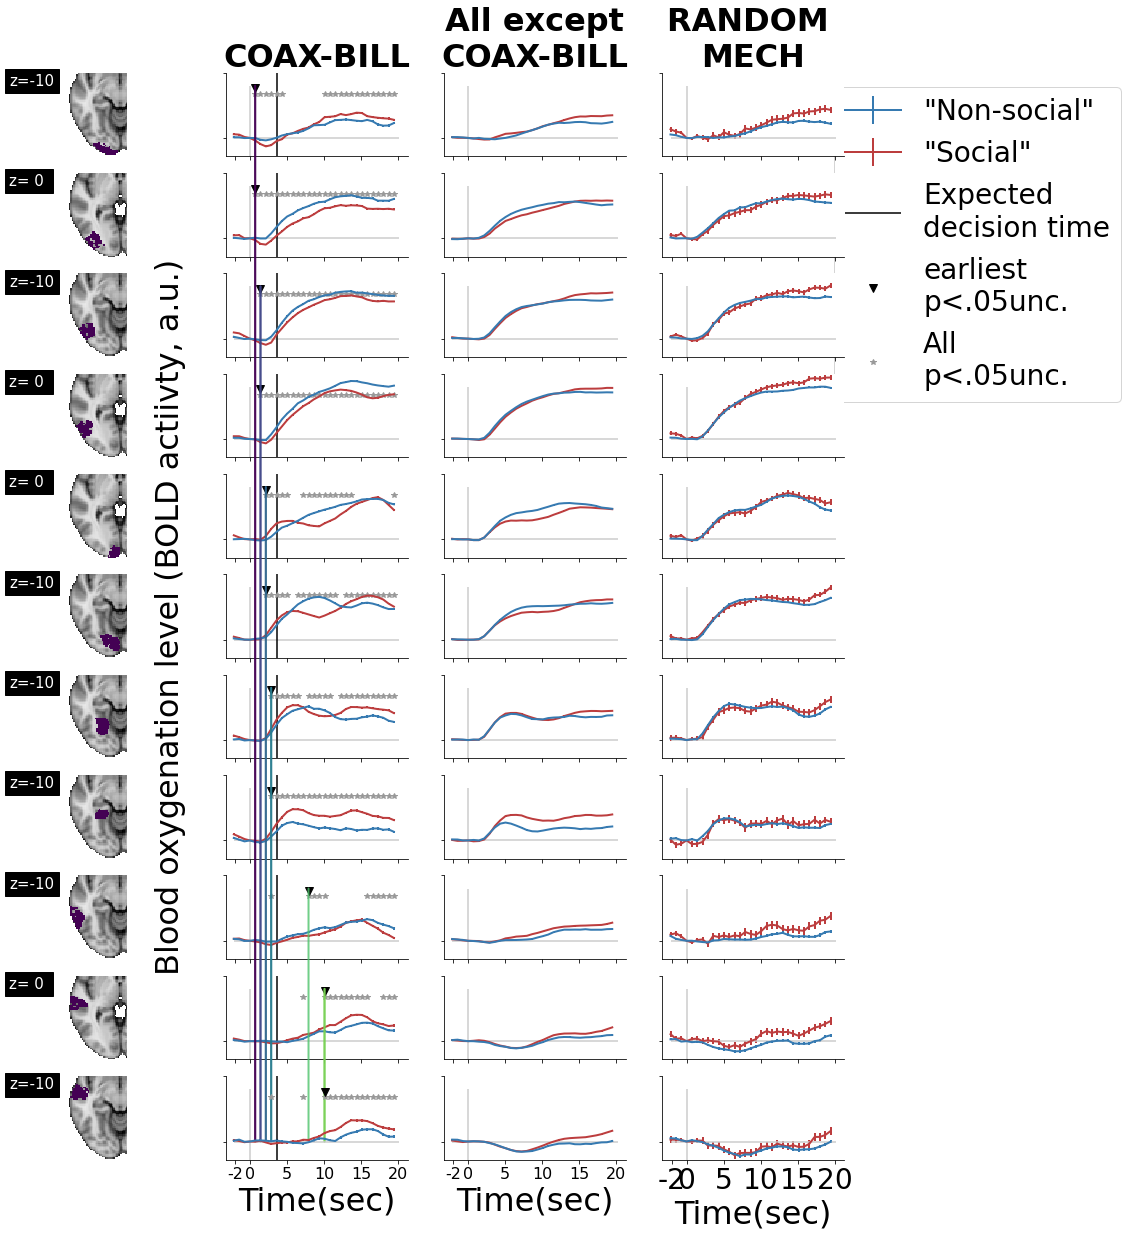

In [260]:
# LEFT HEM

coaxbill_col = 1
[ymin,ymax] = [-.7,2.5]
xlbls = [-2,0,5,10,15,20]
x_ticks = [(i/TR)+tr0_ind for i in xlbls]
xlbls = [str(i) for i in xlbls]
nrows = df_minus10_0_left.shape[0]
line_loc = []
fig, ax = plt.subplots(nrows, ncols = 4, sharex=True, sharey=True, figsize = (15,20)) # figsize = (20,15))
#plt.suptitle('Left hemisphere', fontweight='bold')    
for row in df_minus10_0_left.iterrows(): #for i,n in enumerate(df['Nodes']):
     #fig, ax = plt.figure(i+1,figsize=(10,5))   
     r = row[0] #print(r)
     n = int(row[1]['Nodes'])

     ax1 = ax[r,0]
     plot_slice(fig,ax1,row,'left')
     
     ax1 = ax[r,1]
     movieTC_yes = tcs_trial_z[subs,n,:,0] # nsubs * ntimepts
     movieTC_no  = tcs_trial_z[subs,n,:,1] # nsubs * ntimepts
     sig = np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]   # for the grey asterisks
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     ax1.vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax1.hlines(0,0,31,color=[.8,.8,.8])
     ax1.set_ylim(ymin,ymax)
     ax1.vlines(tr0_ind+5,ymin,ymax,color = 'k',label = 'Expected\ndecision time')
     ax1.set_yticks([0,2.5])
     #ax[r,0].axvspan(tr0_ind,tr0_ind+5,color='g',)
     #plt.title(f'Node {n+1},COAX"Social"-\nBILL"Non-social"')
     if r==0:
          ax1.set_title(f'COAX-BILL',fontweight = 'bold',fontsize = 32)
     ax1.plot(sig,np.repeat(1.7,len(sig)),color = [.6,.6,.6],ls = 'None',marker = '*',label ="All\np<.05unc.")
     ax1.plot(earliest_pt_coaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest\np<.05unc.")
     line_loc.append(earliest_pt_coaxbill[n])
     #if end_diff_coaxbill[n] == 1:
     #    ax[r,0].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
     ax1.set_xticks(x_ticks)
     ax1.set_xticklabels(xlbls)
     if r == np.floor(df_minus10_0_left.shape[0]/2):
          ax1.set_ylabel('Blood oxygenation level (BOLD actiivty, a.u.)\n ',fontsize = 32)
     if r == nrows-1:
          ax1.set_xlabel('Time(sec)',fontsize=32)
     turn_axes_off(ax1)
     #sig = np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]    
     if r == 0:
          #ax1.legend()
          handles, labels = ax1.get_legend_handles_labels()
          order = [4,3,2,1,0]
          #ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2, bbox_to_anchor=[4,3], fontsize=32)#=[1,3])
          ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=[5,1], fontsize=28)#=[1,3])

     movieTC_yes = tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
     movieTC_no  = tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
          
     ax1 = ax[r,2]
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     ax1.vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax1.hlines(0,0,31,color=[.8,.8,.8])
     if r==0:
          ax1.set_title(f'All except\nCOAX-BILL',fontweight = 'bold',fontsize = 32)
     ax1.set_xticks(x_ticks)
     ax1.set_xticklabels(xlbls)
     ax1.set_ylim(ymin,ymax)
     
     #plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
     #plt.plot(earliest_pt_all_nocoaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
     #if end_diff_rand[n] == 1:
     #    plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
     if r == nrows-1:
          ax1.set_xlabel('Time(sec)',fontsize=32)
     turn_axes_off(ax1)

     movie_ind = 4
     movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
     movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
     #sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    

     ax1 =  ax[r,3]
     ax1.set_ylim(ymin,ymax)
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     if r==0:
          ax1.set_title(f'RANDOM \nMECH',fontweight = 'bold',fontsize = 32)
     ax1.vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax1.hlines(0,0,31,color=[.8,.8,.8])
     ax1.set_xticks(x_ticks)
     ax1.set_xticklabels(xlbls,fontsize=28)
     
     if r == nrows-1:
          ax1.set_xlabel('Time(sec)',fontsize=32)
     turn_axes_off(ax1)


col = COL.get_rgb([np.log((i-3)*TR) for i in line_loc])
for i in range(len(line_loc)):
     xyA = (line_loc[i], 2)
     xyB = (line_loc[i], 0)
     coordsA = "data"
     coordsB = "data"
     if line_loc[i] != line_loc[i-1]:
          con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
                              axesA=ax[i,coaxbill_col], axesB=ax[nrows-1,coaxbill_col],color=col[i],alpha = .8, lw = 2)#col[i])
     ax[nrows-1,coaxbill_col].add_artist(con)

#fig.text(0.02,.97,'(c) Postero-lateral node timecourses \n   (left hemisphere)',fontsize=40)

plt.savefig(os.path.join(fig_save_loc,f'ROIs/timcecourses_lefthem.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.tight_layout()



In [1254]:
for n in np.where(nodes_ind)[0]:
    print(n+1,earliest_pt_coaxbill_corrected[n], [np.round(i) for i in eval(shen268_lbl[str(n+1)][0])['coords']], eval(shen268_lbl[str(n+1)][0])['name'])a

9 4.0 [29.0, 51.0, 19.0] 100.00% Frontal_Pole
10 6.0 [9.0, 53.0, 24.0] 48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus
12 6.0 [15.0, 37.0, 49.0] 56.57% Superior_Frontal_Gyrus; 41.14% Frontal_Pole
16 8.0 [54.0, 25.0, 1.0] 42.87% Inferior_Frontal_Gyrus_pars_triangularis; 25.98% Inferior_Frontal_Gyrus_pars_opercularis; 12.25% Frontal_Orbital_Cortex; 10.24% Frontal_Pole; 6.02% Frontal_Operculum_Cortex
22 14.0 [40.0, 18.0, 29.0] 76.55% Middle_Frontal_Gyrus; 21.03% Inferior_Frontal_Gyrus_pars_opercularis
31 13.0 [40.0, 3.0, 34.0] 75.69% Precentral_Gyrus; 20.60% Middle_Frontal_Gyrus
49 8.0 [41.0, -75.0, 28.0] 100.00% Lateral_Occipital_Cortex_superior_division
50 5.0 [49.0, -58.0, 14.0] 35.64% Angular_Gyrus; 25.13% Middle_Temporal_Gyrus_temporooccipital_part; 22.21% Lateral_Occipital_Cortex_inferior_division; 16.62% Lateral_Occipital_Cortex_superior_division
65 1.0 [59.0, -44.0, 9.0] 51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_p

In [1082]:
min(np.abs(log_nodes_all_nocoaxbill[log_nodes_all_nocoaxbill!=0]))

0.3285040669720361

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/js_plotting_utils.py:81: UserWarning: vmin cannot be chosen when cmap is symmetric
  warnings.warn('vmin cannot be chosen when cmap is symmetric')
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))


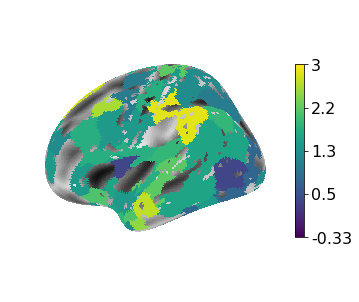

In [1387]:
texture = surface.vol_to_surf(color_rois(log_nodes_all_nocoaxbill), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=True, vmax = vmax,vmin=vmin,
                            threshold=.01, bg_map=fsaverage.sulc_left,symmetric_cbar = False,ax=ax)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
view = plotting.view_surf(fsaverage.infl_left, texture, threshold=.01, vmin=vmin, vmax = vmax,bg_map=fsaverage.sulc_left,cmap =cmap)


# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view


/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/js_plotting_utils.py:81: UserWarning: vmin cannot be chosen when cmap is symmetric
  warnings.warn('vmin cannot be chosen when cmap is symmetric')
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))


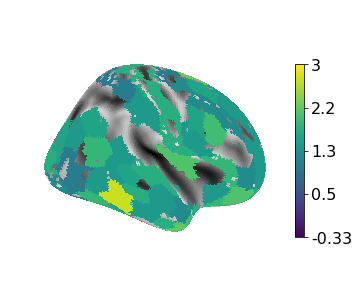

In [1407]:
texture = surface.vol_to_surf(color_rois(log_nodes_all_nocoaxbill), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot1=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True, vmax = vmax,vmin=vmin,
                            threshold=.01, bg_map=fsaverage.sulc_right,symmetric_cbar = False,ax=ax)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
view = plotting.view_surf(fsaverage.infl_right, texture, threshold=.01, vmin=vmin, vmax = vmax,bg_map=fsaverage.sulc_right, cmap =cmap)


# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view


In [1379]:
view.save_as_html(os.path.join(fig_save_loc,'test.html'))

# Plotting correlations

In [42]:
'''ax = fig.add_subplot(221)
X,Y = earliest_pt_all_corrected_nocoaxbill,earliest_pt_coaxbill_corrected
plot_fig(X,Y,'TR#\n(ALL MOVIES)','TR#\n(COAX-BILL)',xymin,xymax)
ax.set_aspect('equal')
#signodes
plt.plot(X[nodes_coaxbill_rand_all],Y[nodes_coaxbill_rand_all],mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'GLM analysis\nnodes')
#plot_sig_nodes(X,Y,common_nodes_soc_uns_nonsoc)
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None')
plt.title('EARLIEST POINT OF DIVERGENCE',fontweight='bold')
plt.legend(bbox_to_anchor = (2,1.01),fontsize =16)
plt.xlim(xymin,xymax)
plt.ylim(xymin,xymax)
#plt.xticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
#plt.yticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
plt.savefig(os.path.join(fig_save_loc,'earliestpt_scatterplots_all_coaxbill.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
def plot_sig_nodes(X,Y,inds):
    plt.plot(X[inds],Y[inds],ls='None',marker='+',
    mfc='k', mec='k',mew = 3, linewidth = 5,label = 'sig. across both axes',ms=12)
    #plt.plot(X[nodes_coaxbill_rand_all_fish],Y[nodes_coaxbill_rand_all_fish],ls='None',marker='D',
    #mfc='g', mec='g',label = 'sig. across all\ncomparisons',ms=10)
    
'''


"ax = fig.add_subplot(221)\nX,Y = earliest_pt_all_corrected_nocoaxbill,earliest_pt_coaxbill_corrected\nplot_fig(X,Y,'TR#\n(ALL MOVIES)','TR#\n(COAX-BILL)',xymin,xymax)\nax.set_aspect('equal')\n#signodes\nplt.plot(X[nodes_coaxbill_rand_all],Y[nodes_coaxbill_rand_all],mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'GLM analysis\nnodes')\n#plot_sig_nodes(X,Y,common_nodes_soc_uns_nonsoc)\n#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None')\nplt.title('EARLIEST POINT OF DIVERGENCE',fontweight='bold')\nplt.legend(bbox_to_anchor = (2,1.01),fontsize =16)\nplt.xlim(xymin,xymax)\nplt.ylim(xymin,xymax)\n#plt.xticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])\n#plt.yticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])\nplt.savefig(os.path.join(fig_save_loc,'earliestpt_scatterplots_all_coaxbill.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')"

 
0.1433 x + 5.764


<Figure size 1080x691.2 with 0 Axes>

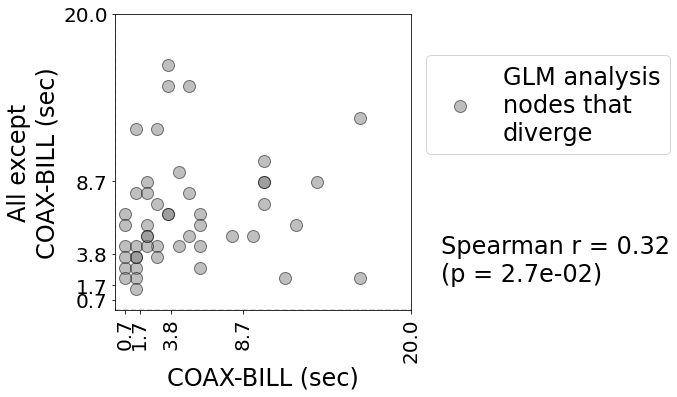

In [51]:
# correlation plots

def plot_fig(X,Y,xlabel,ylabel,xymin,xymax):
    inds = (~np.isnan(X)) & (~np.isnan(Y))
    X,Y = X[inds],Y[inds]
    plt.plot(X,Y,ls='None',marker='o',alpha = .5,color='grey',mec='k',label = 'GLM analysis\nnodes that\ndiverge',markersize=12)
    
    plt.xlabel(xlabel, fontsize=24)
    plt.ylabel(ylabel, fontsize=24)
   
    plt.xlim(xymin,xymax)
    plt.ylim(xymin,xymax)

    xpos = xymin+ .55*(xymax-xymin)
    ypos = xymin+ .8*(xymax-xymin)
    
    r,p = stats.spearmanr(X,Y,nan_policy='omit')
    ax.annotate(f'Spearman r = {r:.2f}\n(p = {p:.1e})', xy=(1.1, 0.1), xycoords='axes fraction', fontsize=24)

    m, b = np.polyfit(X,Y, 1)
    print(np.poly1d([m,b]))
    xplot = np.linspace(xymin,xymax,10)
    #plt.plot(xplot, m*xplot + b,ls='dashed',color = 'k',label = 'line of best fit')
    #plt.title(np.poly1d([m,b]))

    #plt.text(xymin,.7*xymax,f'sl.={m:.2f},\nint.={b:.2f}')
    plt.vlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
    plt.hlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)

# ALL MOVIES VS. COAXBILL
# scatterplot
dims = [15,9.6]
fig= plt.figure(1,figsize = dims)

xymin,xymax = 0,31
#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')

# scatterplot - nodes with a diff in the end
dims = [16,12]
fig= plt.figure(2,figsize = dims)

xymin,xymax = 0,31
#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
ax = fig.add_subplot(221)
inds = (end_diff_all_nocoaxbill==1)&(end_diff_coaxbill==1) & (nodes_coaxbill_rand_all)
X,Y = earliest_pt_coaxbill_corrected[inds]*TR,earliest_pt_all_corrected_nocoaxbill[inds]*TR
plot_fig(X,Y,'COAX-BILL (sec)','All except\nCOAX-BILL (sec)',xymin,xymax)
#plt.plot(earliest_pt_coaxbill_corrected[inds & (nodes_coaxbill_rand_all)]*TR,earliest_pt_all_corrected_nocoaxbill[(inds)&(nodes_coaxbill_rand_all)]*TR,mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'GLM analysis nodes')
ax.set_aspect('equal')
#signodes
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'pairwise sig.')
#plot_sig_nodes(X,Y,inds)
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None')
#plt.text(-5,22,'(c) Correlation between earliest points of divergence',fontweight='bold',fontsize=32,ha='left')

plt.legend(bbox_to_anchor = (1.01,.9),fontsize =24)
plt.xlim(0,20)
plt.ylim(0,20)
tklabels = [.7,1.7,3.8,8.7,20]
plt.xticks(tklabels, rotation = 90,fontsize=20)
plt.yticks(tklabels, rotation = 0,fontsize=20)
#plt.xticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
#plt.yticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
plt.savefig(os.path.join(fig_save_loc,'earliestpt_scatterplots_enddiff_all_coaxbill.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')



In [1190]:
len(np.where(inds)[0])

48

([<matplotlib.axis.XTick at 0x7f9163a77950>,
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

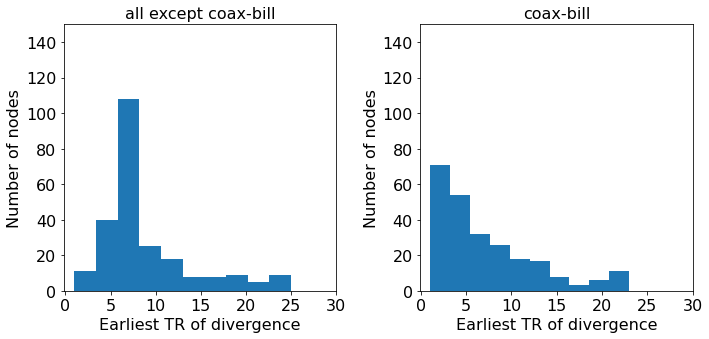

In [1161]:
plt.figure(1,figsize=(10,5))
plt.subplot(121)
plt.hist(earliest_pt_all_corrected_nocoaxbill)
plt.ylabel('Number of nodes')
plt.xlabel('Earliest TR of divergence')
plt.title('all except coax-bill')
plt.ylim(0,150)
plt.xticks([0,5,10,15,20,25,30])
plt.subplot(122)
plt.hist(earliest_pt_coaxbill_corrected)
plt.title('coax-bill')
plt.xlabel('Earliest TR of divergence')
plt.ylabel('Number of nodes')
plt.ylim(0,150)
plt.tight_layout()
plt.xticks([0,5,10,15,20,25,30])


/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in log


 
0.1979 x + 3.508


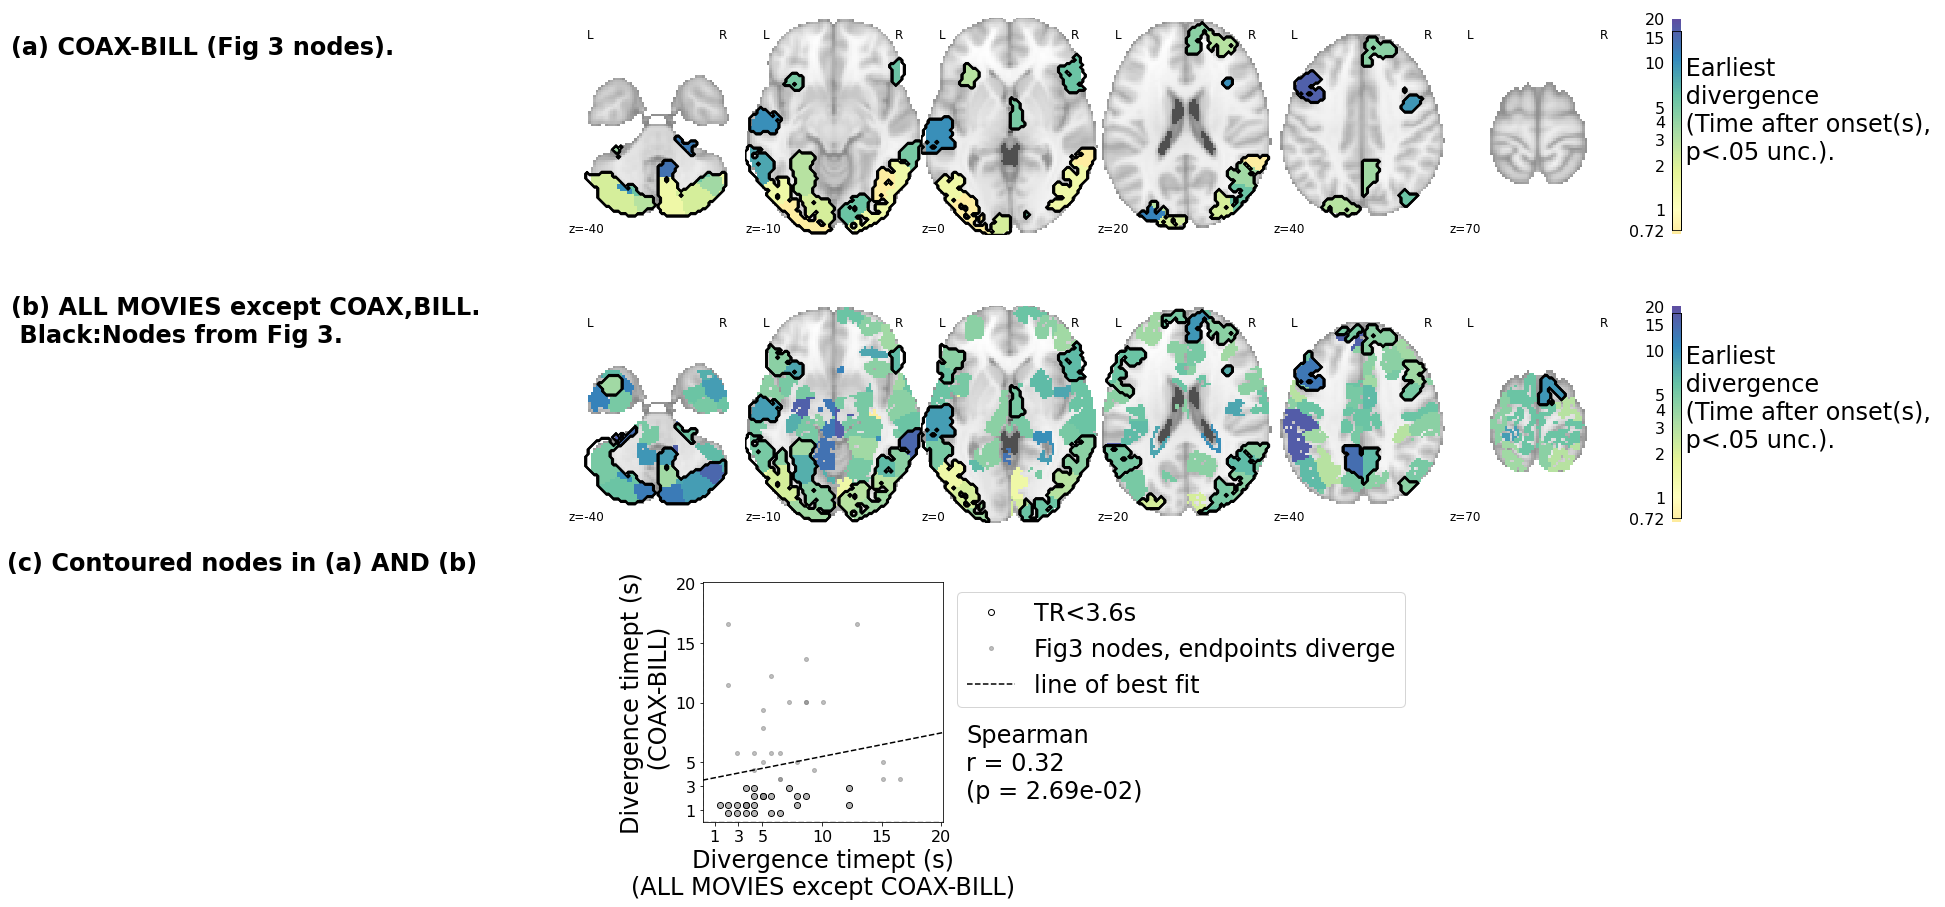

In [65]:
#fig 5, plotted in seconds
TR=.72
time_units = 'sec' # 'sec','TR'
if time_units == 'sec':
    vmin,vmax = 0.7,20
    txt = ' Earliest\n divergence\n (Time after onset(s),\n p<.05 unc.)'
    tks = [.72,1,2,3,4,5,10,15,20]

elif time_units == 'TR':
    vmin,vmax = 1,28
    txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.)'
    tks = [1,7,14,21,28]
else:
    print('Something wrong, check!!')

fig=plt.figure(1,figsize=(20,15))
cmap = 'Spectral' #'viridis'

invert = 0 # 1 if timepts are to be converted to distance from end (this is for better color mapping)

log_scale = 1
if log_scale:
    vmin,vmax = (np.log(vmin)- .1*abs(np.log(vmin))),np.log(vmax)

# (a) coax-bill
#hatch_str = "/"*6
ax = plt.subplot(311)
# highlighting pre0decision nodes
plt.rcParams.update({'hatch.color': 'white'})
node_inds = (nodes_coaxbill_rand_all) & (end_diff_coaxbill==1)

nodes = np.empty((268,))
nodes[:] = np.nan
if time_units == 'sec':
    nodes[node_inds] = earliest_pt_coaxbill_corrected[node_inds] * TR
    predec_nodes = (nodes<(5*TR)) & (nodes>0)
    txt = ' Earliest\n divergence\n (Time after onset(s), \n p<.05 unc.).'
    early_defn = 't<3.6s'
    
elif time_units == 'TR':
    nodes[node_inds] = earliest_pt_coaxbill_corrected[node_inds]
    predec_nodes = (nodes<5) & (nodes>0)
    txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.).'
    early_defn = 'TR<5'

if log_scale:
    log_nodes = np.empty((268,))
    log_nodes[:] = np.nan
    log_nodes[~np.isnan(nodes)] = np.log(nodes[~np.isnan(nodes)])
    img = roi_to_brain(pd.Series(log_nodes), mask_x)
elif invert:
    img = roi_to_brain(pd.Series(vmax-nodes), mask_x)
else:
    img = roi_to_brain(pd.Series(nodes), mask_x)

ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', symmetric_cbar = False, vmax = vmax, cut_coords=coords, cmap = cmap,colorbar=True,annotate=True,axes = ax)
node_inds = (nodes_coaxbill_rand_all) & (end_diff_coaxbill==1) & (~np.isnan(earliest_pt_coaxbill_corrected))
ax_plot.add_contours(color_rois(node_inds), linewidths=1, colors=['k'],linestyles ='solid',filled=False)
#ax_plot.add_contours(color_rois(predec_nodes),linewidths=1, colors=['k'],linestyles ='-',filled=True, hatches = ['///','...'], alpha = 0)

if log_scale:
    ax_plot._colorbar_ax.set_ylim(vmin,vmax)
    ax_plot._cbar.set_ticks(np.log(tks))
    ax_plot._cbar.set_ticklabels([str(i) for i in tks])

elif invert:
    ax_plot._colorbar_ax.set_ylim(vmin,vmax-1)
    ax_plot._cbar.set_ticks(tks)
    ax_plot._cbar.set_ticklabels([str(vmax-i) for i in tks])
    
else:
    ax_plot._colorbar_ax.set_ylim(vmin,vmax) 
    ax_plot._cbar.set_ticks(tks)# default ticklabels are good.
    
ax_plot._colorbar_ax.text(0.9,.8*vmax,txt,fontsize=24,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
#ax_plot.title("(b) COAX-BILL (Fig 3 nodes)",fontsize=24,bgcolor='None',color='k',fontweight='bold')
ax.annotate(f'(a) COAX-BILL (Fig 3 nodes).', xy=(-.5, .8), fontsize = 24, fontweight = 'bold', xycoords='axes fraction') #\nHatched white: early{early_defn}nodes


#(b) ALL MOVIES except  COAX-BILL
ax = plt.subplot(312)
nodes = np.zeros((268,))
node_inds = (end_diff_all_nocoaxbill==1)

if time_units == 'sec':
    nodes[node_inds] = earliest_pt_all_corrected_nocoaxbill[node_inds] * TR
elif time_units == 'TR':
    nodes[node_inds] = earliest_pt_all_corrected_nocoaxbill[node_inds]

if log_scale:
    log_nodes = np.empty((268,))
    log_nodes[:] = np.nan
    log_nodes[~np.isnan(nodes)] = np.log(nodes[~np.isnan(nodes)])
    img = roi_to_brain(pd.Series(log_nodes), mask_x)
elif invert:
    img = roi_to_brain(pd.Series(vmax-nodes), mask_x)
else:
    img = roi_to_brain(pd.Series(nodes), mask_x)

ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', symmetric_cbar = False, vmax= vmax,cut_coords=coords, cmap = cmap,colorbar=True,annotate=True,axes=ax)
node_inds = (nodes_coaxbill_rand_all) & (end_diff_all_nocoaxbill==1) & (~np.isnan(earliest_pt_all_corrected_nocoaxbill))
ax_plot.add_contours(color_rois(node_inds),linewidths=1, colors=['k'],linestyles='solid')
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')

if log_scale:
    ax_plot._colorbar_ax.set_ylim(vmin,vmax)
    ax_plot._cbar.set_ticks(np.log(tks))
    ax_plot._cbar.set_ticklabels([str(i) for i in tks])
elif invert:
    ax_plot._colorbar_ax.set_ylim(vmin,vmax-1)  # i.e., 19s to 1s
    ax_plot._cbar.set_ticklabels([(vmax-i) for i in tks])
else:
    ax_plot._colorbar_ax.set_ylim(vmin,vmax)

ax_plot._colorbar_ax.text(0.9,.8*vmax,txt,fontsize=24,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()  
#ax_plot.title("(a) ALL MOVIES except COAX,BILL",fontsize=24,bgcolor='None',color='k',fontweight='bold')
ax.annotate(f'(b) ALL MOVIES except COAX,BILL.\n Black:Nodes from Fig 3.', xy=(-.5, .8), fontsize = 24, fontweight = 'bold', xycoords='axes fraction')


# (c) scatterplot
ax = plt.subplot(325)
if time_units == 'sec':
    xymin,xymax = 0,20.1
elif time_units == 'TR':
    xymin,xymax = 0,28.1
#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')

node_inds = ((nodes_coaxbill_rand_all) & (end_diff_all_nocoaxbill==1) & (end_diff_coaxbill==1))
predec_nodes = node_inds & (earliest_pt_coaxbill_corrected<5) # inds at which the earliest pt was <TR=5

if time_units == 'sec':
    X,Y = earliest_pt_all_corrected_nocoaxbill[node_inds]*TR, earliest_pt_coaxbill_corrected[node_inds]*TR
    lbl = 'TR<3.6s'
    plt.plot(earliest_pt_all_corrected_nocoaxbill[predec_nodes]*TR,earliest_pt_coaxbill_corrected[predec_nodes]*TR,mec='k',marker='o',mfc='none',markersize=6,ls='None',label = lbl)
    plot_fig(X,Y,'Divergence timept (s)\n(ALL MOVIES except COAX-BILL)','Divergence timept (s)\n (COAX-BILL)',xymin,xymax)

elif time_units == 'TR':
    X,Y = earliest_pt_all_corrected_nocoaxbill[node_inds], earliest_pt_coaxbill_corrected[node_inds]
    lbl = 'TR#<5'
    plt.plot(earliest_pt_all_corrected_nocoaxbill[predec_nodes],earliest_pt_coaxbill_corrected[predec_nodes],mec='k',marker='o',mfc='none',markersize=6,ls='None',label = lbl)
    plot_fig(X,Y,'Divergence TR#\n(ALL MOVIES except COAX-BILL)','Divergence TR#\n (COAX-BILL)',xymin,xymax)    

ax.set_aspect('equal')
#signodes
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'pairwise sig.')
#plot_sig_nodes(X,Y,common_nodes_soc_uns_nonsoc)
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None')
#plt.title('CONTOURED NODES IN (a) AND (b)',fontweight='bold',fontsize=23)

plt.legend(bbox_to_anchor = (1.01,1.01),fontsize =24)
plt.xlim(xymin,xymax)
plt.ylim(xymin,xymax)

if time_units =='sec' and log_scale==1:
    tks = [1,3,5,10,15,20]
plt.xticks(tks)
plt.yticks(tks)

ax.annotate(f'(c) Contoured nodes in (a) AND (b)', xy=(-2.9, 1.05), fontsize = 24, fontweight = 'bold', xycoords='axes fraction')

#plt.tight_layout()
if time_units == 'sec':
    plt.savefig(os.path.join(fig_save_loc,'fig5_earliestpt_secs.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
elif time_units == 'TR':
    plt.savefig(os.path.join(fig_save_loc,'fig5_earliestpt_TRs.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


# Plot timecourses

## Pre-decision nodes for coax-bill (sorted early to late)

In [80]:
predec_nodes = (nodes_coaxbill_rand_all) & (end_diff_coaxbill==1) & (earliest_pt_coaxbill_corrected<5) # inds at which the earliest pt was <TR=5
predec_nodes = np.where(predec_nodes)[0]
timepts_predec_nodes = earliest_pt_coaxbill_corrected[predec_nodes]
print(timepts_predec_nodes)
timepts_predec_nodes[np.argsort(timepts_predec_nodes)]
nodes_early_to_late = predec_nodes[np.argsort(timepts_predec_nodes)]
print(nodes_early_to_late)

[4. 1. 1. 1. 2. 3. 2. 2. 3. 2. 2. 2. 3. 4. 4. 2. 4. 4. 2. 1. 3. 3. 1. 1.
 3. 3. 4.]
[ 64  65  66 209 213 240 104  68  73  80 208 101 110 205 212 245 111 211
  99  72 241   8 154 206 197 207 246]


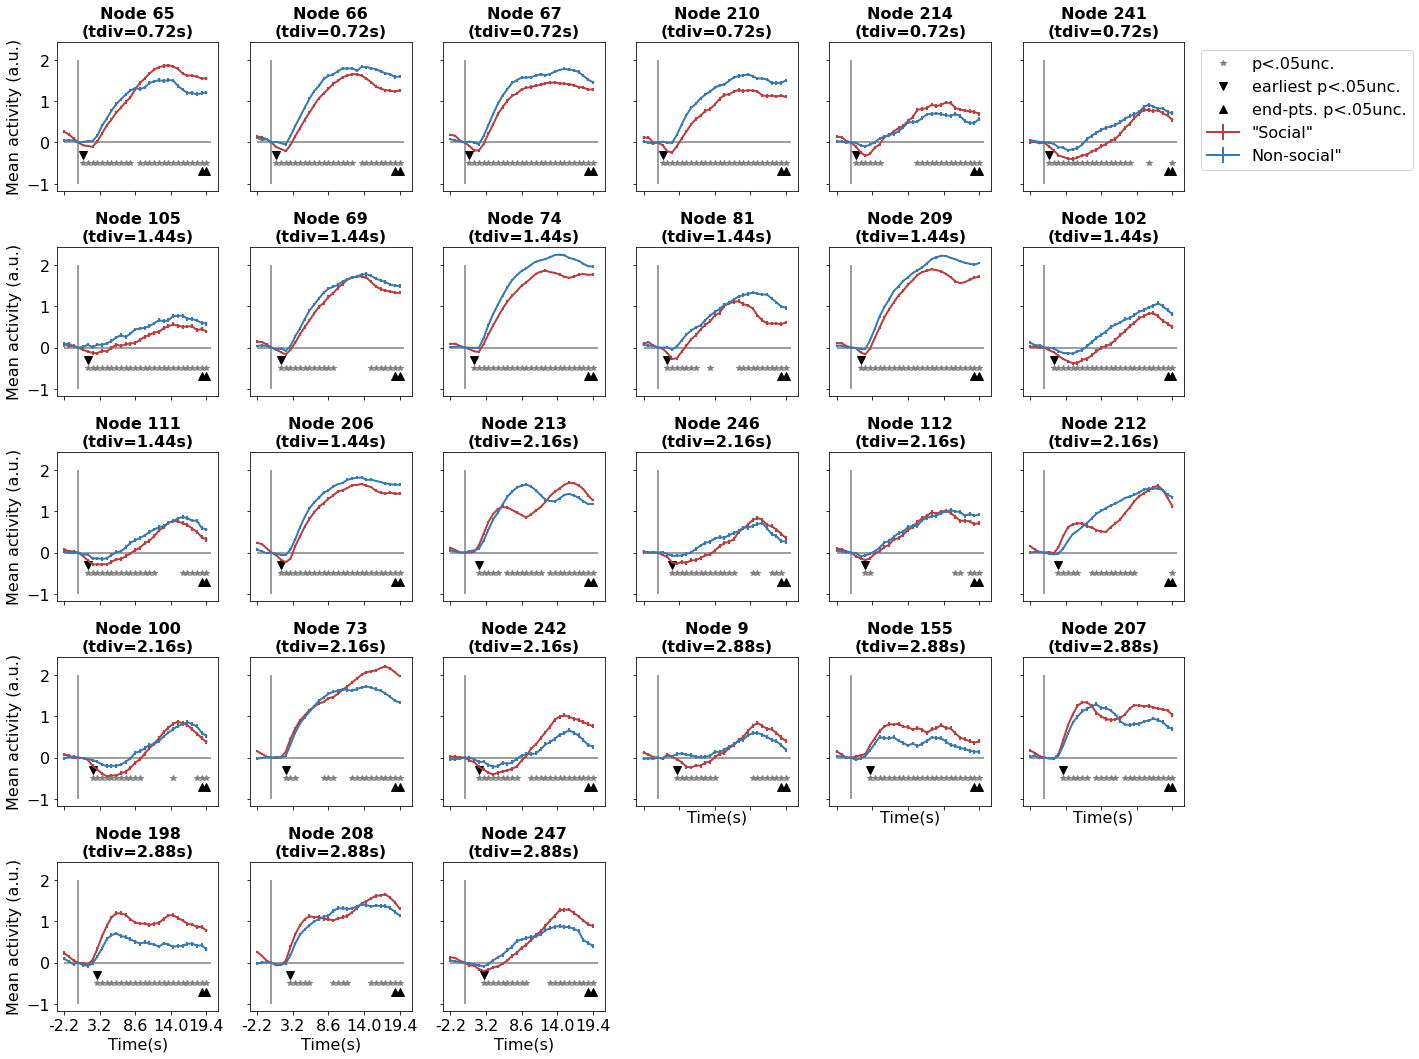

In [79]:
#  coax-bill
# plot timecourses with the earliest timept of divergence

ncols = 6
nrows= int(np.ceil(len(predec_nodes)/ncols))
#fig, axes = plt.subplots(67,4, figsize=(15,150))
xwidth = 20
yheight = 15# .75*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

x_ticks = np.linspace(0,30,5)  
ymin,ymax = -1,2
lbls = [str(np.round((i-tr0_ind)*TR,1)) for i in x_ticks]
movie_ind = 4
for i,n in enumerate(nodes_early_to_late):#enumerate(np.where(predec_nodes)[0]):
    movieTC_yes = tcs_trial_z[subs,n,:,myes] # nsubs * ntimepts
    movieTC_no  = tcs_trial_z[subs,n,:,mno] # nsubs * ntimepts
    r = int(np.floor(i/ncols))
    c = int(np.floor(i%ncols))
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
    ax[r,c].hlines(0,0,31,color='grey')
    sig = np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]
    ax[r,c].plot(sig,np.repeat(-.5,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    ax[r,c].plot(earliest_pt_coaxbill[n],-.3,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_coaxbill[n] == 1:
        ax[r,c].plot([29,30],[-.7,-.7],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    ax[r,c].set_title(f'Node {n+1}\n(tdiv={earliest_pt_coaxbill_corrected[n]*TR:.2f}s)',fontweight='bold')
    if i == 5:
        ax[r,c].legend(bbox_to_anchor=[1.05,1])

    #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
    ax[r,c].set_xticks(x_ticks)
    if i >20:
        ax[r,c].set_xticklabels(lbls)
        ax[r,c].set_xlabel('Time(s)')
    if c ==0:
        ax[r,c].set_ylabel('Mean activity (a.u.)')

for i in range(int(nrows*ncols-len(np.where(predec_nodes)[0]))):
    ax[r,c+1+i].axis('off')


plt.tight_layout()

plt.savefig(os.path.join(fig_save_loc,'coaxbill_timecourses_predecision.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#plt.savefig(os.path.join(data_file_loc,'figures','timecourses',moviename))
#plt.tight_layout()


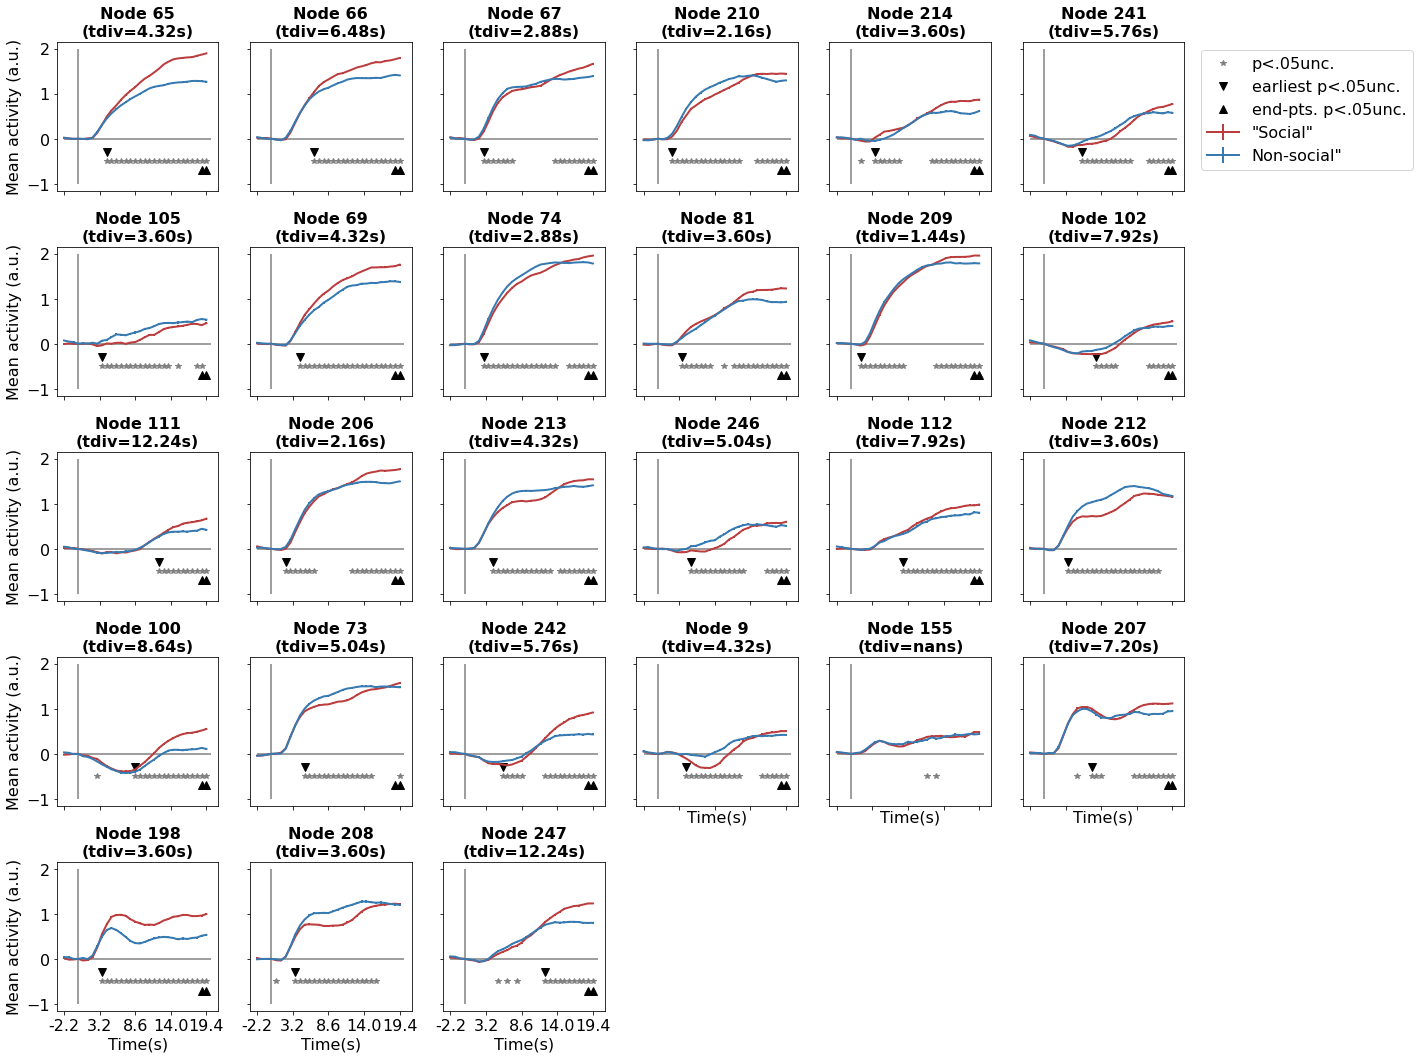

In [1691]:
#  all except coax-bill
# plot timecourses with the earliest timept of divergence

ncols = 6
nrows= int(np.ceil(len(predec_nodes)/ncols))
#fig, axes = plt.subplots(67,4, figsize=(15,150))
xwidth = 20
yheight = 15# .75*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

x_ticks = np.linspace(0,30,5)  
ymin,ymax = -1,2
lbls = [str(np.round((i-tr0_ind)*TR,1)) for i in x_ticks]
movie_ind = 4
for i,n in enumerate(nodes_early_to_late):#enumerate(np.where(predec_nodes)[0]):
    movieTC_yes = tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
    r = int(np.floor(i/ncols))
    c = int(np.floor(i%ncols))
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
    ax[r,c].hlines(0,0,31,color='grey')
    sig = np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]
    ax[r,c].plot(sig,np.repeat(-.5,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    ax[r,c].plot(earliest_pt_all_nocoaxbill[n],-.3,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_all_nocoaxbill[n] == 1:
        ax[r,c].plot([29,30],[-.7,-.7],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    ax[r,c].set_title(f'Node {n+1}\n(tdiv={earliest_pt_all_corrected_nocoaxbill[n]*TR:.2f}s)',fontweight='bold')
    if i == 5:#len(nodes_early_to_late)-1:
        ax[r,c].legend(bbox_to_anchor=[1.05,1])

    #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
    ax[r,c].set_xticks(x_ticks)
    if i >20:
        ax[r,c].set_xticklabels(lbls)
        ax[r,c].set_xlabel('Time(s)')
    if c ==0:
        ax[r,c].set_ylabel('Mean activity (a.u.)')
    

for i in range(int(nrows*ncols-len(np.where(predec_nodes)[0]))):
    ax[r,c+1+i].axis('off')

plt.tight_layout()

plt.savefig(os.path.join(fig_save_loc,'all_except_coaxbill_timecourses_predecision.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#plt.savefig(os.path.join(data_file_loc,'figures','timecourses',moviename))
#plt.tight_layout()


# Identify which subset of nodes to highlight

In [ ]:
nodes_early_to_late_list = []
for i in np.arange(1,5):
    inds  = np.where((nodes_coaxbill_rand_all) & (end_diff_coaxbill==1) & (earliest_pt_coaxbill_corrected==i))[0]
    nodes_early_to_late_list.append(inds)
    
nodes_early_to_late_list

# common nodes in the earliest 25% of nodes
# #- Idea to visualize nodes: plot timepts of the earliest x% of nodes across coax-bill and all else

quart = int(np.round(268/4))
quart

upper_bound = np.sort(earliest_pt_coaxbill_corrected)[quart]
print(upper_bound)
coaxbill_quart = np.where(earliest_pt_coaxbill_corrected<=upper_bound)[0]
coaxbill_quart

fig, axes = plt.subplots(figsize=(5,20), facecolor='grey', ncols=2, sharey=True)
fig.tight_layout()
nodes = np.where(nodes_coaxbill_rand_all & (end_diff_all_nocoaxbill==1) & (end_diff_coaxbill==1))[0]
index= np.arange(0,len(nodes))
order_ = np.argsort(earliest_pt_coaxbill_corrected+earliest_pt_all_corrected_nocoaxbill)
column0 = earliest_pt_coaxbill_corrected[order_][nodes]
column0[np.isnan(column0)] = 0
column1 = earliest_pt_all_corrected_nocoaxbill[order_][nodes]
column1[np.isnan(column1)] = 0
title0 = 'COAX-BILL'
title1 = 'All except\nCOAX-BILL'
axes[0].barh(index, column0, align='center', color='grey', zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color='k')
axes[1].barh(index, column1, align='center', color='grey', facecolor = 'k',zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color='k')
axes[0].set_ylim(-1,len(nodes))
axes[1].set_ylim(-1,len(nodes))
            
axes[0].invert_xaxis() # If you have positive numbers and want to invert the x-axis of the left plot 
plt.gca().invert_yaxis() # To show data from highest to lowest

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

intersection_nodes = list(set(coaxbill_quart) & set(all_nocoaxbill_quart)) # nodes showing up in the top 25% in both comparisons (can't directly 
# compare earliest timepts because of mean decision time difference)
intersection_nodes = np.sort(intersection_nodes)
intersection_nodes

In [ ]:
#  coax-bill
#  plot timecourses with the earliest timept of divergence

ncols = 6
nrows= int(np.ceil(len(intersection_nodes)/ncols))
#fig, axes = plt.subplots(67,4, figsize=(15,150))
xwidth = 20
yheight = 10# .75*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

x_ticks = np.linspace(0,30,5)  
ymin,ymax = -1,2
lbls = [str(np.round((i-tr0_ind)*TR,1)) for i in x_ticks]
movie_ind = 4
for i,n in enumerate(intersection_nodes):#enumerate(np.where(predec_nodes)[0]):
    movieTC_yes = tcs_trial_z[subs,n,:,myes] # nsubs * ntimepts
    movieTC_no  = tcs_trial_z[subs,n,:,mno] # nsubs * ntimepts
    r = int(np.floor(i/ncols))
    c = int(np.floor(i%ncols))
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
    ax[r,c].hlines(0,0,31,color='grey')
    sig = np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]
    ax[r,c].plot(sig,np.repeat(-.5,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    ax[r,c].plot(earliest_pt_coaxbill[n],-.3,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_coaxbill[n] == 1:
        ax[r,c].plot([29,30],[-.7,-.7],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    ax[r,c].set_title(f'Node {n+1}\n(tdiv={earliest_pt_coaxbill_corrected[n]*TR:.2f}s)',fontweight='bold')
    if i == 5:
        ax[r,c].legend(bbox_to_anchor=[1.05,1])

    #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
    ax[r,c].set_xticks(x_ticks)
    if i >20:
        ax[r,c].set_xticklabels(lbls)
        ax[r,c].set_xlabel('Time(s)')
    if c ==0:
        ax[r,c].set_ylabel('Mean activity (a.u.)')

for i in range(int(nrows*ncols-len(np.where(intersection_nodes)[0]))):
    ax[r,c+1+i].axis('off')
plt.tight_layout()
plt.savefig(os.path.join(fig_save_loc,'coaxbill_timecourses_predecision.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


In [ ]:
#  all except coax-bill
# plot timecourses with the earliest timept of divergence

ncols = 6
nrows= int(np.ceil(len(intersection_nodes)/ncols))
#fig, axes = plt.subplots(67,4, figsize=(15,150))
xwidth = 20
yheight = 10# .75*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

x_ticks = np.linspace(0,30,5)  
ymin,ymax = -1,2
lbls = [str(np.round((i-tr0_ind)*TR,1)) for i in x_ticks]
movie_ind = 4
for i,n in enumerate(intersection_nodes):#enumerate(np.where(predec_nodes)[0]):
    movieTC_yes = tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
    r = int(np.floor(i/ncols))
    c = int(np.floor(i%ncols))
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
    ax[r,c].hlines(0,0,31,color='grey')
    sig = np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]
    ax[r,c].plot(sig,np.repeat(-.5,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    ax[r,c].plot(earliest_pt_all_nocoaxbill[n],-.3,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_all_nocoaxbill[n] == 1:
        ax[r,c].plot([29,30],[-.7,-.7],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    ax[r,c].set_title(f'Node {n+1}\n(tdiv={earliest_pt_all_corrected_nocoaxbill[n]*TR:.2f}s)',fontweight='bold')
    if i == 5:#len(nodes_early_to_late)-1:
        ax[r,c].legend(bbox_to_anchor=[1.05,1])

    #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
    ax[r,c].set_xticks(x_ticks)
    if i >20:
        ax[r,c].set_xticklabels(lbls)
        ax[r,c].set_xlabel('Time(s)')
    if c ==0:
        ax[r,c].set_ylabel('Mean activity (a.u.)')
    

for i in range(int(nrows*ncols-len(np.where(intersection_nodes)[0]))):
    ax[r,c+1+i].axis('off')

plt.tight_layout()

plt.savefig(os.path.join(fig_save_loc,'all_except_coaxbill_timecourses_predecision.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


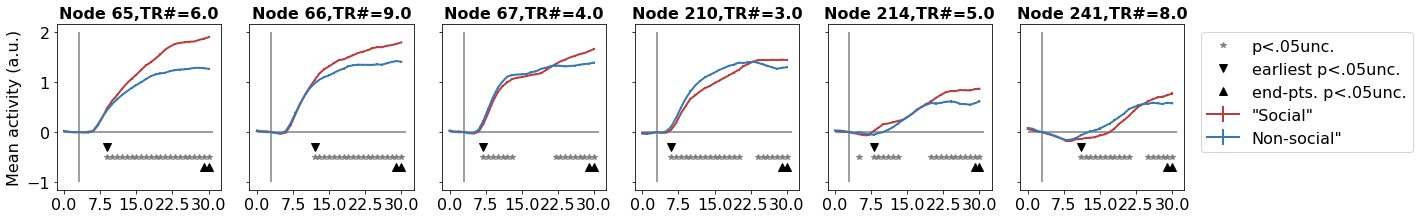

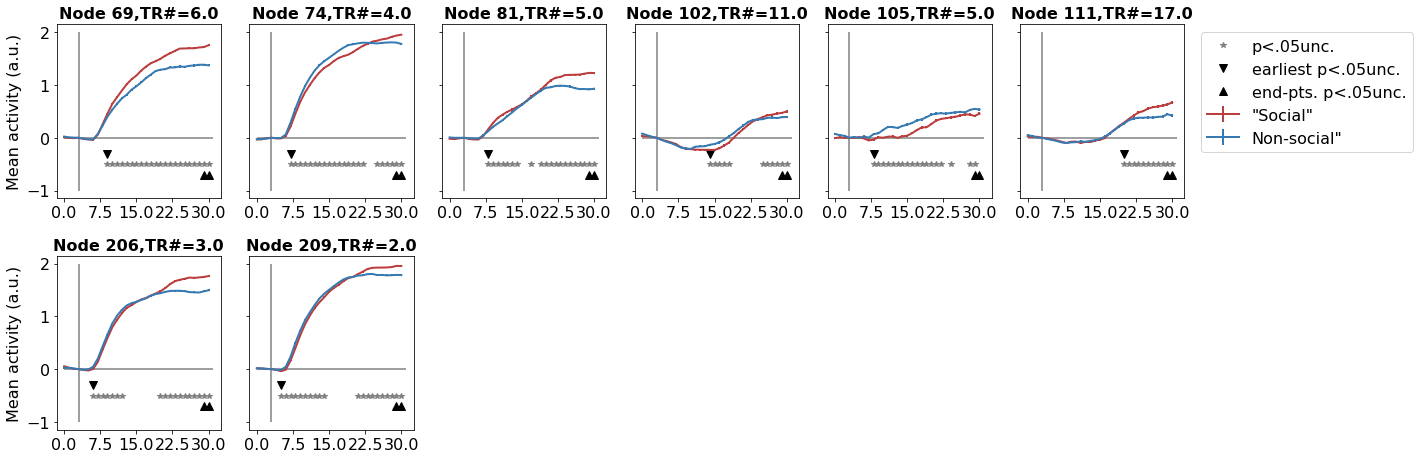

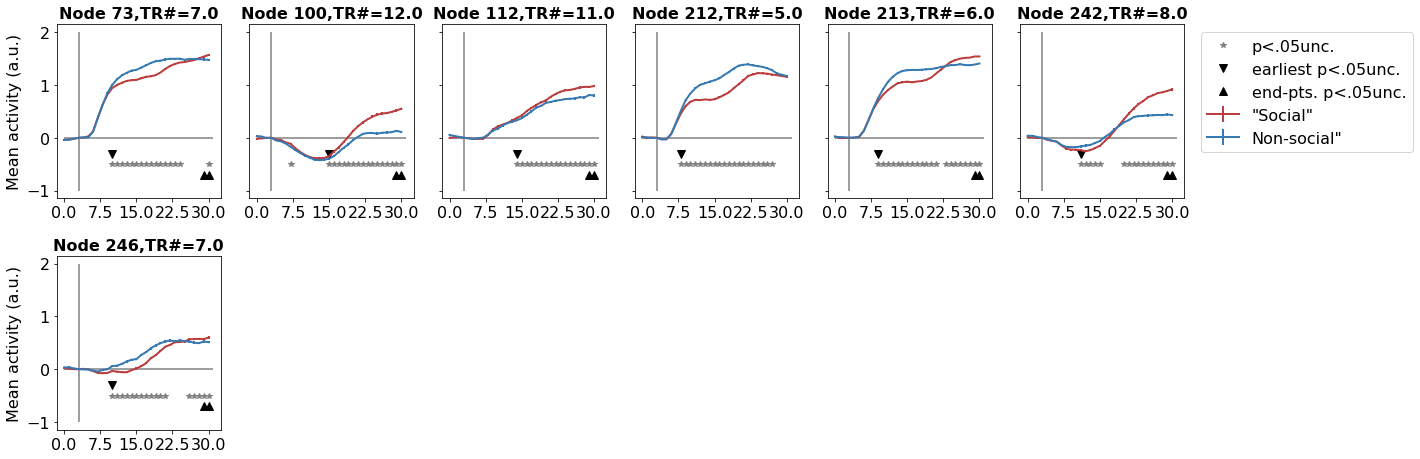

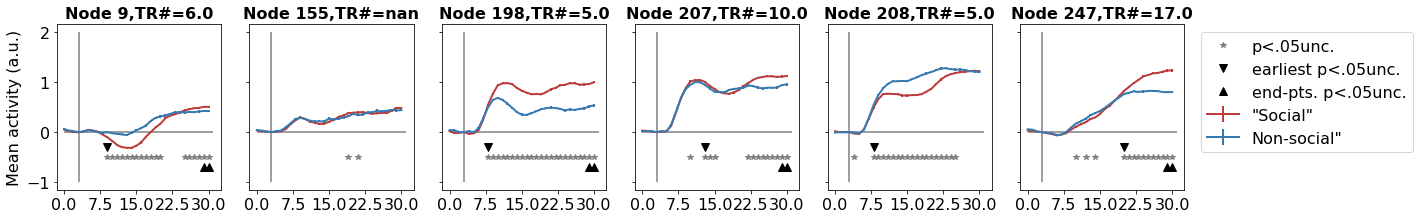

In [82]:
#  All others
# early to late, but separated

x_ticks = np.linspace(0,30,5)  
ymin,ymax = -1,2
lbls = [str(np.round((i-tr0_ind)*TR,1)) for i in x_ticks]

for i in np.arange(0,len(nodes_early_to_late_list)):
    nodes = nodes_early_to_late_list[i]
    
    ncols = 6
    nrows= int(np.ceil(len(nodes)/ncols))
    #fig, axes = plt.subplots(67,4, figsize=(15,150))
    xwidth = 20
    yheight = nrows*xwidth/6# .75*nrows*xwidth/ncols
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=True, figsize = (xwidth,yheight))
    fig.set_figwidth(xwidth)
    fig.set_figheight(yheight)

    for i,n in enumerate(nodes):#enumerate(np.where(predec_nodes)[0]):
        movieTC_yes = tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
        movieTC_no  = tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
        r = int(np.floor(i/ncols))
        c = int(np.floor(i%ncols))

        if nrows > 1: 
            ax1 = ax[r,c]
        else:
            ax1 = ax[c]
        ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
        ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
        ax1.vlines(tr0_ind,ymin,ymax,color='grey')
        ax1.hlines(0,0,31,color='grey')
        
        sig = np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]
        ax1.plot(sig,np.repeat(-.5,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
        ax1.plot(earliest_pt_all_nocoaxbill[n],-.3,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
        if end_diff_all_nocoaxbill[n] == 1:
            ax1.plot([29,30],[-.7,-.7],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

        ax1.set_title(f'Node {n+1},TR#={earliest_pt_all_corrected_nocoaxbill[n]}',fontweight='bold')
        if i == 5:
            ax1.legend(bbox_to_anchor=[1.05,1])

        #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
        ax1.set_xticks(x_ticks)
        if i >20:
            ax1.set_xticklabels(lbls)
            ax1.set_xlabel('Time(s)')
        if c ==0:
            ax1.set_ylabel('Mean activity (a.u.)')

    for i in range(int(nrows*ncols-len(np.where(nodes)[0]))):
        if nrows>1:
            ax[r,c+1+i].axis('off')
        else:
            ax[c+1+i].axis('off')


    plt.tight_layout()

#plt.savefig(os.path.join(fig_save_loc,'coaxbill_timecourses_predecision.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#plt.savefig(os.path.join(data_file_loc,'figures','timecourses',moviename))
#plt.tight_layout()


In [1372]:
for n in np.where(predec_nodes)[0]:
    print(eval(shen268_lbl[str(n+1)][0])['name'])

100.00% Frontal_Pole
51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_posterior_division; 12.90% Angular_Gyrus; 6.04% Superior_Temporal_Gyrus_posterior_division
35.14% Inferior_Temporal_Gyrus_temporooccipital_part; 29.73% Lateral_Occipital_Cortex_inferior_division; 27.48% Temporal_Occipital_Fusiform_Cortex; 7.66% Occipital_Fusiform_Gyrus
54.07% Occipital_Fusiform_Gyrus; 28.60% Lateral_Occipital_Cortex_inferior_division; 14.90% Temporal_Occipital_Fusiform_Cortex
48.69% Middle_Temporal_Gyrus_temporooccipital_part; 29.07% Lateral_Occipital_Cortex_inferior_division; 22.09% Inferior_Temporal_Gyrus_temporooccipital_part
76.60% Lateral_Occipital_Cortex_superior_division; 17.79% Occipital_Pole; 5.61% Lateral_Occipital_Cortex_inferior_division
95.78% Lateral_Occipital_Cortex_inferior_division
55.16% Occipital_Pole; 38.06% Lateral_Occipital_Cortex_inferior_division; 6.78% Occipital_Fusiform_Gyrus
100.00% no_label
55.82% no_label; 30.46% Lateral_Occipital_Cortex_infe

# Random mech

In [ ]:
def unpaired_ttest_across_time(tcs_run_z_node):
    # perform an unpaired t-test at each node and timept for a selected movie (rand here)
    meandiff_soc_nonsoc, pval_soc_nonsoc = [np.empty((31)) for _ in range(2)]
    meandiff_soc_nonsoc[:], pval_soc_nonsoc[:] = [np.nan]*2   
    movie_ind = 4

    for timept in np.arange(tr0_ind,tcs_run_z.shape[2]):
        
        y1 = tcs_run_z_node[responses[:,movie_ind]==1,timept,movie_ind]
        y2  = tcs_run_z_node[responses[:,movie_ind]==0,timept,movie_ind]
        
        try:
            _,pval_soc_nonsoc[timept] = stats.ttest_ind(y1,y2,nan_policy='omit',equal_var=False)
            meandiff_soc_nonsoc[timept] = np.nanmean(y1)-np.nanmean(y2)      
        except:
            pval_soc_nonsoc[timept] = np.nan
            meandiff_soc_nonsoc[timept] = np.nan
            
    return pval_soc_nonsoc,meandiff_soc_nonsoc

# Yes v No

if __name__ == '__main__':
    pool = Pool(processes=cpu_count()) # helps to parallelize processing

tcs_node_list = [tcs_run_z[:,n,:,:] for n in range(268)] # 15 secs per timept so that'll be 15*28 ~= 450s for all?
pval_meandiff_soc_nonsoc_rand = pool.map(unpaired_ttest_across_time,tcs_node_list) 
#coef_soc_nonsoc, pval_soc_nonsoc = model.coefs['P-val'][1]
np.save(os.path.join(data_file_loc,'coefs_pvals_alltimepts_RAND.npy'), pval_meandiff_soc_nonsoc_rand)

meanDiff_rand,meanDiff_rand_loosethr =  [np.empty((268,31)) for _ in range(2)]
meanDiff_rand[:],meanDiff_rand_loosethr[:] = [np.nan]*2
for n in range(268):
    pval_, meanDiff_ = pval_meandiff_soc_nonsoc_rand[n]
    meanDiff_rand[n,pval_<.05] = meanDiff_[pval_<.05]
    meanDiff_rand_loosethr[n,pval_<.1] = meanDiff_[pval_<.1]
plt.figure(1,figsize=(10,5))
plt.subplot(121)
sns.heatmap(meanDiff_rand)
plt.subplot(122)
sns.heatmap(meanDiff_rand_loosethr)


# get earliest pt of divergence RAND
# only timept criterion, not the end diff criterion

earliest_pt_rand,sign_earliest_pt_rand,earliest_pt_rand_loosethr,sign_earliest_pt_rand_loosethr = [np.empty((268,)) for i in range(4)]
earliest_pt_rand[:],sign_earliest_pt_rand[:],earliest_pt_rand_loosethr[:],sign_earliest_pt_rand_loosethr[:] = [np.nan]*4

movie_ind = 4

nodes = np.arange(0,268)# np.arange(10)           
for n in nodes:
    sig_timepts =  np.where(~np.isnan(meanDiff_rand[n,:]))[0]
    sig_timepts_loosethr =  np.where(~np.isnan(meanDiff_rand_loosethr[n,:]))[0]
    for t in sig_timepts:
        if t < 30:
            if (t+1) in sig_timepts: #(pval_auc<.05) and ( ( ((t-1) in sig_timepts) or ((t+1) in sig_timepts) ) and (np.sign(meandiff_auc) == np.sign(meanDiff_rand[n,t])):# and (t_array[0][i+1] - t_array[0][i] == 1):
                earliest_pt_rand[n]      = t #subtract by 3 in brainmaps!!
                sign_earliest_pt_rand[n] = np.sign(meanDiff_rand[n,t])
                break
    
    for t in sig_timepts_loosethr:
        if t < 30:
            if (t+1) in sig_timepts_loosethr: #(pval_auc<.05) and ( ( ((t-1) in sig_timepts) or ((t+1) in sig_timepts) ) and (np.sign(meandiff_auc) == np.sign(meanDiff_rand[n,t])):# and (t_array[0][i+1] - t_array[0][i] == 1):
                earliest_pt_rand_loosethr[n]      = t #subtract by 3 in brainmaps!!
                sign_earliest_pt_rand_loosethr[n] = np.sign(meanDiff_rand_loosethr[n,t])
                break


# end diff

end_diff_rand,sign_end_diff_rand = [np.empty((268,)) for _ in range(2)]
end_diff_rand[:],sign_end_diff_rand[:] = [np.nan]*2

movie_ind = 4
nodes = np.arange(0,268)# np.arange(10)
           
for n in nodes:
    sig_timepts =  np.where(~np.isnan(meanDiff_rand[n,:]))[0]

    if len(sig_timepts) > 2: # no pt doing this if there aren't at least 2 sig pts
        
        tcn1 = np.nanmean(tcs_run_z[responses[:,movie_ind]==1,n,-2:,movie_ind],axis=1)# subs * t:end (if it's the onset of a divergence, the auc later should be different between the groups)
        tcn2 = np.nanmean(tcs_run_z[responses[:,movie_ind]==0,n,-2:,movie_ind],axis=1)

        _,pval_end = stats.ttest_ind(tcn1,tcn2,nan_policy='omit',equal_var=False)
        meandiff_end = np.nanmean(tcn1)-np.nanmean(tcn2) 
        
        if pval_end < .05:
            end_diff_rand[n],sign_end_diff_rand[n] = 1,np.sign(meandiff_end)


#  RAND
# plot timecourses with all timepts of divergences

ncols = 6
nrows= int(np.ceil(268/ncols))
#fig, axes = plt.subplots(67,4, figsize=(15,150))
xwidth = 20
yheight = 100# .75*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

x_ticks = np.round(np.linspace(0,30,4),2)  
ymin,ymax = -.5,2
lbls = [str(i-tr0_ind) for i in x_ticks]
movie_ind = 4
for n in range(268):
    movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
    movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
    r = int(np.floor(n/ncols))
    c = int(np.floor(n%ncols))
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
    ax[r,c].hlines(0,0,31,color='grey')
    sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]
    ax[r,c].plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    ax[r,c].plot(earliest_pt_rand[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")

    sig = np.where(~np.isnan(meanDiff_rand_loosethr[n,:]))[0]
    ax[r,c].plot(sig,np.repeat(1,len(sig)),color = 'grey',ls = 'None',marker = 'o',label ="p<.05unc.")
    ax[r,c].plot(earliest_pt_rand_loosethr[n],1.2,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")

    if end_diff_rand[n] == 1:
        ax[r,c].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    ax[r,c].set_title(f'Node {n+1}')
    if n == 5:
        ax[r,c].legend(bbox_to_anchor=[1.05,1])

    #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
    ax[r,c].set_xticks(x_ticks)
    ax[r,c].set_xticklabels(lbls)

ax[r,c+1].axis('off')
ax[r,c+2].axis('off')

plt.tight_layout()

plt.savefig(os.path.join(fig_save_loc,'rand_timecourses.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#plt.savefig(os.path.join(data_file_loc,'figures','timecourses',moviename))
#plt.tight_layout()


In [ ]:

earliest_pt_rand_corrected = earliest_pt_rand - tr0_ind
earliest_pt_rand_corrected_loosethr =  earliest_pt_rand_loosethr - tr0_ind


## comparisons with RAND MECH

In [738]:
common_nodes = earliest_pt_all_corrected == earliest_pt_rand_corrected
print(len(np.where(common_nodes)[0]), ' nodes.')
for n in np.where(common_nodes)[0]:
    print(n, '. Divergence timept:',earliest_pt_all_corrected[n])
    rois = [eval(shen268_lbl[str(n+1)][0])['name']]# for n in np.where(common_nodes)[0]]
    print(n+1,rois)

# it's fine even if there's not many nodes here - could just be that rand has later changes

2  nodes.
86 . Divergence timept: 4.0
87 ['49.82% Right_Lateral_Ventricle; 19.78% Precuneous_Cortex; 17.22% Lingual_Gyrus; 11.72% Intracalcarine_Cortex']
150 . Divergence timept: 4.0
151 ['51.03% Frontal_Orbital_Cortex; 25.77% Inferior_Frontal_Gyrus_pars_triangularis; 11.73% Frontal_Pole; 8.38% Frontal_Operculum_Cortex']


In [756]:
stats.sem(movieTC_yes,axis=0,nan_policy='omit')

array([0.01446187, 0.01306039, 0.01065601, 0.        , 0.01053579,
       0.01301798, 0.01424154, 0.01498743, 0.01576513, 0.01631531,
       0.01711299, 0.01760313, 0.01815608, 0.01789508, 0.01854698,
       0.01836369, 0.01825256, 0.01865612, 0.01899315, 0.0190493 ,
       0.01932647, 0.01948347, 0.01956837, 0.01962533, 0.01949776,
       0.01949154, 0.01966739, 0.01974849, 0.01941669, 0.01942107,
       0.01949577])

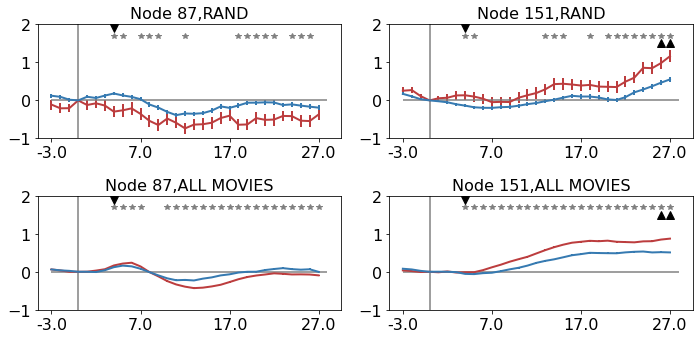

In [762]:
plt.figure(1,figsize=(10,5))
for i,n in enumerate(np.where(common_nodes)[0]):
    plt.subplot(2,2,i+1)
    movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
    movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
    sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    
    
    plt.ylim(-1,2)
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.title(f'Node {n+1},RAND')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    plt.xticks(x_ticks,lbls)

    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_rand[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    plt.subplot(2,2,2+i+1)
    
    movieTC_yes = tcs_run_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no[:,n,:] # nsubs * ntimepts
    plt.ylim(-1,2)
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]    
    
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    
    plt.title(f'Node {n+1},ALL MOVIES')
    plt.xticks(x_ticks,lbls)
    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_all[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range


plt.tight_layout()

In [765]:
odd_nodes = np.where(earliest_pt_rand_corrected -earliest_pt_all_corrected >=10)[0]
len(odd_nodes)

83

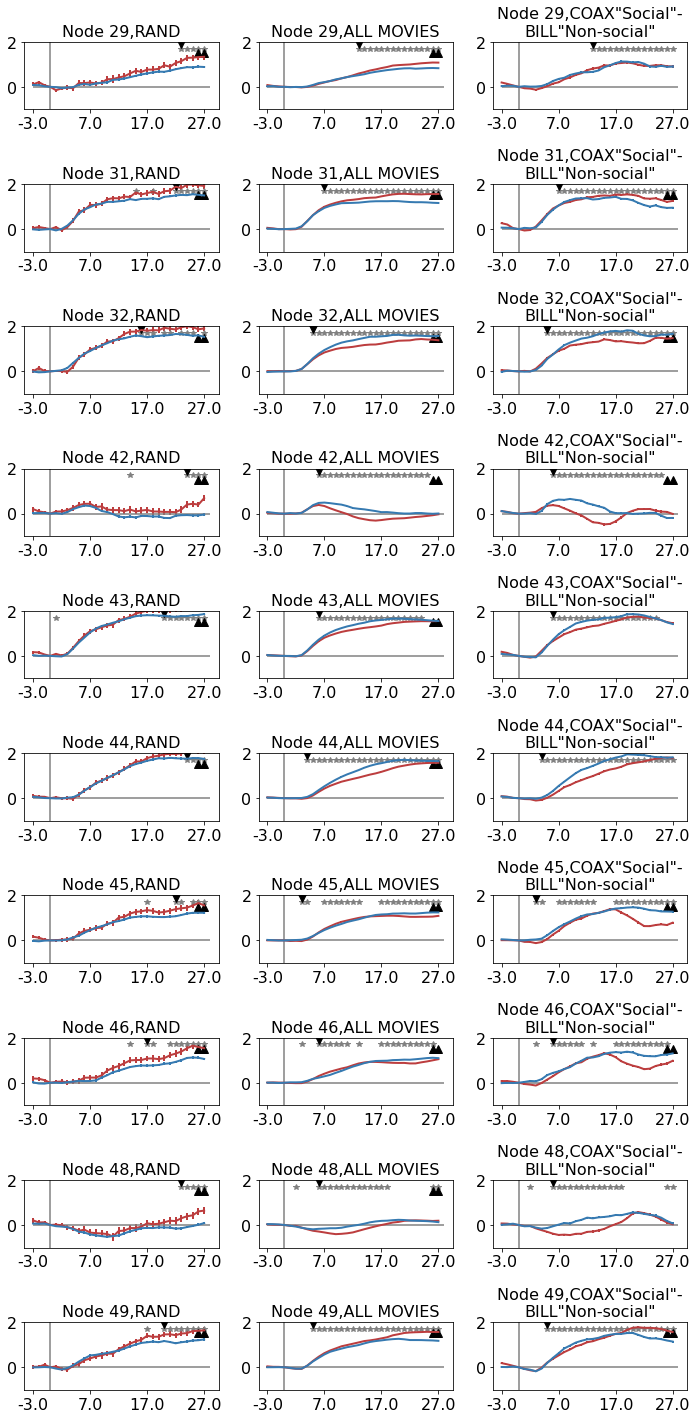

In [922]:
plt.figure(1,figsize=(10,20))
for i,n in enumerate(odd_nodes[10:20]):
    plt.subplot(10,3,i*3+1)
    movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
    movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
    sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    
    
    plt.ylim(-1,2)
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.title(f'Node {n+1},RAND')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    plt.xticks(x_ticks,lbls)

    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_rand[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    plt.subplot(10,3,i*3+2)
    
    movieTC_yes = tcs_run_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no[:,n,:] # nsubs * ntimepts
    plt.ylim(-1,2)
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]    
    
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    
    plt.title(f'Node {n+1},ALL MOVIES')
    plt.xticks(x_ticks,lbls)
    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_all[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    
    plt.subplot(10,3,i*3+3)
    
    movieTC_yes = tcs_trial_z[subs,n,:,0] # nsubs * ntimepts
    movieTC_no  = tcs_trial_z[subs,n,:,1] # nsubs * ntimepts
    plt.ylim(-1,2)
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]    
    
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    
    plt.title(f'Node {n+1},COAX"Social"-\nBILL"Non-social"')
    plt.xticks(x_ticks,lbls)
    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_all[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_coaxbill[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range


plt.tight_layout()

In [ ]:
plt.figure(1,figsize=(10,5))
for i,n in enumerate(np.where(odd_nodes)[0]):
    plt.subplot(2,2,i+1)
    movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
    movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
    sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    
    
    plt.ylim(-1,2)
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.title(f'Node {n+1},RAND')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    plt.xticks(x_ticks,lbls)

    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_rand[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    plt.subplot(2,2,2+i+1)
    
    movieTC_yes = tcs_run_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no[:,n,:] # nsubs * ntimepts
    plt.ylim(-1,2)
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]    
    
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    
    plt.title(f'Node {n+1},ALL MOVIES')
    plt.xticks(x_ticks,lbls)
    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_all[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range


plt.tight_layout()

In [728]:
print('All movies:',len(np.where(~np.isnan(earliest_pt_all_corrected))[0]))
print('RANDOM MECH:',len(np.where(~np.isnan(earliest_pt_rand_corrected))[0]))

print('All movies:',len(np.where(~np.isnan(earliest_pt_all_corrected[end_diff_all==1]))[0]))
print('RANDOM MECH:',len(np.where(~np.isnan(earliest_pt_rand_corrected[end_diff_rand==1]))[0]))

All movies: 249
RANDOM MECH: 139
All movies: 203
RANDOM MECH: 117


Text(0.5, 0, 'TR #')

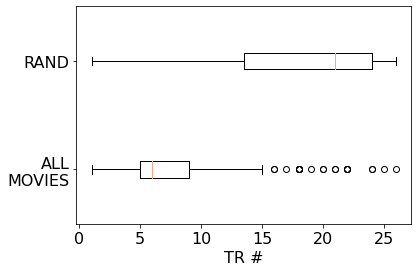

In [655]:
plt.boxplot(earliest_pt_all_corrected[~np.isnan(earliest_pt_all_corrected)],positions=[1],vert=False)
plt.boxplot(earliest_pt_rand_corrected[~np.isnan(earliest_pt_rand_corrected)],positions=[2],vert=False)
plt.yticks(np.arange(1,3),['ALL\nMOVIES','RAND'])
plt.xlabel('TR #')

Text(0, 0.5, 'TR # RAND - ALL')

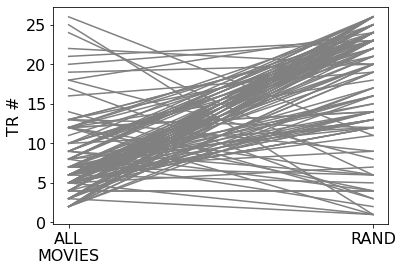

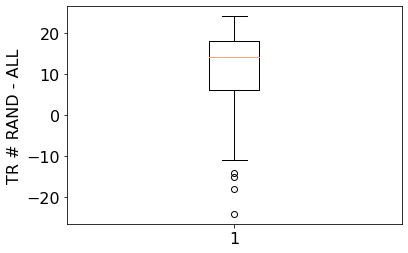

In [693]:
both = np.array([earliest_pt_all_corrected,earliest_pt_rand_corrected])
plt.figure(1)
plt.plot(range(2),both,color = 'grey')
plt.xticks(range(2),['ALL\nMOVIES','RAND'])
plt.ylabel('TR #')

plt.figure(2)
diff_both = both[1,:] - both[0,:]
plt.boxplot(diff_both[~np.isnan(diff_both)])
plt.ylabel('TR # RAND - ALL')

In [731]:
print('ALL MOVIES:',len(np.where((nodes_coaxbill_rand_all) & (end_diff_all==1))[0]))
print('RAND:',len(np.where((nodes_coaxbill_rand_all) & (end_diff_rand==1))[0]))

ALL MOVIES: 66
RAND: 53


### Node timecourses which show a significance byt aren't different in the end (which are the nodes we lose with the end criterion?)

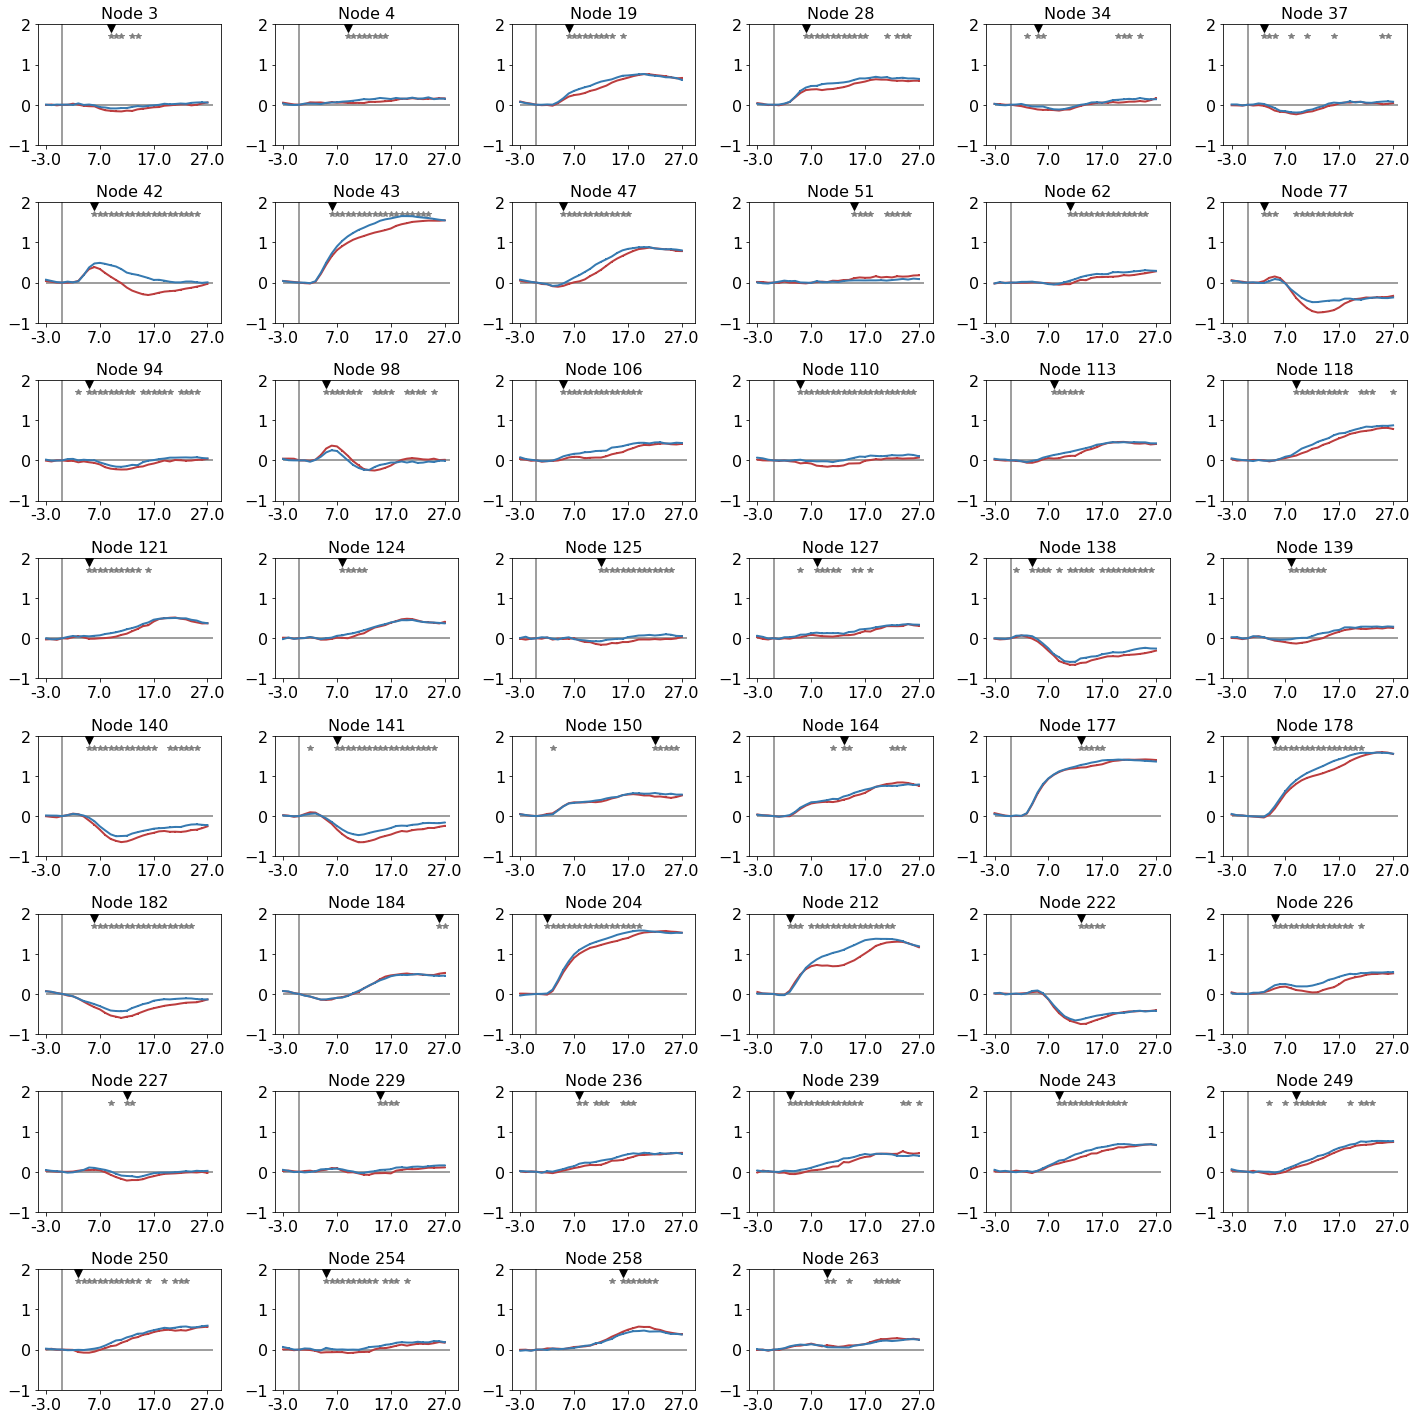

In [923]:
nodes = np.where(~np.isnan(earliest_pt_all_corrected) & (end_diff_all!=1))[0] 
len(nodes)

# plot all movie nodes that are los because of no difference in the end
plt.figure(1,figsize=(20,20))

for i,n in enumerate(nodes):
    plt.subplot(8,6,i+1)
    movieTC_yes = tcs_run_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no[:,n,:] # nsubs * ntimepts
    plt.ylim(-1,2)
    
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]    
    
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    
    plt.title(f'Node {n+1}')#,ALL MOVIES')
    plt.xticks(x_ticks,lbls)
    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_all[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_all[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
    
plt.tight_layout()


# START HERE NEXT!! DO ALL MOVIES ANALYSES AFTER EXCLUDING COAX/BILL!!

## RAND

'txt = \' Earliest\n divergence\n (TR #,\n p<.05 unc.,\n end sig.)\'\nplt.figure(2,figsize = (10,3))\nnodes = np.zeros((268,))\nnodes[(nodes_coaxbill_rand_all) & (end_diff_rand==1)] = earliest_pt_rand_corrected[(nodes_coaxbill_rand_all) & (end_diff_rand==1)]\nimg = roi_to_brain(pd.Series(nodes), mask_x)\n#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,\n#                display_mode=\'lyrz\', plot_abs=False, black_bg=False,cmap = \'RdBu_r\',colorbar = True)\nax_plot = plot_stat_map(img.to_nifti(), display_mode=\'z\', cut_coords=coords, vmax = vmax,cmap = \'viridis\',colorbar=True,annotate=True)\nax_plot._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {\'verticalalignment\':\'top\',\'rotation\':0})#get_legend()\nax_plot.title("Fig 3 nodes",fontsize=24,bgcolor=\'k\',color=\'w\',fontweight=\'bold\')\n#ax_plot.title(\'S>Uns,p<.05corr.\',fontsize=24,bgcolor=\'k\',color=\'w\',fontweight=\'bold\')\n#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor=\'k\',color=\'w\',fontweight=\'bol

<Figure size 720x216 with 0 Axes>

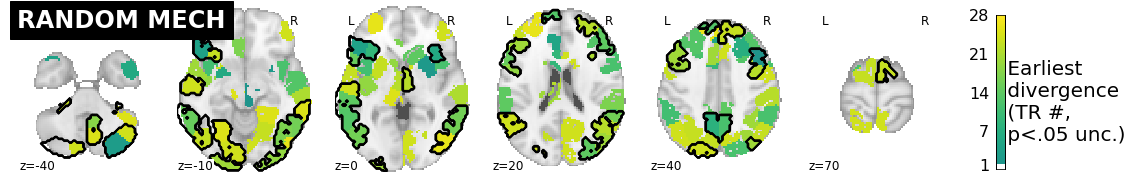

In [949]:
#plot earliest divergence point unsigned

'''txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.)'
vmin,vmax = np.nanmin(earliest_pt_rand_corrected),np.nanmax(earliest_pt_rand_corrected)

fig=plt.figure(1,figsize=((10,3)))
img = roi_to_brain(pd.Series(earliest_pt_rand_corrected), mask_x)

ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, threshold = vmin, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
plt.savefig(os.path.join(fig_save_loc,'rand/earliestpt_unsigned_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')'''
#
vmax=28
txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.)'
#txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.,\n end sig.)'
fig=plt.figure(1,figsize=((10,3)))
nodes = np.zeros((268,))
nodes[end_diff_rand==1] = earliest_pt_rand_corrected[end_diff_rand==1]
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
ax_plot.add_contours(color_rois((nodes_coaxbill_rand_all) & (end_diff_rand==1)),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.set_ylim(1,vmax)
ax_plot._cbar.set_ticks([np.round(i,2) for i in [1,7,14,21,28]])
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
plt.savefig(os.path.join(fig_save_loc,'rand/earliestpt_unsigned_endsig_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

'''txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.,\n end sig.)'
plt.figure(2,figsize = (10,3))
nodes = np.zeros((268,))
nodes[(nodes_coaxbill_rand_all) & (end_diff_rand==1)] = earliest_pt_rand_corrected[(nodes_coaxbill_rand_all) & (end_diff_rand==1)]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.title("Fig 3 nodes",fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title('S>Uns,p<.05corr.',fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'rand/earliestpt_unsigned_endsig_axial_fig3nodes.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')'''

- for random mech, the timecourse divergence isn't too reliable - do better to not plot the RANDOM MECH figure

 
-0.3708 x + 21.16
 
-0.3109 x + 20.59


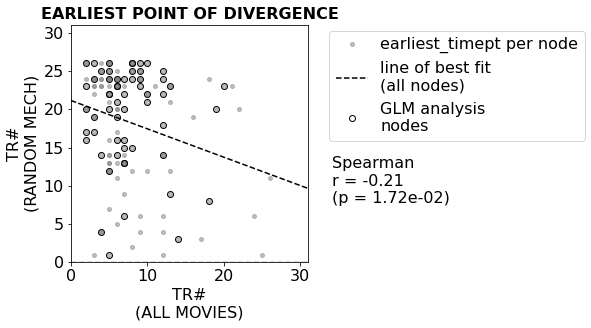

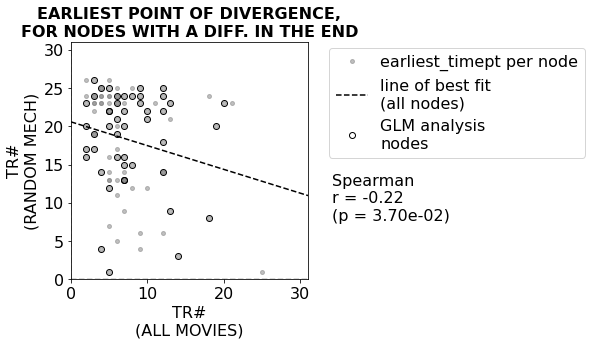

In [1019]:
# ALL MOVIES vs. RANDOM MECH (don't need this since rand mech values are misleading)
# scatterplot
dims = [15,9.6]
fig= plt.figure(1,figsize = dims)

xymin,xymax = 0,31
#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
ax = fig.add_subplot(221)
X,Y = earliest_pt_all_corrected,earliest_pt_rand_corrected#_loosethr
plot_fig(X,Y,'TR#\n(ALL MOVIES)','TR#\n(RANDOM MECH)',xymin,xymax)
ax.set_aspect('equal')
#signodes
plt.plot(X[nodes_coaxbill_rand_all],Y[nodes_coaxbill_rand_all],mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'GLM analysis\nnodes')
#plot_sig_nodes(X,Y,common_nodes_soc_uns_nonsoc)
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None')
plt.title('EARLIEST POINT OF DIVERGENCE',fontweight='bold')
plt.legend(bbox_to_anchor = (2.2,1.01),fontsize =16)
plt.xlim(xymin,xymax)
plt.ylim(xymin,xymax)
#plt.xticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
#plt.yticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
plt.savefig(os.path.join(fig_save_loc,'earliestpt_scatterplots.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

# scatterplot
dims = [15,9.6]
fig= plt.figure(2,figsize = dims)

xymin,xymax = 0,31
#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
ax = fig.add_subplot(221)
X,Y = earliest_pt_all_corrected[((end_diff_all==1)&(end_diff_rand==1))],earliest_pt_rand_corrected[((end_diff_all==1)&(end_diff_rand==1))]
plot_fig(X,Y,'TR#\n(ALL MOVIES)','TR#\n(RANDOM MECH)',xymin,xymax)
plt.plot(earliest_pt_all_corrected[((end_diff_all==1)&(end_diff_rand==1))&(nodes_coaxbill_rand_all)],earliest_pt_rand_corrected[(end_diff_all==1)&(end_diff_rand==1) & (nodes_coaxbill_rand_all)],\
    mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'GLM analysis\nnodes')

ax.set_aspect('equal')
#signodes
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'pairwise sig.')
#plot_sig_nodes(X,Y,common_nodes_soc_uns_nonsoc)
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None')
plt.title('EARLIEST POINT OF DIVERGENCE,\nFOR NODES WITH A DIFF. IN THE END',fontweight='bold')
plt.legend(bbox_to_anchor = (2.2,1.01),fontsize =16)
plt.xlim(xymin,xymax)
plt.ylim(xymin,xymax)
#plt.xticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
#plt.yticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
plt.savefig(os.path.join(fig_save_loc,'earliestpt_scatterplots_enddiff.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')




In [ ]:
# highlighting pre0decision nodes
plt.figure(3,figsize = (10,3))
nodes = np.zeros((268,))
nodes[(nodes_coaxbill_rand_all) & (end_diff_coaxbill==1)] = earliest_pt_coaxbill_corrected[(nodes_coaxbill_rand_all) & (end_diff_coaxbill==1)]

img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.add_contours(color_rois((nodes<5) & (nodes>0)),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.title("COAX-BILL (Fig 3 nodes)",fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title('S>Uns,p<.05corr.',fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'coaxbill/earliestpt_unsigned_endsig_axial_fig3nodes_earliest.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')

In [ ]:
#  coax-bill
# plot timecourses with all timepts of divergences

ncols = 6
nrows= int(np.ceil(74/ncols))
#fig, axes = plt.subplots(67,4, figsize=(15,150))
xwidth = 20
yheight = 30# .75*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

x_ticks = np.round(np.linspace(0,30,4),2)  
ymin,ymax = -.5,2
lbls = [str(i-tr0_ind) for i in x_ticks]
movie_ind = 4
nodes = np.where(nodes_coaxbill_rand_all)[0]
#plt.suptitle('COAX-BILL, NODES SIGNIFICANT IN THE SLOPE REGRESSOR ANALYSIS (FIG 3)')
for i,n in enumerate(nodes):
    movieTC_yes = tcs_trial_z[subs,n,:,myes] # nsubs * ntimepts
    movieTC_no  = tcs_trial_z[subs,n,:,mno] # nsubs * ntimepts
    r = int(np.floor(i/ncols))
    c = int(np.floor(i%ncols))
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
    ax[r,c].hlines(0,0,31,color='grey')
    sig = np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]
    ax[r,c].plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    ax[r,c].plot(earliest_pt_coaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_coaxbill[n] == 1:
        ax[r,c].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    ax[r,c].set_title(f'Node {n+1}')
    if n == 5:
        ax[r,c].legend(bbox_to_anchor=[1.05,1])

    #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
    ax[r,c].set_xticks(x_ticks)
    ax[r,c].set_xticklabels(lbls)

for i in range(4):
    ax[r,c+i+1].axis('off')

plt.tight_layout()

plt.savefig(os.path.join(fig_save_loc,'coaxbill_timecourses_common_nodes.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#plt.savefig(os.path.join(data_file_loc,'figures','timecourses',moviename))
#plt.tight_layout()


### Plot earliest point on a brainmap

# extra code

In [ ]:
# ways to export a table with ROI labels

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
#from tabulate import tabulate

MNIy = [eval(shen268_lbl[str(n+1)][0])['coords'][1] for n in left_nodes_ind]
MNI  = [eval(shen268_lbl[str(n+1)][0])['coords'] for n in left_nodes_ind]
MNI = [[np.round(i) for i in mni] for mni in MNI]

ROIname = [eval(shen268_lbl[str(n+1)][0])['name'] for n in left_nodes_ind]
df_left_hem_export= pd.DataFrame({'Shen atlas node\n(1-268)':left_nodes_ind, 'MNI\n(x,y,z)': MNI, 'Divergence\n(sec)': [np.round(i,2) for i in earliest_pt_coaxbill_corrected[left_nodes_ind] * TR], 'Regions':ROIname, 'MNIy':MNIy})
df_left_hem_export['Shen atlas node\n(1-268)'] = [i+1 for i in df_left_hem_export['Shen atlas node\n(1-268)']]
df_left_hem_export = df_left_hem_export.sort_values(by=['Divergence\n(sec)', 'MNIy'])
#df_left_hem_export = df_left_hem_export.reset_index()
#df_left_hem_export = df_left_hem_export.style.set_properties(**{'text-align': 'left'})
#print(df_left_hem_export.shape)
df_left_hem_export.set_index('Shen atlas node\n(1-268)',inplace=True)
df_left_hem_export.iloc[:,:-1].to_excel(os.path.join(fig_save_loc,'ROIs_left.xls'))

'''def save_df_as_image(df, path):
    source = ColumnDataSource(df)
    df_columns = [df.index.name]
    df_columns.extend(df.columns.values)
    columns_for_table=[]
    for column in df_columns:
        columns_for_table.append(TableColumn(field=column, title=column))

    data_table = DataTable(source=source, columns=columns_for_table,height_policy="fit",width_policy="fixed", autosize_mode = 'fit_columns',width=1500)#,index_position=None)
    export_png(data_table, filename = path)

df = df_left_hem_export.iloc[:,2:-1]
df = df.set_index('MNI\n(x,y,z)')
save_df_as_image(df, os.path.join(fig_save_loc,'left_hem_table1.png'))'''



MNIy = [eval(shen268_lbl[str(n+1)][0])['coords'][1] for n in right_nodes_ind]
MNI  = [eval(shen268_lbl[str(n+1)][0])['coords'] for n in right_nodes_ind]
MNI = [[np.round(i) for i in mni] for mni in MNI]

ROIname = [eval(shen268_lbl[str(n+1)][0])['name'] for n in right_nodes_ind]
df_right_hem_export= pd.DataFrame({'Shen atlas node\n(1-268)':right_nodes_ind, 'MNI\n(x,y,z)': MNI, 'Divergence\n(sec)': [np.round(i,2) for i in earliest_pt_coaxbill_corrected[right_nodes_ind] * TR], 'Regions':ROIname, 'MNIy':MNIy})
df_right_hem_export['Shen atlas node\n(1-268)'] = [i+1 for i in df_right_hem_export['Shen atlas node\n(1-268)']]
df_right_hem_export = df_right_hem_export.sort_values(by=['Divergence\n(sec)', 'MNIy'])
#df_right_hem_export = df_right_hem_export.reset_index()
df_right_hem_export.set_index('Shen atlas node\n(1-268)',inplace=True)
df_right_hem_export.iloc[:,:-1].to_excel(os.path.join(fig_save_loc,'ROIs_right.xls'))

#df_left_hem_export = df_left_hem_export.style.set_properties(**{'text-align': 'left'})
#print(df_left_hem_export.shape)
df_right_hem_export

'''df = df_right_hem_export.iloc[:,2:-1]
df = df.set_index('MNI\n(x,y,z)')
save_df_as_image(df, os.path.join(fig_save_loc,'right_hem_table1.png'))'''


'''print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print(tabulate(df_left_hem_export.iloc[:,1:-1],  showindex=False))
'''

'''import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import numpy as np

ddates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))

df.index = [item.strftime('%Y-%m-%d') for item in df.index] # Format date

fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, df, loc='upper right', colWidths=[0.17]*len(df.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) # change size table
plt.savefig('table.png', transparent=True)'''
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn

def save_df_as_image(df, path):
    source = ColumnDataSource(df)
    df_columns = [df.index.name]
    df_columns.extend(df.columns.values)
    columns_for_table=[]
    for column in df_columns:
        columns_for_table.append(TableColumn(field=column, title=column))

    data_table = DataTable(source=source, columns=columns_for_table,height_policy="fit",width_policy="fixed", autosize_mode = 'fit_columns',width=1800)#,index_position=None)
    export_png(data_table, filename = path)

df = df_left_hem_export.iloc[:,2:-1]
df = df.set_index('MNI coord')
save_df_as_image(df, os.path.join(fig_save_loc,'test.png'))

In [ ]:
# SIGNED (TO BE UPDATED!)

## ALL MOVIES

#plot earliest divergence point signed

#nodes = np.zeros((268,))
#nodes[nodes_rand_SUNS_UNSNS_unc] = meanDiff_sl_rand_S_UNS[nodes_rand_SUNS_UNSNS_unc]
#img = roi_to_brain(pd.Series(nodes), mask_x)
#img = roi_to_brain(pd.Series(meanDiff_sl_rand_S_UNS), mask_x)
txt = ' Earliest divergence\n (TR #)\n '
txt1 = ' "Social">"Non-social" '
txt2 = ' "Social"<"Non-social" '

vmin,vmax = np.nanmin(earliest_pt_all_corrected),np.nanmax(earliest_pt_all_corrected)
fig=plt.figure(1,figsize=((10,3)))
img = roi_to_brain(pd.Series(earliest_pt_all_corrected * sign_earliest_pt_all), mask_x)

'''glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = cmap,colorbar = True,vmin=vmin,vmax=vmax)
glassb.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
glassb._colorbar_ax.text(0.9,-26,txt2,fontsize=20,fontdict = {'verticalalignment':'bottom','rotation':0})#get_legend()
glassb._colorbar_ax.text(0.9,26,txt1,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')'''


img = roi_to_brain(pd.Series(earliest_pt_all_corrected * sign_earliest_pt_all), mask_x)
fig=plt.figure(2,figsize=((10,3)))
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.text(0.9,0,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,-26,txt2,fontsize=20,fontdict = {'verticalalignment':'bottom','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,26,txt1,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()

plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_signed.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

plt.figure(3,figsize = (8,3))
nodes = np.zeros((268,))
nodes[nodes_coaxbill_rand_all] = earliest_pt_all_corrected[nodes_coaxbill_rand_all] * sign_earliest_pt_all[nodes_coaxbill_rand_all]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot._colorbar_ax.text(0.9,0,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,-26,txt2,fontsize=20,fontdict = {'verticalalignment':'bottom','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,26,txt1,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()

#ax_plot.title('S>Uns,p<.05corr.',fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_signed_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')



# ALL MOVIES


#plot earliest divergence point signed


txt = ' Earliest divergence\n (TR #)\n '
txt1 = ' "Social">"Non-social" '
txt2 = ' "Social"<"Non-social" '

vmin,vmax = np.nanmin(earliest_pt_rand_corrected),np.nanmax(earliest_pt_rand_corrected)
fig=plt.figure(1,figsize=((10,3)))
img = roi_to_brain(pd.Series(earliest_pt_rand_corrected*sign_earliest_pt_rand), mask_x)
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = cmap,colorbar = True,vmin=vmin,vmax=vmax)
glassb.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
glassb._colorbar_ax.text(0.9,-26,txt2,fontsize=20,fontdict = {'verticalalignment':'bottom','rotation':0})#get_legend()
glassb._colorbar_ax.text(0.9,26,txt1,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
#plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

fig=plt.figure(2,figsize=((10,3)))
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = cmap,colorbar=True,annotate=True)
ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.text(0.9,0,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,-26,txt2,fontsize=20,fontdict = {'verticalalignment':'bottom','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,26,txt1,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
plt.savefig(os.path.join(fig_save_loc,'rand/earliestpt_signed.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


plt.figure(3,figsize = (10,3))
nodes = np.zeros((268,))
nodes[nodes_coaxbill_rand_all] = earliest_pt_rand_corrected[nodes_coaxbill_rand_all] * sign_earliest_pt_rand[nodes_coaxbill_rand_all]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = cmap,colorbar=True,annotate=True)
#ax_plot.title('S>Uns,p<.05corr.',fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'rand/earliestpt_signed_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


In [ ]:
# Visualize all social-random differences in a single plot

#all MOVIES
plot_fig =1
plt.figure(1,figsize = (15,10))
nodes = np.arange(0,268)# np.arange(10)
plt.subplot(2,2,1)
# plot indiv diffs for each node in black
for i_nodes,n in enumerate(nodes):
    movieTC_yes = tcs_trial_z[:,n,:,movie_ind_yes] # nsubs * ntimepts
    movieTC_no = tcs_trial_z[:,n,:,movie_ind_no] # nsubs * ntimepts
    if i_nodes ==0:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes-movieTC_no,axis=0),
                 color = 'k', alpha = .1, label = 'nodewise yes-no')
    else:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes-movieTC_no,axis=0),
                 color = 'k', alpha = .1)
    #t_array = tmt.ttest_diffmovies(movieTC_yes, movieTC_no,plot_fig, 'difference',1,tr0_ind) # values in [0,28]

plt.ylim(-2,2)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])

#plot mean difference in magenta
diff = tcs_trial_z[:,:,:,movie_ind_yes] - tcs_trial_z[:,:,:,movie_ind_no]  # nnodes*nsubs * ntimepts
diff = np.array([np.ndarray.flatten(diff[:,:,i]) for i in range(diff.shape[2])]).T # collapsing subs and nodes
plt.errorbar(np.arange(diff.shape[1]),np.nanmedian(diff,axis=0),
         stats.sem(diff,axis=0,nan_policy='omit'),marker = '.',
             ls = 'None',color = 'magenta', label = 'median,sem')
plt.hlines(0,0,32,color = 'b')
plt.title('COAX vs BILL, same subs')
plt.legend()

# SAME MOVIE
plt.subplot(2,2,2)
nodes = np.arange(0,268)# np.arange(10)
for i_nodes,n in enumerate(nodes):
    movieTC_yes = tcs_run_z[subs1,n,:,movie_ind_same] # nsubs * ntimepts
    movieTC_no = tcs_run_z[subs2,n,:,movie_ind_same] # nsubs * ntimepts
    if i_nodes ==0:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no,axis=0),
             color = 'k', alpha = .1, label = 'nodewise yes-no')
    else:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no,axis=0),
             color = 'k', alpha = .1)
    
    #t_array = tmt.ttest_samemovies(movieTC_yes, movieTC_no, plot_fig, 'difference',1,tr0_ind) # values in [0,28]

plt.ylim(-2,2)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])

diff = np.nanmedian(tcs_run_z[subs1,:,:,movie_ind_same],axis=(0,1)) - \
        np.nanmedian(tcs_run_z[subs2,:,:,movie_ind_same],axis=(0,1))
plt.plot(np.arange(diff.shape[0]),diff,  marker = '.',ls = 'None',color = 'magenta', label = 'median,sem')
plt.hlines(0,0,32,color = 'b')
plt.title('RAND, diff subs')
plt.legend()

# ALL MOVIES
plt.subplot(2,2,3)
nodes = np.arange(0,268)# np.arange(10)
for i_nodes,n in enumerate(nodes):
    movieTC_yes = tcs_trial_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no = tcs_trial_resh_no[:,n,:] # nsubs * ntimepts
    if i_nodes ==0:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no,axis=0),
             color = 'k', alpha = .1, label = 'nodewise yes-no')
    else:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no, axis=0),
             color = 'k', alpha = .1)
    
    #t_array = tmt.ttest_samemovies(movieTC_yes, movieTC_no, plot_fig, 'difference',1,tr0_ind) # values in [0,28]

plt.ylim(-2,2)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])

diff = np.nanmedian(tcs_trial_resh_yes,axis=(0,1)) - np.nanmedian(tcs_trial_resh_no,axis=(0,1))
plt.plot(np.arange(diff.shape[0]),diff,  marker = '.',ls = 'None',color = 'magenta', label = 'median,sem')
plt.hlines(0,0,32,color = 'b')
plt.title('all movies, mixed subs')
plt.legend()

#ALL MOVIES, MATCHED
plt.subplot(2,2,4)
nodes = np.arange(0,268)# np.arange(10)
for i_nodes,n in enumerate(nodes):
    movieTC_yes = tcs_trial_resh_yes_matched[:,n,:] # nsubs * ntimepts
    movieTC_no = tcs_trial_resh_no_matched[:,n,:] # nsubs * ntimepts
    if i_nodes ==0:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no,axis=0),
             color = 'k', alpha = .1, label = 'nodewise yes-no')
    else:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no,axis=0),
             color = 'k', alpha = .1)
    
    #t_array = tmt.ttest_samemovies(movieTC_yes, movieTC_no, plot_fig, 'difference',1,tr0_ind) # values in [0,28]

plt.ylim(-2,2)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])

diff = np.nanmedian(tcs_trial_resh_yes_matched,axis=(0,1)) - np.nanmedian(tcs_trial_resh_no_matched, axis=(0,1))
plt.plot(np.arange(diff.shape[0]),diff,  marker = '.',ls = 'None',color = 'magenta', label = 'median,sem')
plt.hlines(0,0,32,color = 'b')
plt.title('all movies,matched subs (n=348)')
plt.legend()


# visualizing earliest divergence points from the t-test
# coaxing - billiards
plt.figure(1,figsize = (16,12))
plt.subplot(1,2,1)
sns.heatmap(np.nanmedian(tcs_trial_z[:,:,:,movie_ind_yes] - tcs_trial_z[:,:,:,movie_ind_no],axis=0),center = 0)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])
plt.vlines(3,0,tcs_trial_z.shape[0],color = 'w')
plt.plot(earliest_pt_diff+tr0_ind,np.arange(268)+.5,color ='white', marker = 'o', ls = 'None')
plt.title('Social(COAX)-Random(BILL)')
#plt.ylim(0,2)

# randyes - randno
plt.subplot(1,2,2)
sns.heatmap(np.nanmedian(tcs_run_z[subs1,:,:,movie_ind_same],axis=0) - 
            np.nanmedian(tcs_run_z[subs2,:,:,movie_ind_same],axis=0),center = 0)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])
plt.vlines(3,0,tcs_trial_z.shape[0],color = 'w')
plt.plot(earliest_pt_same+tr0_ind,np.arange(268)+.5,color ='white', marker = 'o', ls = 'None')

plt.title('Social(RAND)-Random(RAND)')
#plt.ylim(0,2)

# TO DO: double-check the white dots

# coaxing, billiards separately

plt.figure(1,figsize = (10,5))
mean_diff_all = np.zeros((268,32))
for n in range(268):
    inds = ts[n][0]
    mean_diff_ = np.nanmedian(tc_all[:,n,:,movie_ind_yes],axis=0)
    for i in np.arange(3,len(mean_diff_)):
        if i-3 not in inds:
            mean_diff_[i] = 0
    mean_diff_all[n,:] = mean_diff_
plt.subplot(1,2,1)    
sns.heatmap(mean_diff_all,center = 0)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])
plt.vlines(3,0,tc_all.shape[0],color = 'w')
plt.title('Social')


mean_diff_all = np.zeros((268,32))
for n in range(268):
    inds = ts[n][0]
    mean_diff_ = np.nanmedian(tc_all[:,n,:,movie_ind_no],axis=0)
    for i in np.arange(3,len(mean_diff_)):
        if i-3 not in inds:
            mean_diff_[i] = 0
    mean_diff_all[n,:] = mean_diff_
plt.subplot(1,2,2)             
sns.heatmap(mean_diff_all,center = 0)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])
plt.vlines(3,0,tc_all.shape[0],color = 'w')
plt.title('Random')
plt.tight_layout()


# not plotting the heatmaps for the same movie for now - can do so if necessary later.

In [ ]:
# messy version of the fn to do timewise LME

# in theory we can combine htis and the later code snippet with AUC - but it's nice to have this funtction like this so we can visualize all sig nodes!! (same for rand and coax-bill too)
def lme_across_time(tcs_run_z_node):
    # takes a nodes' timecourse (input dims: subjects * timepts * movies) and performs and LME on the Social vs. Non-social responses across all movies
    # returns a list of [reg coefft, pvalue] - each list elemnet has a length of 31 (i.e., same as tcs_runs_z.shapep[2])
    # in the output, timepts at which the LME did not converge are assigned an np.nan, others have respective values
    # 
    #  
    coef_soc_nonsoc, pval_soc_nonsoc = [np.empty((31)) for _ in range(2)]
    coef_soc_nonsoc[:], pval_soc_nonsoc[:] = [np.nan]*2   

    rows = []
    for m in range(10):
        rows.append(np.arange(m*nsubs,(m+1)*nsubs))

    #df = pd.DataFrame(columns = ['BOLD','response','subID','movie'])    # create an empty dataframe
    bold = np.empty((len(subs_10resp),))
            
    for timept in np.arange(tr0_ind,tcs_run_z.shape[2]):
        #print('timept:',timept)
        if timept == tr0_ind:
            #mat = np.empty((len(subs_10resp)*10,4))
            #mat[:] = np.nan
            bold, subID, movie = [np.empty((nsubs*10,)) for _ in range(3)]
            bold[:], subID[:], movie[:] = [np.nan]*3
            responses_txt_col = []
            #mat[:] = np.nan
            for m in range(10):
                #mat[rows[m],:] = np.column_stack((tcs_run_z_node[subs_10resp, timept, m],responses[subs_10resp,m],subs_10resp,np.repeat(m,len(subs_10resp))))
                #mat[rows[m],:] = np.column_stack((tcs_run_z_node[subs_10resp, timept, m],responses_txt[m][subs_10resp],subs_10resp,np.repeat(m,len(subs_10resp))))
                bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
                subID[rows[m]] = np.where(subs_10resp)[0]
                movie[rows[m]] = np.repeat(m,nsubs)
                responses_txt_col.extend(np.array(responses_txt[m])[subs_10resp])
                
            #df = pd.DataFrame(mat,columns = ['BOLD','response','subID','movie'])
            df = pd.DataFrame({'BOLD':bold,'response':responses_txt_col,'subID':subID,'movie':movie})
            
            #print('timept10:',df.shape)
        else:
            bold[:] = np.nan
            for m in range(10):
                bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
            df.loc[:,'BOLD'] = bold
        
        #df1 = df.loc[df['response']!= 9,:] # yes v no, all movies
        df1 = df.loc[df['response']!= 'Neither',:] # yes v no, all movies, remove all other resposnes
        #df1['response'] = df1['response'].map({1.0: "Social", 0.0:  "Nonsocial"})
        
        #if timept ==8:
            #print(df1)
        try:
            model = Lmer('BOLD ~  response +(1|subID)', data=df1) # ff: mean response, rf:subjID
            #if timept ==8:
            #    print('before fit',model.warnings)
            #if timept ==8:
            #    print(model.fit(factors={"response":["Nonsocial","Social"]},summary = True, verbose = True))
            #else:
            model.fit(factors={"response":["Nonsocial","Social"]},summary = False, verbose = False, no_warnings=True)
            #if timept ==8:
            #    print('after fit',model.warnings)
            
            if len(model.warnings) == 0: # model did converge -> save coefs
                #print('no warning')
                coef_soc_nonsoc[timept] = model.coefs['Estimate'][1]
                pval_soc_nonsoc[timept] = model.coefs['P-val'][1]
            else: # don't save coefs if there were warnings
                print(model.warnings)
        
        except:
            coef_soc_nonsoc[timept] = np.nan
            pval_soc_nonsoc[timept] = np.nan
            
    return coef_soc_nonsoc,pval_soc_nonsoc

In [ ]:


''' # Selecting only subjects who gave popular responses. This one makes more sense when doing a t-test so the two groups are at least eqally weighted subject-wise. 
# Still not entirely correct, LME is better
pop_responses = [1,0,0,1,0,1,1,0,1,0]
subsList = []
for s in range(responses.shape[0]):
    if list(responses[s,:]) == pop_responses:
        subsList.append(s)
print('num subs showing pop responses:', len(subsList))

#### PAN-MOVIES ANALYSIS MATCHED
#select subs who responded "social" to the yes movie and nonsocial to the no movie

print('\ntrial-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_trial_norm','timecourse-all-movies_zscorenorm.npy')

print('before:',tcs_trial_all_z.shape)

tcs_trial_resh_yes_matched = []
tcs_trial_resh_no_matched = []


for m in range(10):
    if pop_responses[m] == 1:
        tcs_trial_resh_yes_matched.append(tcs_trial_all_z[subsList,:,:,m])# subsList * 268 * 32
    elif pop_responses[m] == 0:
        tcs_trial_resh_no_matched.append(tcs_trial_all_z[subsList,:,:,m])# subsList * 268 * 32

tcs_trial_resh_yes_matched = np.concatenate(tcs_trial_resh_yes_matched,axis=0)
tcs_trial_resh_no_matched  = np.concatenate(tcs_trial_resh_no_matched,axis=0)
print('Across movies: \n\tyes:'+ str(tcs_trial_resh_yes_matched.shape) + ',no:' + str(tcs_trial_resh_no_matched.shape))

## caution: this is still not fully matched - just that both groups have the same subjects so we know the variance is shared.
#  Each subject is repeated within a group too.
# to do: is there a better way to do this? guess this can be compared to the block analysis of multiple stimuli'''

In [ ]:
# get earliest pt of divergenceALL MOVIES - v1. only criterion is the two consistent pt at the earliest div pt

earliest_pt_all = np.empty((268,))
earliest_pt_all[:] = np.nan
sign_earliest_pt_all = np.empty_like(earliest_pt_all)
sign_earliest_pt_all[:] = np.nan

nodes = np.arange(0,268)# np.arange(10)

strings = ["" for i in range(3)]
responses_1d = ['Social'] * tcs_run_resh_yes.shape[0] + ['Nonsocial'] * tcs_run_resh_no.shape[0]

sub_ind = subs_resh_yes+subs_resh_no
           
for n in nodes:
        sig_timepts =  np.where(~np.isnan(coefs_all[n,:]))[0]

        for t in sig_timepts:
        #t = np.where(~np.isnan(coefs_all[n,:]))[0][0]
            
            if t < 30:
                if ((t+1) in sig_timepts):# and (30 in sig_timepts): # only two consecutive timepts check for now
                    earliest_pt_all[n]      = t #subtract by 3 in brainmaps!!
                    sign_earliest_pt_all[n] = np.sign(coefs_all[n,t])
                    break

                earliest_pt_all[n] = t
                sign_earliest_pt_all[n] = np.sign(coefs_all[n,t])
                
                '''tcn1 = tcs_run_resh_yes[:,n,t:]# subs * t:end (if it's the onset of a divergence, the auc later should be different between the groups)
                tcn2 = tcs_run_resh_no[:, n,t:]
                auc_y = np.array([np.trapz(tcn1[s,:]) for s in range(tcn1.shape[0])])
                auc_n = np.array([np.trapz(tcn2[s,:]) for s in range(tcn2.shape[0])])

                df= pd.DataFrame({'auc':np.concatenate((auc_y,auc_n)),'response':responses_1d,'subID':sub_ind})
                model = Lmer('auc ~  response +(1|subID)', data=df) # ff: mean response, rf:subjID
                
                try:
                    model.fit(factors={"response":["Nonsocial","Social"]},summary = False, verbose = False)
                    coef_auc= model.coefs['Estimate'][1]
                    pval_auc = model.coefs['P-val'][1]
                    #_,p = stats.ttest_ind(auc_y,auc_n,nan_policy='omit',equal_var=False)
                    #if t>=23:
                    #    print(t,'here')
                    if (pval_auc<.05) and ( ((t-1) in sig_timepts) or ((t+1) in sig_timepts) ) and (np.sign(coef_auc) == np.sign(coefs_all[n,t])):# and (t_array[0][i+1] - t_array[0][i] == 1):
                        earliest_pt_all[n]      = t #subtract by 3 in brainmaps!!
                        sign_earliest_pt_all[n] = np.sign(coefs_all[n,t])
                        break

                        #earliest_pt_all[n] = t
                    #sign_earliest_pt_all[n] = np.sign(coefs_all[n,t])
                except:
                    print('node',n+1,'exceptiom..t=',t,', ',len( np.where(~np.isnan(coefs_all[n,:]))[0]), ' sig points.') # if the exception is at t=30 it's fine - it's the last timept
                    earliest_pt_all[n] = np.nan
                    sign_earliest_pt_all[n] = np.nan'''

In [ ]:
# in theory we can combine htis and the later code snippet with AUC - but it's nice to have this funtction like this so we can visualize all sig nodes!! (same for rand and coax-bill too)
def lme_across_time(tcs_run_z_node):
    # takes a nodes' timecourse (input dims: subjects * timepts * movies) and performs and LME on the Social vs. Non-social responses across all movies
    # returns a list of [reg coefft, pvalue] - each list elemnet has a length of 31 (i.e., same as tcs_runs_z.shapep[2])
    # in the output, timepts at which the LME did not converge are assigned an np.nan, others have respective values
    # 
    #  
    coef_soc_nonsoc, pval_soc_nonsoc = [np.empty((31)) for _ in range(2)]
    coef_soc_nonsoc[:], pval_soc_nonsoc[:] = [np.nan]*2   

    rows = []
    for m in range(10):
        rows.append(np.arange(m*nsubs,(m+1)*nsubs))

    #df = pd.DataFrame(columns = ['BOLD','response','subID','movie'])    # create an empty dataframe
    
    bold = np.empty((nsubs*10,))
    for timept in np.arange(tr0_ind,tcs_run_z.shape[2]):
        
        bold[:] = np.nan
        for m in range(10):
            bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
        
        if timept == tr0_ind:
            #bold, subID, movie = [np.empty((nsubs*10,)) for _ in range(3)]
            #bold[:], subID[:], movie[:] = [np.nan]*3
            #responses_txt_col = []
            #for m in range(10):
                #bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
                #subID[rows[m]] = np.where(subs_10resp)[0]
                #movie[rows[m]] = np.repeat(m,nsubs)
                #responses_txt_col.extend(np.array(responses_txt[m])[subs_10resp])
            df = pd.DataFrame({'BOLD':bold,'response':responses_txt_col,'subID':subID,'movie':movie})
        
        else:
            #bold[:] = np.nan
            #for m in range(10):
            #    bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
            df.loc[:,'BOLD'] = bold
        
        df1 = df.loc[df['response']!= 'Neither',:] # yes v no, all movies, remove all other resposnes
        
        try:
            model = Lmer('BOLD ~  response +(1|subID)', data=df1) # ff: mean response, rf:subjID
            model.fit(factors={"response":["Nonsocial","Social"]},summary = False, verbose = False, no_warnings=True)
            
            if len(model.warnings) == 0: # model did converge or had a boundary fit (only warnings i've seen in this case) -> save coefs
                coef_soc_nonsoc[timept], pval_soc_nonsoc[timept] = model.coefs['Estimate'][1],  model.coefs['P-val'][1]
            
            else: # don't save coefs if there were warnings, but print the warning
                print(model.warnings)
        
        except:
            coef_soc_nonsoc[timept], pval_soc_nonsoc[timept] = [np.nan]*2
            
    return coef_soc_nonsoc,pval_soc_nonsoc

In [ ]:
#plot earliest divergence point unsigned

txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.)'
#vmin,vmax = np.nanmin(earliest_pt_all_corrected),np.nanmax(earliest_pt_all_corrected)
vmax=28
'''fig=plt.figure(1,figsize=((10,3)))
img = roi_to_brain(pd.Series(earliest_pt_all_corrected), mask_x)
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = cmap,colorbar = True,vmin=vmin,vmax=vmax)'''
'''glassb.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
#plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_unsigned.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')'''

'''ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, symmetric_cbar=False, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.set_ylim(1,vmax)
ax_plot._cbar.set_ticks([np.round(i,2) for i in [1,7,14,21,28]])
ax_plot._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_unsigned_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')'''

#
txt = ' Timepoint (TR#)\n of earliest\n divergence\n (p<.05 unc.)'
#txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.,\n end sig.)'
#fig=plt.figure(1,figsize=((10,3)))
nodes = np.zeros((268,))
nodes[end_diff_all==1] = earliest_pt_all_corrected[end_diff_all==1]
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
ax_plot.add_contours(color_rois((nodes_coaxbill_rand_all) & (end_diff_all==1)),linewidths=1, colors=['k'],linestyles='solid')
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.set_ylim(1,vmax)
ax_plot._cbar.set_ticks([np.round(i,2) for i in [1,7,14,21,28]])
ax_plot._colorbar_ax.text(0.9,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_unsigned_endsig_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

'''txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.,\n end sig.)'
plt.figure(3,figsize = (10,3))
nodes = np.zeros((268,))
nodes[(nodes_coaxbill_rand_all) & (end_diff_all==1)] = earliest_pt_all_corrected[(nodes_coaxbill_rand_all) & (end_diff_all==1)]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot._colorbar_ax.set_ylim(1,vmax)
ax_plot._cbar.set_ticks([np.round(i,2) for i in [1,7,14,21,28]])
ax_plot._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.title("Fig 3 nodes",fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title('S>Uns,p<.05corr.',fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_unsigned_endsig_axial_fig3nodes.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')'''

In [ ]:

'''ymin,ymax = -.7,2.5
xlbls = [-2,0,5,10,15,20]
x_ticks = [(i/TR)+tr0_ind for i in xlbls]
xlbls = [str(i) for i in xlbls]
nrows = df_minus10_0.shape[0]
line_loc = []
fig, ax = plt.subplots(nrows, ncols = 3, sharex=True, sharey=True, figsize = (10,15)) # figsize = (20,15))
#plt.suptitle('Left hemisphere', fontweight='bold')    
for row in df_minus10_0.iterrows(): #for i,n in enumerate(df['Nodes']):
     #fig, ax = plt.figure(i+1,figsize=(10,5))   
     r = row[0] #print(r)
     n = int(row[1]['Nodes'])

     movieTC_yes = tcs_trial_z[subs,n,:,0] # nsubs * ntimepts
     movieTC_no  = tcs_trial_z[subs,n,:,1] # nsubs * ntimepts
     sig = np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]   # for the grey asterisks
     ax[r,0].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax[r,0].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     ax[r,0].vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax[r,0].hlines(0,0,31,color=[.8,.8,.8])
     ax[r,0].set_ylim(ymin,ymax)
     ax[r,0].vlines(tr0_ind+5,ymin,ymax,color = 'k',label = 'Exp. decision time')
     #ax[r,0].axvspan(tr0_ind,tr0_ind+5,color='g',)
     #plt.title(f'Node {n+1},COAX"Social"-\nBILL"Non-social"')
     if r==0:
          ax[r,0].set_title(f'COAX-BILL',fontweight = 'bold')
     ax[r,0].plot(sig,np.repeat(1.7,len(sig)),color = [.6,.6,.6],ls = 'None',marker = '*',label ="p<.05unc.")
     ax[r,0].plot(earliest_pt_coaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
     line_loc.append(earliest_pt_coaxbill[n])
     #if end_diff_coaxbill[n] == 1:
     #    ax[r,0].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
     ax[r,0].set_xticks(x_ticks)
     ax[r,0].set_xticklabels(xlbls)
     #ax[r,0].set_ylabel('BOLD\n(a.u.)')
     if r == np.floor(df_minus10_0.shape[0]/2):
          ax[r,0].set_ylabel('Blood oxygenation level (a.u.)',fontsize = 24)
     if r == nrows-1:
          ax[r,0].set_xlabel('Time(sec)')
     turn_axes_off(ax[r,0])
     #sig = np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]    
     if r == 0:
          ax[r,0].legend()
          handles, labels = ax[r,0].get_legend_handles_labels()
          order = [4,3,2,1,0]
          ax[r,0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2, bbox_to_anchor=[2.7,3])#=[1,3])
'''
'''    movieTC_yes = tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
     movieTC_no  = tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
          

     ax[r,1].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax[r,1].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     ax[r,1].vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax[r,1].hlines(0,0,31,color=[.8,.8,.8])
     if r==0:
          ax[r,1].set_title(f'All except COAX-BILL',fontweight = 'bold')
     ax[r,1].set_xticks(x_ticks)
     ax[r,1].set_xticklabels(xlbls)
     ax[r,1].set_ylim(ymin,ymax)
     
     #plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
     #plt.plot(earliest_pt_all_nocoaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
     #if end_diff_rand[n] == 1:
     #    plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
     if r == nrows-1:
          ax[r,1].set_xlabel('Time(sec)')
     turn_axes_off(ax[r,1])

     movie_ind = 4
     movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
     movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
     #sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    

     ax[r,2].set_ylim(ymin,ymax)
     ax[r,2].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax[r,2].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     if r==0:
          ax[r,2].set_title(f'RAND',fontweight = 'bold')
     ax[r,2].vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax[r,2].hlines(0,0,31,color=[.8,.8,.8])
     ax[r,2].set_xticks(x_ticks)
     ax[r,2].set_xticklabels(xlbls)
     #ax[r,2].text(35,.15*ymax,f'Node ' + str(n+1) + ',\n' + eval(shen268_lbl[str(n+1)][0])["name"].split(';')[0] + ',\nMNI: ' + str(np.round(eval(shen268_lbl[str(n+1)][0])["coords"],2)),ha='left')
     
     if r == nrows-1:
          ax[r,2].set_xlabel('Time(sec)')

     turn_axes_off(ax[r,2])'''

'''n = int(row[1]['Nodes'])
     nodes = np.zeros((268,))
     nodes[n] = 1
     img = roi_to_brain(pd.Series(nodes), mask_x)
     zsl = row[1]['MNIz']
     if np.abs(zsl-zslices[0]) < np.abs(zsl-zslices[1]):
          zsl = zslices[0]
     else:
          zsl = zslices[1]
     ax_plot = plot_img(img.to_nifti(), display_mode = 'z',cut_coords =[zsl],bg_img = bg_img,colorbar= False, threshold = .01,axes =ax[r,3],figure=fig,annotate=False)
     #ax_plot.title(f'z={zsl}',bgcolor='w',color='k')
     ax[r,3].text(.8*plt.xlim()[1],plt.ylim()[0]+.3*np.abs(plt.ylim()[0]),f'z=\n{zsl}') '''

'''col = COL.get_rgb([np.log((i-3)*TR) for i in line_loc])
for i in range(len(line_loc)):
     xyA = (line_loc[i], 2)
     xyB = (line_loc[i], 0)
     coordsA = "data"
     coordsB = "data"
     if line_loc[i] != line_loc[i-1]:
          con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
                              axesA=ax[i,0], axesB=ax[nrows-1,0],color=col[i],alpha = .8, lw = 2)#col[i])
     ax[nrows-1,0].add_artist(con)

plt.savefig(os.path.join(fig_save_loc,f'ROIs/timcecourses_lefthem.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.tight_layout()''